## ------------------------------------------EDA - Credit EDA Case Study--------------------------------------------------
### Murlidhar Maindargikar (muralimech12345@gmail.com) 
### Aditya Kumar Soni (sonaditya@gmail.com)

### Batch - PGDDS Feb 2020

### application_data.CSV

# --------------------------Data Import, Check and Clean------------------------------------------

#### Importing required libraries

In [180]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Setting up max display value for columns

In [181]:
pd.set_option('display.max_columns', 125)
pd.set_option('display.max_rows', 125)

#### Importing 'application_data.csv' file and creating 'app_data' dataframe

In [182]:
app_data = pd.read_csv("application_data.csv")

#### Displaying the 'app_data' dataframe

In [183]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### Inspecting the structure of the dataframe 'app_data' (Normal Routine Check) - Shape

In [184]:
print("The shape of 'app_data' dataframe is: ", app_data.shape)
print("Total number of rows is:", app_data.shape[0])
print("Total number of columns is:", app_data.shape[1])

The shape of 'app_data' dataframe is:  (307511, 122)
Total number of rows is: 307511
Total number of columns is: 122


#### Inspecting the structure of the dataframe 'app_data' (Normal Routine Check) - dtype

In [185]:
app_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [186]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#### Dataframe 'app_data' contains below different datatypes
     Data_Types      No. of columns
     float64          (65)
     int64            (41)
     object           (16)

## Data qauality check and identification of missing Values

#### Find the percentage of missing values for all the columns

In [187]:
len_app_data = len(app_data.index)
print("Length of 'app_data' dataframe :", len_app_data)

Length of 'app_data' dataframe : 307511


In [188]:
print("Percentage of null values in each column of 'app_data' dataframe is as below")
print("-----------------------------------------------------------------------------------------------------------------------")
print(round(100*(app_data.isnull().sum()/len_app_data),2))

Percentage of null values in each column of 'app_data' dataframe is as below
-----------------------------------------------------------------------------------------------------------------------
SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_C

#### Here we can see that there are many columns which contains higher percentage of Null values so we will remove those columns from the data.
#### Finding columns with Null percentage more than 47% and storing in a list 'app_data_column_list_1'

In [189]:
app_data_column_list_1 = list(app_data.columns.where((app_data.isnull().sum()/len_app_data>0.47)).dropna())
print("Columns with more than 47% Null values : ",app_data_column_list_1)
print("-----------------------------------------------------------------------------------------------------------------------")
print("No. of Columns with more than 47% Null values : ",len(app_data_column_list_1))

Columns with more than 47% Null values :  ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 

#### Removing columns with high Null percentage i.e Null percentage greater than 47%

In [190]:
for i in app_data_column_list_1:
    app_data = app_data.drop(i, axis = 1)

#### Inspecting the dataframe after columns with Null percentage more than 47% are removed from 'app_data' dataframe

In [191]:
print("The shape of 'app_data' dataframe is: ", app_data.shape)
print("Total number of rows is:", app_data.shape[0])
print("Total number of columns is:", app_data.shape[1])

The shape of 'app_data' dataframe is:  (307511, 73)
Total number of rows is: 307511
Total number of columns is: 73


#### Find the percentage of missing values for all remaining columns

In [192]:
print("Percentage of null values in each column of 'app_data' dataframe is as below")
print("-----------------------------------------------------------------------------------------------------------------------")
print(round(100*(app_data.isnull().sum()/len_app_data),4))

Percentage of null values in each column of 'app_data' dataframe is as below
-----------------------------------------------------------------------------------------------------------------------
SK_ID_CURR                      0.0000
TARGET                          0.0000
NAME_CONTRACT_TYPE              0.0000
CODE_GENDER                     0.0000
FLAG_OWN_CAR                    0.0000
FLAG_OWN_REALTY                 0.0000
CNT_CHILDREN                    0.0000
AMT_INCOME_TOTAL                0.0000
AMT_CREDIT                      0.0000
AMT_ANNUITY                     0.0039
AMT_GOODS_PRICE                 0.0904
NAME_TYPE_SUITE                 0.4201
NAME_INCOME_TYPE                0.0000
NAME_EDUCATION_TYPE             0.0000
NAME_FAMILY_STATUS              0.0000
NAME_HOUSING_TYPE               0.0000
REGION_POPULATION_RELATIVE      0.0000
DAYS_BIRTH                      0.0000
DAYS_EMPLOYED                   0.0000
DAYS_REGISTRATION               0.0000
DAYS_ID_PUBLISH        

## Comment for 5 variables - reporting of imputing values for these 5 variables

#### To identify columns with Null percentage less than 14% and more than 0%

In [193]:
app_data_column_list_2 = list(app_data.columns.where((app_data.isnull().sum()/len_app_data<0.14)).dropna())
app_data_column_list_2 = list(app_data.columns.where((app_data.isnull().sum()/len_app_data>0.0)).dropna())
print(app_data_column_list_2)

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


#### To check the unique values present in columns which are present in list app_data_column_list_2

In [194]:
print("************Unique values present in the columns with data type as object is shown in below lines**************")
print("---------------------------------------------------------------------------------------------------------------")
for item in app_data_column_list_2:
    print(item, ": No. of unique values are : ", len(app_data[item].unique()))
    print("Unique values:", app_data[item].unique())
    print("----------------------------------------------------------------------------------------------------------")

************Unique values present in the columns with data type as object is shown in below lines**************
---------------------------------------------------------------------------------------------------------------
AMT_ANNUITY : No. of unique values are :  13673
Unique values: [24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
----------------------------------------------------------------------------------------------------------
AMT_GOODS_PRICE : No. of unique values are :  1003
Unique values: [ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]
----------------------------------------------------------------------------------------------------------
NAME_TYPE_SUITE : No. of unique values are :  8
Unique values: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
----------------------------------------------------------------------------------------------------------
OCCUPATION_TYPE : No. of unique values are :

Unique values: [  2.   1.   0.   4.   8.  10.  nan   7.   3.   6.   5.  12.   9.  13.
  11.  14.  21.  15.  22.  16.  20.  25.  17.  19.  18.  24.  23.  28.
  29.  27.  47. 344.  30.  26.]
----------------------------------------------------------------------------------------------------------
DEF_60_CNT_SOCIAL_CIRCLE : No. of unique values are :  10
Unique values: [ 2.  0.  1. nan  3.  5.  4.  7. 24.  6.]
----------------------------------------------------------------------------------------------------------
DAYS_LAST_PHONE_CHANGE : No. of unique values are :  3774
Unique values: [-1134.  -828.  -815. ... -3988. -3899. -3538.]
----------------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_HOUR : No. of unique values are :  6
Unique values: [ 0. nan  1.  2.  3.  4.]
----------------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_DAY : No. of unique value

#### By observing the data and number of unique values present in columns listed in list app_data_column_list_2, we have shortlisted below 5 columns to analyze the logic for missing value imputation
#### 1. NAME_TYPE_SUITE - Categorical Variable
#### 2. AMT_GOODS_PRICE - Continuous Variable
#### 3. EXT_SOURCE_2 - Continuous Variable 
#### 4. AMT_REQ_CREDIT_BUREAU_YEAR - Discrete Variable
#### 5.OBS_30_CNT_SOCIAL_CIRCLE - Discrete Variable

In [195]:
# Reporting of imputing Null values in NAME_TYPE_SUITE and corrsponding imputing value
print("Value counts in column NAME_TYPE_SUITE\n")
print(app_data['NAME_TYPE_SUITE'].value_counts(normalize = True),"\n")
print("As column NAME_TYPE_SUITE is Categorical variable, missing values can be imputed by columns Mode Value as", app_data['NAME_TYPE_SUITE'].mode()[0])


Value counts in column NAME_TYPE_SUITE

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64 

As column NAME_TYPE_SUITE is Categorical variable, missing values can be imputed by columns Mode Value as Unaccompanied


Description for column AMT_GOODS_PRICE
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


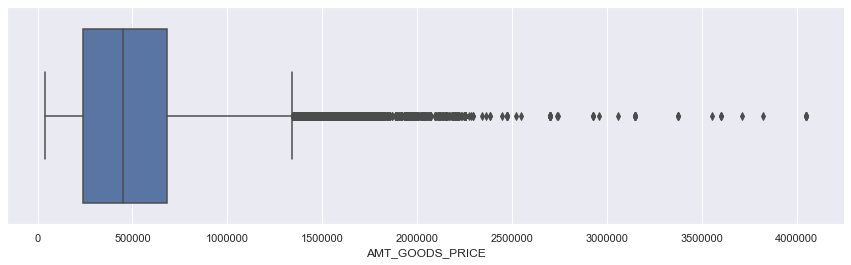

As per observation from description and Box plot we can say that there is a huge differnece between 75 percentile and max value i.e. 382050
Our recommendation is to impute the null value in this column by median which is 450000.0




In [196]:
# Reporting of imputing Null values in AMT_GOODS_PRICE and corrsponding imputing value
print("Description for column AMT_GOODS_PRICE")
print(app_data['AMT_GOODS_PRICE'].describe())

plt.figure(figsize=(15,4))
sns.boxplot(app_data['AMT_GOODS_PRICE'])
plt.show()

print("As per observation from description and Box plot we can say that there is a huge differnece between 75 percentile and max value i.e. 382050")
print("Our recommendation is to impute the null value in this column by median which is",app_data['AMT_GOODS_PRICE'].median())

print("\n")

Description for column EXT_SOURCE_2
count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


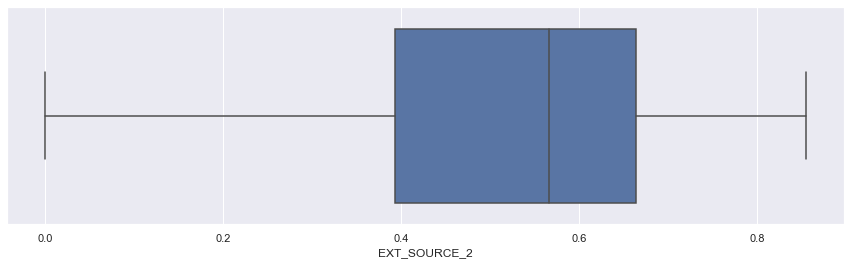

As per observation from description and Box plot we can say that there are no outliers present in this column
Our recommendation is to impute the null values in this column by mean which is 0.51


In [197]:
# Reporting of imputing Null values in EXT_SOURCE_2 and corrsponding imputing value
print("Description for column EXT_SOURCE_2")
print(app_data['EXT_SOURCE_2'].describe())

plt.figure(figsize=(15,4))
sns.boxplot(app_data['EXT_SOURCE_2'])
plt.show()

print("As per observation from description and Box plot we can say that there are no outliers present in this column")
print("Our recommendation is to impute the null values in this column by mean which is",round(app_data['EXT_SOURCE_2'].mean(),2))

In [198]:
#AMT_REQ_CREDIT_BUREAU_YEAR - Need to put proper value with reason

# Reporting of imputing Null values in AMT_REQ_CREDIT_BUREAU_YEAR and corrsponding imputing value
print("value count for column AMT_REQ_CREDIT_BUREAU_YEAR")
print(app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(),"\n")

print("Total null values present in column AMT_REQ_CREDIT_BUREAU_YEAR is :", app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum())


value count for column AMT_REQ_CREDIT_BUREAU_YEAR
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64 

Total null values present in column AMT_REQ_CREDIT_BUREAU_YEAR is : 41519


#### We see that this variable has 41519 null values. However, we have taken a call of not imputing it; because a null value may have some reason and imputing could be an exaggeration. Null value could be either because data has not been collected or reason is unknown.  
#### Imputation could lead to following issues:  
#### 1)   data biasing because the null values are large(13%)  
#### 2)   wrong data pointing that some calls were made to bureau regarding these clients and there was a credit scoring exchange. This could lead to a wrong analysis eventually.  

Value count for column OBS_30_CNT_SOCIAL_CIRCLE
0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
28.0          1
348.0         1
29.0          1
47.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64 



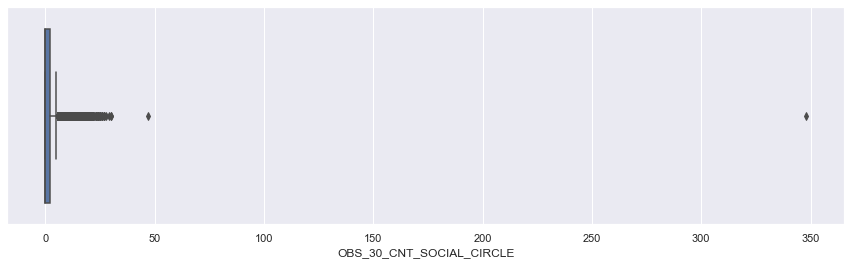

For column OBS_30_CNT_SOCIAL_CIRCLE we can observe that there are ouliers present in column value and percentage of
missing values is 0.33 which very less,so missing values can beimputed by columns Median Value equal to 0.0


In [199]:
#OBS_30_CNT_SOCIAL_CIRCLE
# Reporting of imputing Null values in OBS_30_CNT_SOCIAL_CIRCLE and corrsponding imputing value
print("Value count for column OBS_30_CNT_SOCIAL_CIRCLE")
print(app_data['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts(),"\n")

plt.figure(figsize=(15,4))
sns.boxplot(app_data['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()

print("For column OBS_30_CNT_SOCIAL_CIRCLE we can observe that there are ouliers present in column value and percentage of\nmissing values is 0.33 which very less,so missing values can beimputed by columns Median Value equal to", app_data['OBS_30_CNT_SOCIAL_CIRCLE'].median())


## Removing unnecessary columns

#### Analyzing columns related to documents

In [200]:
# Analyzing columns related to Documents 

document_columns = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
                    'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
                    'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 
                    'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

for item in document_columns:
    print(item)
    print(app_data[item].value_counts(normalize = True), "\n")
       

FLAG_DOCUMENT_2
0    0.999958
1    0.000042
Name: FLAG_DOCUMENT_2, dtype: float64 

FLAG_DOCUMENT_3
1    0.710023
0    0.289977
Name: FLAG_DOCUMENT_3, dtype: float64 

FLAG_DOCUMENT_4
0    0.999919
1    0.000081
Name: FLAG_DOCUMENT_4, dtype: float64 

FLAG_DOCUMENT_5
0    0.984885
1    0.015115
Name: FLAG_DOCUMENT_5, dtype: float64 

FLAG_DOCUMENT_6
0    0.911945
1    0.088055
Name: FLAG_DOCUMENT_6, dtype: float64 

FLAG_DOCUMENT_7
0    0.999808
1    0.000192
Name: FLAG_DOCUMENT_7, dtype: float64 

FLAG_DOCUMENT_8
0    0.918624
1    0.081376
Name: FLAG_DOCUMENT_8, dtype: float64 

FLAG_DOCUMENT_9
0    0.996104
1    0.003896
Name: FLAG_DOCUMENT_9, dtype: float64 

FLAG_DOCUMENT_10
0    0.999977
1    0.000023
Name: FLAG_DOCUMENT_10, dtype: float64 

FLAG_DOCUMENT_11
0    0.996088
1    0.003912
Name: FLAG_DOCUMENT_11, dtype: float64 

FLAG_DOCUMENT_12
0    0.999993
1    0.000007
Name: FLAG_DOCUMENT_12, dtype: float64 

FLAG_DOCUMENT_13
0    0.996475
1    0.003525
Name: FLAG_DOCUMENT_13, d

In [201]:
# Removing unnecessary document related columns except "FLAG_DOCUMENT_3".

print("By observing the normalized values for document submitted (1) and not submitted (0), we can say that only Document 3 have been\nsubmitted by most of the customers.\nAll other columns in list document_columns except FLAG_DOCUMENT_3 can be removed as max\ncustomers has not submitted those document.\n")

app_data = app_data.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], axis = 1)

print("Total number of columns remained after this step is:", app_data.shape[1])

By observing the normalized values for document submitted (1) and not submitted (0), we can say that only Document 3 have been
submitted by most of the customers.
All other columns in list document_columns except FLAG_DOCUMENT_3 can be removed as max
customers has not submitted those document.

Total number of columns remained after this step is: 53


#### Checking values and its count in columns and logic to remove them
###### AMT_REQ_CREDIT_BUREAU_HOUR
###### AMT_REQ_CREDIT_BUREAU_DAY
###### AMT_REQ_CREDIT_BUREAU_WEEK 

In [202]:
#Checking values and its count in columns AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK

print(app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize = True))
print(app_data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize = True))
print(app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize = True),"\n")

print("As per observation we can say that there are more than 96% zero queries to credit bureau before an Hour, Day and week.")
print("So we will remove these columns")

app_data = app_data.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK'],axis = 1)

print("Total number of columns remained after this step is:", app_data.shape[1])

0.0    0.993887
1.0    0.005865
2.0    0.000211
3.0    0.000034
4.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
0.0    0.994402
1.0    0.004857
2.0    0.000399
3.0    0.000169
4.0    0.000098
5.0    0.000034
6.0    0.000030
9.0    0.000008
8.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
0.0    0.967909
1.0    0.030858
2.0    0.000748
3.0    0.000218
4.0    0.000128
6.0    0.000075
5.0    0.000038
8.0    0.000019
7.0    0.000008
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64 

As per observation we can say that there are more than 96% zero queries to credit bureau before an Hour, Day and week.
So we will remove these columns
Total number of columns remained after this step is: 50


#### Checking values and its count in below columns and logic to decide which one to remove 
###### REG_REGION_NOT_LIVE_REGION  
######  REG_REGION_NOT_WORK_REGION  
###### LIVE_REGION_NOT_WORK_REGION  
###### REG_CITY_NOT_LIVE_CITY  
###### REG_CITY_NOT_WORK_CITY  
###### LIVE_CITY_NOT_WORK_CITY

In [203]:
print(app_data['REG_REGION_NOT_LIVE_REGION'].value_counts(normalize = True))
print(app_data['REG_REGION_NOT_WORK_REGION'].value_counts(normalize = True))
print(app_data['LIVE_REGION_NOT_WORK_REGION'].value_counts(normalize = True))
print(app_data['REG_CITY_NOT_LIVE_CITY'].value_counts(normalize = True))
print(app_data['REG_CITY_NOT_WORK_CITY'].value_counts(normalize = True))
print(app_data['LIVE_CITY_NOT_WORK_CITY'].value_counts(normalize = True))

0    0.984856
1    0.015144
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64
0    0.949231
1    0.050769
Name: REG_REGION_NOT_WORK_REGION, dtype: float64
0    0.959341
1    0.040659
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64
0    0.921827
1    0.078173
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64
0    0.769546
1    0.230454
Name: REG_CITY_NOT_WORK_CITY, dtype: float64
0    0.820445
1    0.179555
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


In [204]:
print("By observing values and its count in these 6 columns we can say that except column REG_CITY_NOT_WORK_CITY, all other columns have values as 0 more than 80% ")
print("We can remove those column except REG_CITY_NOT_WORK_CITY, as they will not much useful for analysis as much of the data is marked as 0 in them")

app_data = app_data.drop(['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                          'REG_CITY_NOT_LIVE_CITY','LIVE_CITY_NOT_WORK_CITY'], axis = 1)

print("Total number of columns remained after this step is:", app_data.shape[1])

By observing values and its count in these 6 columns we can say that except column REG_CITY_NOT_WORK_CITY, all other columns have values as 0 more than 80% 
We can remove those column except REG_CITY_NOT_WORK_CITY, as they will not much useful for analysis as much of the data is marked as 0 in them
Total number of columns remained after this step is: 45


#### Checking values and its count in below columns and logic to decide which one to remove
###### FLAG_MOBIL
######  FLAG_EMP_PHONE
###### FLAG_WORK_PHONE 
######  FLAG_CONT_MOBILE
###### FLAG_PHONE
###### FLAG_EMAIL

In [205]:
print(app_data['FLAG_MOBIL'].value_counts(normalize = True),"\n")
print(app_data['FLAG_EMP_PHONE'].value_counts(normalize = True),"\n")
print(app_data['FLAG_WORK_PHONE'].value_counts(normalize = True),"\n")
print(app_data['FLAG_CONT_MOBILE'].value_counts(normalize = True),"\n")
print(app_data['FLAG_PHONE'].value_counts(normalize = True),"\n")
print(app_data['FLAG_EMAIL'].value_counts(normalize = True),"\n")

1    0.999997
0    0.000003
Name: FLAG_MOBIL, dtype: float64 

1    0.819889
0    0.180111
Name: FLAG_EMP_PHONE, dtype: float64 

0    0.800632
1    0.199368
Name: FLAG_WORK_PHONE, dtype: float64 

1    0.998133
0    0.001867
Name: FLAG_CONT_MOBILE, dtype: float64 

0    0.718934
1    0.281066
Name: FLAG_PHONE, dtype: float64 

0    0.94328
1    0.05672
Name: FLAG_EMAIL, dtype: float64 



In [206]:
print("By observing values and its count in these 5 columns we can say that columns FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_CONT_MOBILE has\nvalue marked as 1 for more than 80% customers and for column FLAG_WORK_HOME has value marked as 0 for more than 80% customers \n")
print("We can remove these column except FLAG_PHONE, as they will not much useful for analysis as more than 80% customers have same value\n")
print("Also for FLAG_EMAIL column data more than 94% customers have not provided mail id so we can drop that column too.\n")
app_data = app_data.drop(['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL'], axis = 1)

print("Total number of columns remained after this step is:", app_data.shape[1])


By observing values and its count in these 5 columns we can say that columns FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_CONT_MOBILE has
value marked as 1 for more than 80% customers and for column FLAG_WORK_HOME has value marked as 0 for more than 80% customers 

We can remove these column except FLAG_PHONE, as they will not much useful for analysis as more than 80% customers have same value

Also for FLAG_EMAIL column data more than 94% customers have not provided mail id so we can drop that column too.

Total number of columns remained after this step is: 40


#### Checking column NAME_TYPE_SUITE and removing the same

In [207]:
print(app_data['NAME_TYPE_SUITE'].value_counts(normalize = True),"\n")
print("Type of people mentioned accompanied to customer while applying loan will not have any significant impact to make any decision.\nAlso most of the customer are unaccompanied.So we can remove this column\n")

app_data = app_data.drop('NAME_TYPE_SUITE', axis = 1)

print("Total number of columns remained after this step is:", app_data.shape[1])

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64 

Type of people mentioned accompanied to customer while applying loan will not have any significant impact to make any decision.
Also most of the customer are unaccompanied.So we can remove this column

Total number of columns remained after this step is: 39


#### Checking column WEEKDAY_APPR_PROCESS_START and removing the same

In [208]:
print(app_data['WEEKDAY_APPR_PROCESS_START'].value_counts(normalize  = True),"\n")
print("From observation we can say that there are almost considerable number of application received from Monday to Saturday\nand It will not affect any decision making.So we will remove this column\n")

app_data = app_data.drop('WEEKDAY_APPR_PROCESS_START', axis = 1)

print("Total number of columns remained after this step is:", app_data.shape[1])

TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64 

From observation we can say that there are almost considerable number of application received from Monday to Saturday
and It will not affect any decision making.So we will remove this column

Total number of columns remained after this step is: 38


#### Comapring between REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY and decide which one to remove

In [209]:
print(app_data['REGION_RATING_CLIENT'].value_counts(normalize  = True))
print(app_data['REGION_RATING_CLIENT_W_CITY'].value_counts(normalize  = True),"\n")

print("By observing to the data we can say that there is not much difference in values and there counts.\nWe will drop column REGION_RATING_CLIENT as column REGION_RATING_CLIENT_W_CITY will provide rating for customer in more details Citywise.\n")

app_data = app_data.drop('REGION_RATING_CLIENT', axis = 1)

print("Total number of columns remained after this step is:", app_data.shape[1])

2    0.738133
3    0.157165
1    0.104702
Name: REGION_RATING_CLIENT, dtype: float64
2    0.746263
3    0.142629
1    0.111108
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64 

By observing to the data we can say that there is not much difference in values and there counts.
We will drop column REGION_RATING_CLIENT as column REGION_RATING_CLIENT_W_CITY will provide rating for customer in more details Citywise.

Total number of columns remained after this step is: 37


#### Checking column CNT_CHILDREN, AMT_GOODS_PRICE, NAME_HOUSING_TYPE and removing them

In [210]:
print("CNT_CHILDREN\nColumn CNT_CHILDREN can be removed as there is already column CNT_FAM_MEMBERS is present which describes total number family\nmembers customer have which will cover number of children customer has.So column CNT_CHILDREN can be removed.\n")
print("AMT_GOODS_PRICE\nThe column AMT_GOODS_PRICE will not help in analysis as it has no significance in decision of approving and rejecting loan.\n")
print("NAME_HOUSING_TYPE\nThe column NAME_HOUSING_TYPE shows housing status of customer but column FLAG_OWN_REALTY gives correct status if client owns\nhouse or apartment.So we will remove column NAME_HOUSING_TYPE\n")

app_data = app_data.drop(['CNT_CHILDREN', 'AMT_GOODS_PRICE','NAME_HOUSING_TYPE'],axis = 1)

print("Total number of columns remained after this step is:", app_data.shape[1])

CNT_CHILDREN
Column CNT_CHILDREN can be removed as there is already column CNT_FAM_MEMBERS is present which describes total number family
members customer have which will cover number of children customer has.So column CNT_CHILDREN can be removed.

AMT_GOODS_PRICE
The column AMT_GOODS_PRICE will not help in analysis as it has no significance in decision of approving and rejecting loan.

NAME_HOUSING_TYPE
The column NAME_HOUSING_TYPE shows housing status of customer but column FLAG_OWN_REALTY gives correct status if client owns
house or apartment.So we will remove column NAME_HOUSING_TYPE

Total number of columns remained after this step is: 34


#### Checking column OBS_30_CNT_SOCIAL_CIRCLE and  OBS_60_CNT_SOCIAL_CIRCLE and take decision to remove one of them

In [211]:
#app_data['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts(normalize = True)
#app_data['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts(normalize = True)


print("We have removed column OBS_60_CNT_SOCIAL_CIRCLE as both coulmns have similar distribution of values data")

app_data = app_data.drop(['OBS_60_CNT_SOCIAL_CIRCLE'],axis = 1)

print("Total number of columns remained after this step is:", app_data.shape[1])

We have removed column OBS_60_CNT_SOCIAL_CIRCLE as both coulmns have similar distribution of values data
Total number of columns remained after this step is: 33


#### Checking column DEF_30_CNT_SOCIAL_CIRCLE and  DEF_60_CNT_SOCIAL_CIRCLE and take decision to remove one of them

In [212]:
#app_data['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts(normalize = True)
#app_data['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts(normalize = True)

print("We have removed column DEF_60_CNT_SOCIAL_CIRCLE as both coulmns have similar distribution of values data")

app_data = app_data.drop(['DEF_60_CNT_SOCIAL_CIRCLE'],axis = 1)

print("Total number of columns remained after this step is:", app_data.shape[1])

We have removed column DEF_60_CNT_SOCIAL_CIRCLE as both coulmns have similar distribution of values data
Total number of columns remained after this step is: 32


### Converting data types for required columns where data is discrete and not continuous but current data type is float. Here for these columns we need to convert data type to integer.

In [213]:
app_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_PHONE                       int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT_W_CITY      int64
HOUR_APPR_PROCESS_START          int64
REG_CITY_NOT_WORK_CITY           int64
ORGANIZATION_TYPE               object
EXT_SOURCE_2                   float64
EXT_SOURCE_3             

In [214]:
datatype_columns = ['DAYS_REGISTRATION', 'CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                   'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

In [215]:
for item in datatype_columns:
    print("Number of null values present in ",item,"is", app_data[item].isnull().sum())

Number of null values present in  DAYS_REGISTRATION is 0
Number of null values present in  CNT_FAM_MEMBERS is 2
Number of null values present in  DAYS_LAST_PHONE_CHANGE is 1
Number of null values present in  OBS_30_CNT_SOCIAL_CIRCLE is 1021
Number of null values present in  DEF_30_CNT_SOCIAL_CIRCLE is 1021
Number of null values present in  AMT_REQ_CREDIT_BUREAU_MON is 41519
Number of null values present in  AMT_REQ_CREDIT_BUREAU_QRT is 41519
Number of null values present in  AMT_REQ_CREDIT_BUREAU_YEAR is 41519


#### Imputing Null values in CNT_FAM_MEMBERS and DAYS_LAST_PHONE_CHANGE

In [216]:
# Imputing null values in column CNT_FAM_MEMBERS with mode values for the column
app_data.loc[app_data['CNT_FAM_MEMBERS'].isnull(), 'CNT_FAM_MEMBERS'] = app_data['CNT_FAM_MEMBERS'].mode()[0]


# Imputing null values in column DAYS_LAST_PHONE_CHANGE with mean values for the column
app_data.loc[app_data['DAYS_LAST_PHONE_CHANGE'].isnull(), 'DAYS_LAST_PHONE_CHANGE'] = app_data['DAYS_LAST_PHONE_CHANGE'].mean()

for item in datatype_columns[1:3]:
    print("Number of null values present in ",item,"is", app_data[item].isnull().sum())

Number of null values present in  CNT_FAM_MEMBERS is 0
Number of null values present in  DAYS_LAST_PHONE_CHANGE is 0


#### We will not impute null values in columns below:
##### 'OBS_30_CNT_SOCIAL_CIRCLE',
##### 'DEF_30_CNT_SOCIAL_CIRCLE',
##### 'AMT_REQ_CREDIT_BUREAU_MON',
##### 'AMT_REQ_CREDIT_BUREAU_QRT',
##### 'AMT_REQ_CREDIT_BUREAU_YEAR'

In [217]:
# From above observation column 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE' has 0 null values. 
# So we will convert its data type from Float to int by using as astype

for item in datatype_columns[0:3]:
    print("Datatype for column ", item, "before conversion :",app_data[item].dtype)
    app_data[item] = app_data[item].astype("int64")
    print("Datatype for column ", item, "after conversion :",app_data[item].dtype,"\n")


Datatype for column  DAYS_REGISTRATION before conversion : float64
Datatype for column  DAYS_REGISTRATION after conversion : int64 

Datatype for column  CNT_FAM_MEMBERS before conversion : float64
Datatype for column  CNT_FAM_MEMBERS after conversion : int64 

Datatype for column  DAYS_LAST_PHONE_CHANGE before conversion : float64
Datatype for column  DAYS_LAST_PHONE_CHANGE after conversion : int64 



In [218]:
# For columns which has Null values, we will convert them to integer data type by using below method

for item in datatype_columns[3:]:
    print("Datatype for column ", item, "before conversion :",app_data[item].dtype)
    app_data[item] = pd.Series(app_data[item], dtype="Int64")
    print("Datatype for column ", item, "after conversion :",app_data[item].dtype,"\n")

Datatype for column  OBS_30_CNT_SOCIAL_CIRCLE before conversion : float64
Datatype for column  OBS_30_CNT_SOCIAL_CIRCLE after conversion : Int64 

Datatype for column  DEF_30_CNT_SOCIAL_CIRCLE before conversion : float64
Datatype for column  DEF_30_CNT_SOCIAL_CIRCLE after conversion : Int64 

Datatype for column  AMT_REQ_CREDIT_BUREAU_MON before conversion : float64
Datatype for column  AMT_REQ_CREDIT_BUREAU_MON after conversion : Int64 

Datatype for column  AMT_REQ_CREDIT_BUREAU_QRT before conversion : float64
Datatype for column  AMT_REQ_CREDIT_BUREAU_QRT after conversion : Int64 

Datatype for column  AMT_REQ_CREDIT_BUREAU_YEAR before conversion : float64
Datatype for column  AMT_REQ_CREDIT_BUREAU_YEAR after conversion : Int64 



### Finding Unique Values in columns to identify categorical columns

In [219]:
new_list_unique = app_data.columns
print(new_list_unique)


for item in new_list_unique:
    print(item, ": No. of unique values are : ", len(app_data[item].unique()))
    print("Unique values:", app_data[item].unique())
    print("----------------------------------------------------------------------------------------------------------")


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_PHONE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')
SK_ID_CURR : No. of unique values are :  307511
Unique values: [100002 100003 100004 ... 456253 456254 456255]
----------------------------------------------------------------------------------------------------------
TARGET : No.

OBS_30_CNT_SOCIAL_CIRCLE : No. of unique values are :  34
Unique values: <IntegerArray>
[  2,   1,   0,   4,   8,  10, NaN,   7,   3,   6,   5,  12,   9,  13,  11,
  14,  22,  16,  15,  17,  20,  25,  19,  18,  21,  24,  23,  28,  26,  29,
  27,  47, 348,  30]
Length: 34, dtype: Int64
----------------------------------------------------------------------------------------------------------
DEF_30_CNT_SOCIAL_CIRCLE : No. of unique values are :  11
Unique values: <IntegerArray>
[2, 0, 1, NaN, 3, 4, 5, 6, 7, 34, 8]
Length: 11, dtype: Int64
----------------------------------------------------------------------------------------------------------
DAYS_LAST_PHONE_CHANGE : No. of unique values are :  3773
Unique values: [-1134  -828  -815 ... -3988 -3899 -3538]
----------------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_MON : No. of unique values are :  25
Unique values: <IntegerArray>
[  0, NaN,   1,   2,   6,   5,   3,   7

### Column CODE_GENDER has very few XNA values, so we can impute these values with mode.

In [220]:
print("Unique value count for CODE_GENDER column before imputing:\n",app_data['CODE_GENDER'].value_counts(),"\n")

app_data.loc[app_data['CODE_GENDER'] == "XNA", 'CODE_GENDER'] = "F"

print("Unique value count for CODE_GENDER column after imputing:\n",app_data['CODE_GENDER'].value_counts())

Unique value count for CODE_GENDER column before imputing:
 F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64 

Unique value count for CODE_GENDER column after imputing:
 F    202452
M    105059
Name: CODE_GENDER, dtype: int64


### Column ORGANIZATION_TYPE has around 18% 'XNA' values, so we will impute these values with NaN.

In [221]:
app_data.loc[app_data['ORGANIZATION_TYPE'] == "XNA", 'ORGANIZATION_TYPE'] = np.NaN

print("All values marked as 'XNA' in column are converted to NaN values")

All values marked as 'XNA' in column are converted to NaN values


In [222]:
app_data['ORG_TYPE'] = app_data['ORGANIZATION_TYPE'].apply(lambda x: str(x).split(":")[0])
app_data.loc[app_data['ORG_TYPE'] == "Business Entity Type 3", 'ORG_TYPE'] = "Business Entity"
app_data.loc[app_data['ORG_TYPE'] == "Business Entity Type 2", 'ORG_TYPE'] = "Business Entity"
app_data.loc[app_data['ORG_TYPE'] == "Business Entity Type 1", 'ORG_TYPE'] = "Business Entity"

## Converting columns described with days and with negative sign to columns with year and months values.
#### DAYS_BIRTH is used to create new AGE column with age in Years.
#### DAYS_EMPLOYED is used to create new column MON_EMPLOYED
#### DAYS_REGISTRATION is used to create new column MON_REGISTRATION
#### DAYS_ID_PUBLISH is used to create new column MON_ID_PUBLISH
#### DAYS_LAST_PHONE_CHANGE is used to create new column MON_LAST_PHONE_CHANGE

In [223]:
app_data['AGE'] = round(abs(app_data['DAYS_BIRTH'])/365,1)
app_data['MON_EMPLOYED'] = round(abs(app_data['DAYS_EMPLOYED'])/30,1)
app_data['MON_REGISTRATION'] = round(abs(app_data['DAYS_REGISTRATION'])/30,1)
app_data['MON_ID_PUBLISH'] = round(abs(app_data['DAYS_ID_PUBLISH'])/30, 1)
app_data['MON_LAST_PHONE_CHANGE'] = round(abs(app_data['DAYS_LAST_PHONE_CHANGE'])/30, 1)

#### Removing columns DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE

In [224]:
app_data = app_data.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'],axis = 1)

## To find the outliers for numerical variables (min req. for 3 variables)

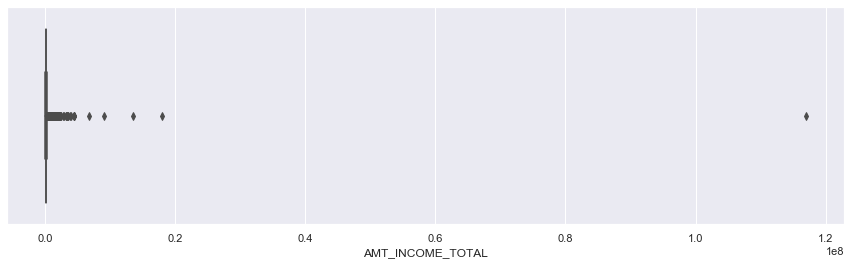

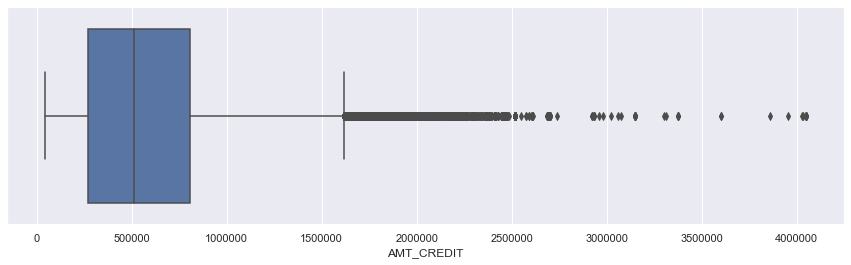

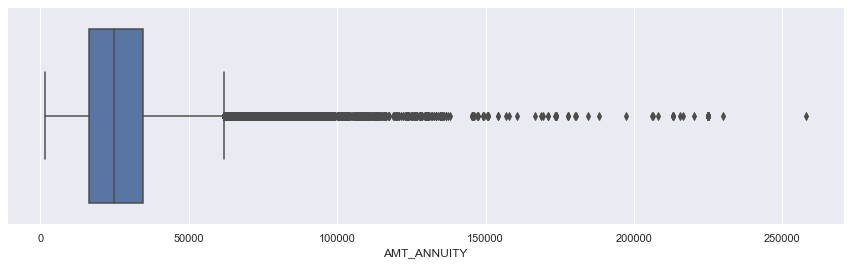

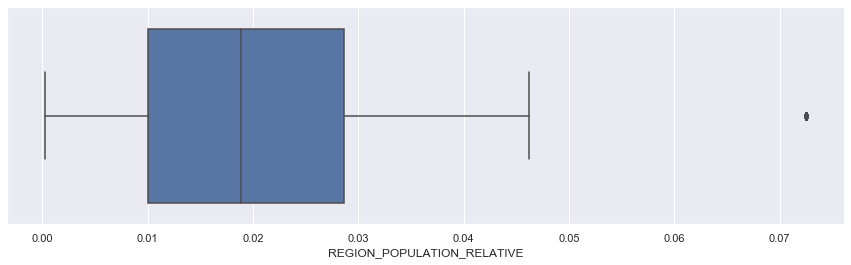

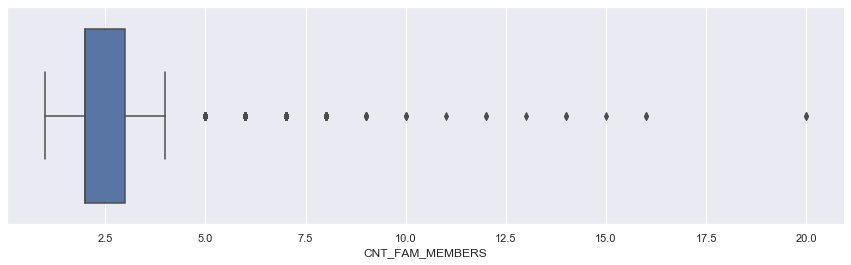

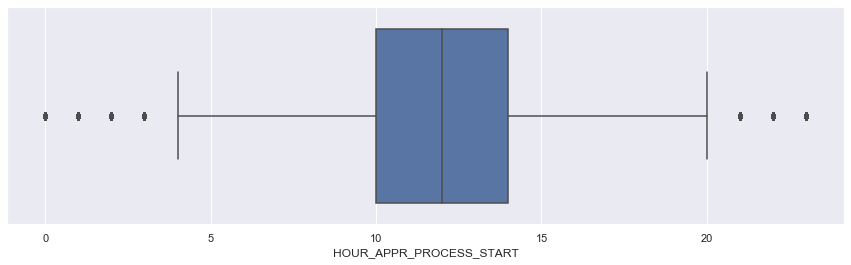

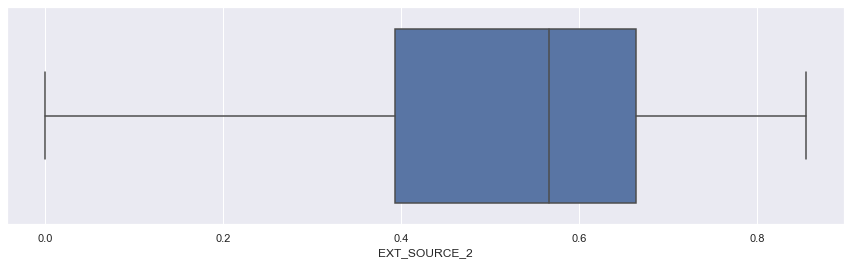

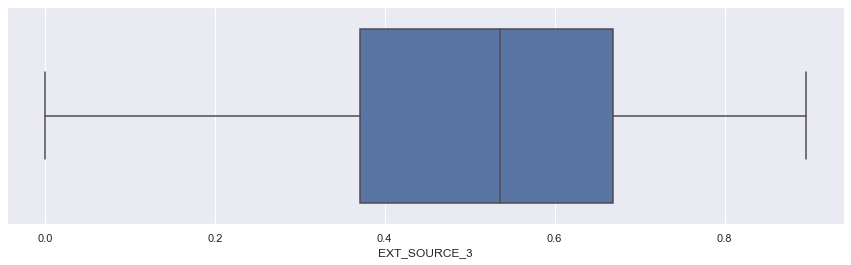

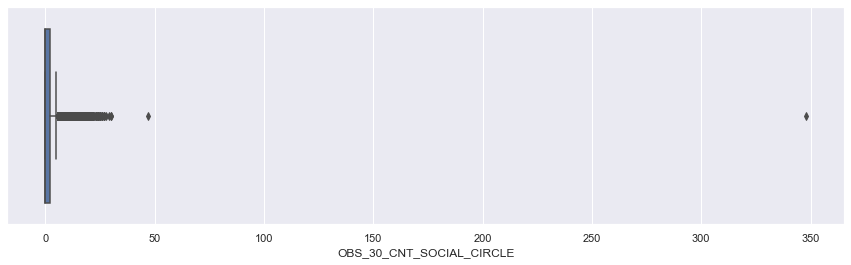

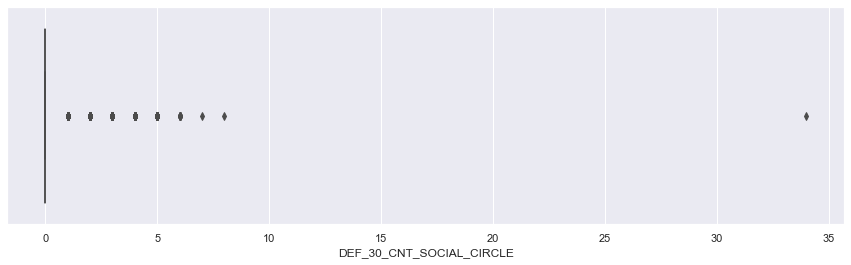

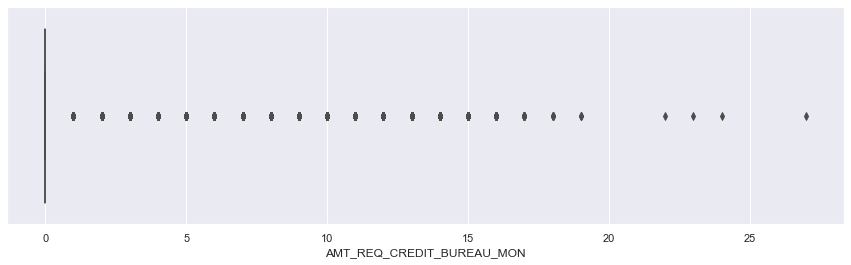

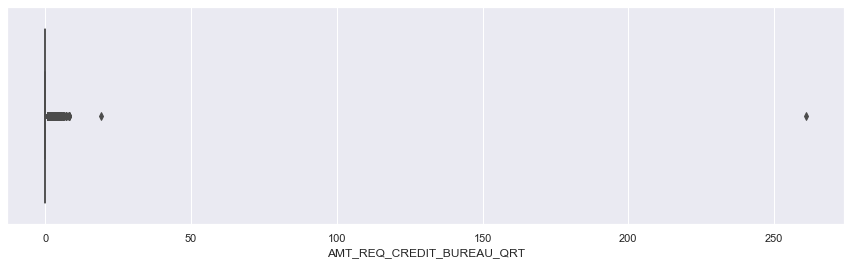

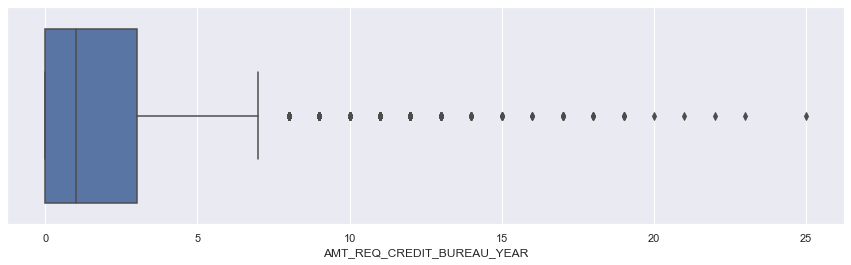

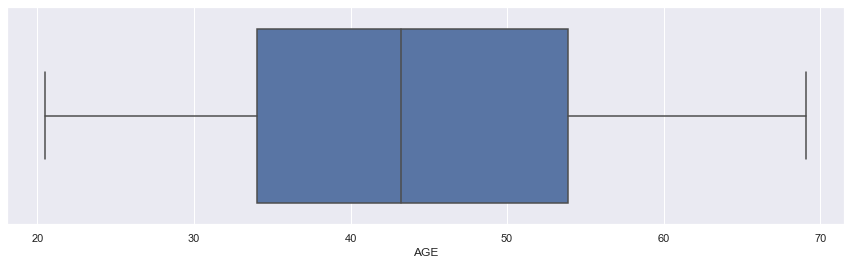

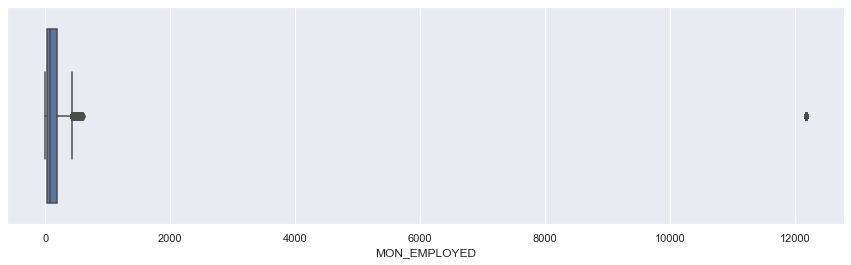

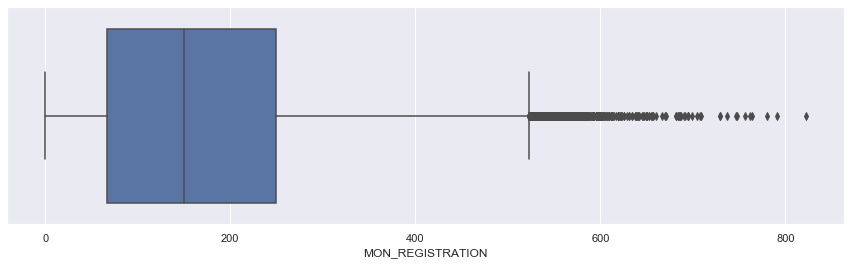

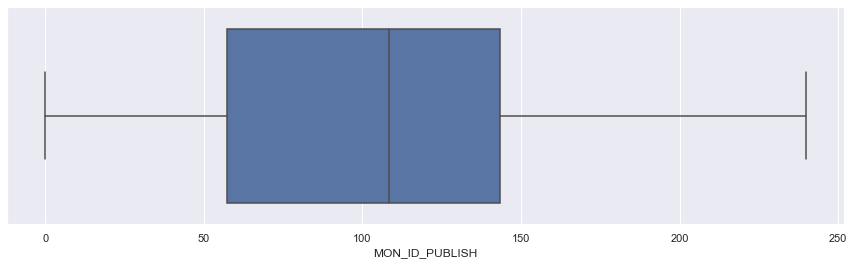

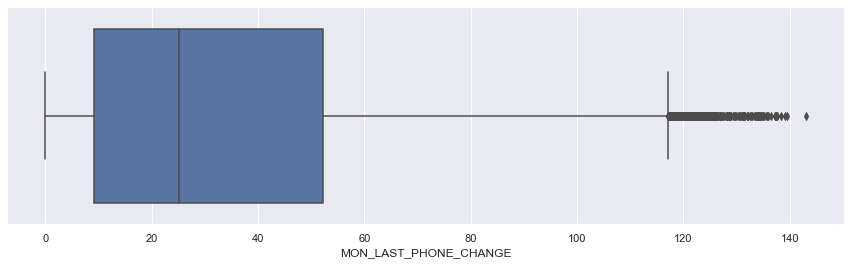

In [225]:
columns_numerical = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','CNT_FAM_MEMBERS',
                     'HOUR_APPR_PROCESS_START','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE',
                     'DEF_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
                     'AMT_REQ_CREDIT_BUREAU_YEAR','AGE','MON_EMPLOYED','MON_REGISTRATION','MON_ID_PUBLISH',
                     'MON_LAST_PHONE_CHANGE']

sns.set(style = "darkgrid")
for item in columns_numerical:
    plt.figure(figsize=(15,4))
    sns.boxplot(app_data[item])
    plt.show()



## IDENTIFICATION, ANALYSIS AND TREATMENT OF OUTLIERS FROM ABOVE BOX PLOTS FOR 4 VARIABLES

## 1. AMT_INCOME_TOTAL
#### Outlier Value = 117000000
    Our analysis reveals that 
        1) There is a considerable difference between mean and median values
        2) Standard deviation is extremely high
        3) Quite larger than the 75th percentile
        4) This value is 10 times larger than the second max value which is 18000090 
        This concludes that the record has an outlier. 

#### Treatment Done:
        The vlaues is exceptionally high and needs to be capped considering rest of the data. We decided to cap it with second max value i.e. 18000090.
        
#### Detailed steps followed for analysis and treatment are in cells below

### STEP-1: Visual Analysis of Outliers in Variable AMT_INCOME_TOTAL

Create a box plot to visualy identify the outlier


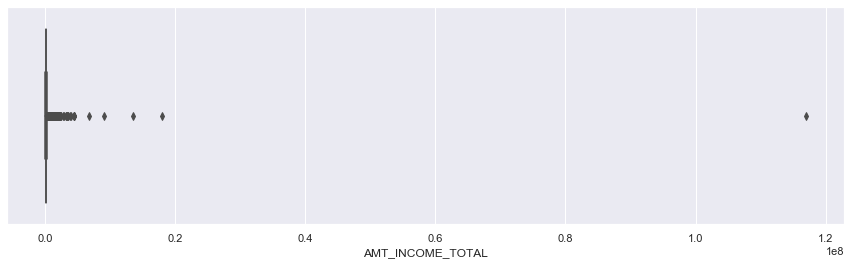


Let us find the aggergate statistics of thsi column
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

Frosm statistics above it is clearly visible that there is a extremely lareg value of 1.170000e+08 sitting in thsi data

Let us check quantile range of this data
0.500    147150.0
0.700    180000.0
0.750    202500.0
0.900    270000.0
0.950    337500.0
0.990    472500.0
0.999    900000.0
Name: AMT_INCOME_TOTAL, dtype: float64

We can also see that even the .999 percentile value is nowhere near this large value

We can conclude that this value 117000000 is an outlier and needs to be capped


In [226]:
print('Create a box plot to visualy identify the outlier')
plt.figure(figsize=(15,4))
sns.boxplot(app_data['AMT_INCOME_TOTAL'])
plt.show()
print("\nLet us find the aggergate statistics of thsi column")
print(app_data['AMT_INCOME_TOTAL'].describe())

print("\nFrosm statistics above it is clearly visible that there is a extremely lareg value of 1.170000e+08 sitting in thsi data")
print("\nLet us check quantile range of this data")
print(app_data['AMT_INCOME_TOTAL'].quantile([.5,.7,.75,.90,.95,.99, .999]))
print("\nWe can also see that even the .999 percentile value is nowhere near this large value")

print("\nWe can conclude that this value 117000000 is an outlier and needs to be capped")

### STEP-2: Treatment of Outliers in Variable AMT_INCOME_TOTAL

In [227]:
print("\nReason for capping approach is: Since this is income data and there is a chance that one of the applicants has extremely large income. Since removing it is not a good idea as we dont want to lose the data, we decide to cap it so that it stops affecting the mean of data\n")
print("\nSecond max value of columns is 18000090. So we will replace the outlier with this value")
app_data.loc[app_data.AMT_INCOME_TOTAL>=117000000.0, 'AMT_INCOME_TOTAL'] =  18000090.0


Reason for capping approach is: Since this is income data and there is a chance that one of the applicants has extremely large income. Since removing it is not a good idea as we dont want to lose the data, we decide to cap it so that it stops affecting the mean of data


Second max value of columns is 18000090. So we will replace the outlier with this value


### STEP-3: Verification of Outlier of Variable AMT_INCOME_TOTAL

Create a box plot after removing the outlier in AMT_INCOME_TOTAL variable


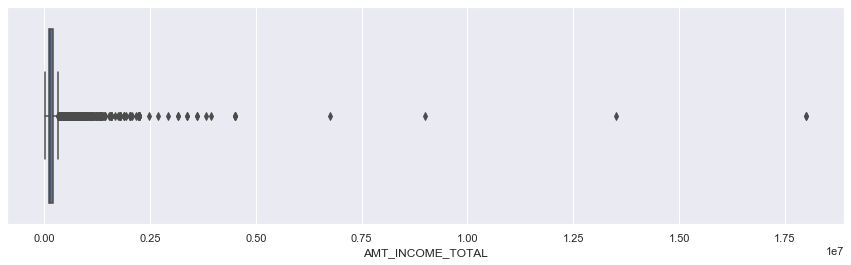

count    3.075110e+05
mean     1.684760e+05
std      1.134636e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

In [228]:
#After removing the outlier let us see the updated box plot
print('Create a box plot after removing the outlier in AMT_INCOME_TOTAL variable')
plt.figure(figsize=(15,4))
sns.boxplot(app_data['AMT_INCOME_TOTAL'])
plt.show()
app_data['AMT_INCOME_TOTAL'].describe()

#### Box plot above shows that there are still some remote outliers that need to be treated to ake sure that these extreme values dont impact the mean value

In [229]:
print("We still see some outliers here well above the continuous (Which are acceptable ones) set of outlier. These exceptonal ones need to be analysed further")
# print("We can replace it with second max value present in column as per the table beow")

print("\nLet us see what is the second max value of current data")
print(app_data['AMT_INCOME_TOTAL'].describe())
print((app_data[app_data['AMT_INCOME_TOTAL']<app_data['AMT_INCOME_TOTAL'].max()][['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AGE','MON_EMPLOYED']].describe()))
print("\nAbove data shows that second max value is: 13500000 which is still quite high ccompared to contnuous set of outliers")

print("\nLet is check what those exceptioanl values are")
# print((app_data[app_data['AMT_INCOME_TOTAL']<6750000.0][['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AGE','MON_EMPLOYED']].describe()))
# print(len(app_data[app_data['AMT_INCOME_TOTAL'] == 6750000][['AMT_CREDIT', 'AMT_INCOME_TOTAL','MON_EMPLOYED','AGE']]))
print((app_data[app_data['AMT_INCOME_TOTAL']>4500000.0][['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AGE','MON_EMPLOYED']].describe()))

print("\nAbove data shows that there are only 5 exceptuoan outliers and they have extremely large values. We can cap these as well with 4500000.0")

app_data.loc[app_data.AMT_INCOME_TOTAL>4500000.0, 'AMT_INCOME_TOTAL'] =  4500000.0

We still see some outliers here well above the continuous (Which are acceptable ones) set of outlier. These exceptonal ones need to be analysed further

Let us see what is the second max value of current data
count    3.075110e+05
mean     1.684760e+05
std      1.134636e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64
       AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY            AGE  \
count      3.075090e+05  3.075090e+05  307497.000000  307509.000000   
mean       1.683600e+05  5.990259e+05   27108.439687      43.937025   
std        1.039520e+05  4.024921e+05   14493.584688      11.956111   
min        2.565000e+04  4.500000e+04    1615.500000      20.500000   
25%        1.125000e+05  2.700000e+05   16524.000000      34.000000   
50%        1.471500e+05  5.135310e+05   24903.000000      43.200000   
75%        2.025000e+05  8.086500e+05   34596.000000      53.900000   
max     

Create a box plot after removing the outlier in AMT_INCOME_TOTAL variable


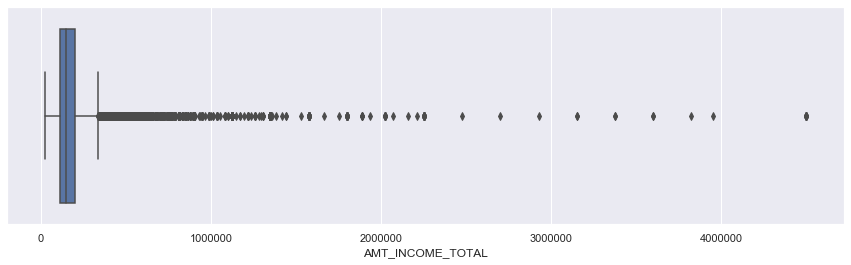

count    3.075110e+05
mean     1.683370e+05
std      1.006904e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      4.500000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [230]:
#After removing the outlier let us see the updated box plot
print('Create a box plot after removing the outlier in AMT_INCOME_TOTAL variable')
plt.figure(figsize=(15,4))
sns.boxplot(app_data['AMT_INCOME_TOTAL'])
plt.show()
app_data['AMT_INCOME_TOTAL'].describe()

#### It is visible from updated box plot of variable AMT_INCOME_TOTAL that the remote outliers of extreme values compared to max value are not present anymore.

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 2. AMT_CREDIT
#### Outlier Value = 4050000
    Our analysis reveals that 
    3) Max value i.e 4050000 is 5 times larger than the 75th percentile
    4) This value is seen for total 8 records in entire data
    This concludes that the record is an outlier. 

#### Treatment Done:
    The vlaue is exceptionally high and needs to be capped considering rest of the data of column. We decided to cap it with 99th percentile value i.e. 1854000.0
    
    Details of steps followed for analysis and imputation are given in next set of cells

### STEP-1: Visual Analysis of outliers of AMT_CREDIT

Create the box plot to find the outliers visually


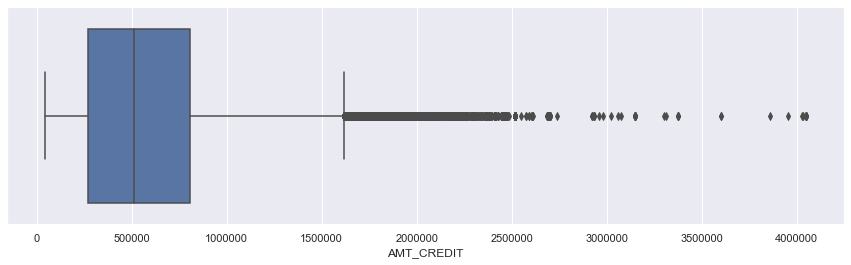

In [231]:
#analysis of AMT_CREDIT column for outliers
print("Create the box plot to find the outliers visually")
plt.figure(figsize=(15,4))
sns.boxplot(app_data['AMT_CREDIT'])
plt.show()

### STEP-2: Quantiles and Aggregrate Statistics Based Analysis of Outliers of AMT_CREDIT

In [232]:
print("Let us check the aggregate statistics of this column:")
print(app_data['AMT_CREDIT'].describe())

print("\nSince there seems to be a continuous range of outliers, let us check the quantile statistics for closer view of outlier concentration")
print(app_data['AMT_CREDIT'].quantile([.5,.7,.75,.90,.95,.99]))
print("\n")
print("Total number of records by 95th quantile are: ", len(app_data[app_data['AMT_CREDIT']>app_data['AMT_CREDIT'].quantile(.95)]))

print("\nIt is clear from quantile data that most of the data with acceptable value range is distributed within 99th percentile")
print("\nHowever, to find where does the outlier value exist, let us find all records with above 99th percentile value")
print("\nnumber of records above 99th percentile are: ", len(app_data[app_data['AMT_CREDIT']>app_data['AMT_CREDIT'].quantile(.99)][['AMT_CREDIT', 'AMT_ANNUITY','MON_EMPLOYED']]))
print("\nThe aggregate statistics of these records is: ")
print(app_data[app_data['AMT_CREDIT']>app_data['AMT_CREDIT'].quantile(.99)][['AMT_CREDIT', 'AMT_ANNUITY','MON_EMPLOYED']].describe())

print("\nIt is cear from above statistics that the outlier values are in percentile above 99")
print("\nLet us find the statistics related to data that have AMT_CREDIT value =  4050000")
print(app_data[app_data.AMT_CREDIT == 4050000 ][['AMT_CREDIT', 'AMT_ANNUITY','MON_EMPLOYED','AGE']].describe())

Let us check the aggregate statistics of this column:
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

Since there seems to be a continuous range of outliers, let us check the quantile statistics for closer view of outlier concentration
0.50     513531.0
0.70     755190.0
0.75     808650.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64


Total number of records by 95th quantile are:  14034

It is clear from quantile data that most of the data with acceptable value range is distributed within 99th percentile

However, to find where does the outlier value exist, let us find all records with above 99th percentile value

number of records above 99th percentile are:  3075

The aggregate statistics of these records is: 
         AMT_CREDIT    AMT_ANNUITY  MON_EMPLOYED
count  3.075000e+03    307

### STEP-3: Conclusion of Outlier Treatment of AMT_CREDIT 
### Cap the extreme values with median value

In [233]:
#Replacing all values of 4050000 in column AMT_CREDIT by 99th Percentile value of this column 
app_data.loc[app_data.AMT_CREDIT == 4050000, 'AMT_CREDIT'] = 1854000.0

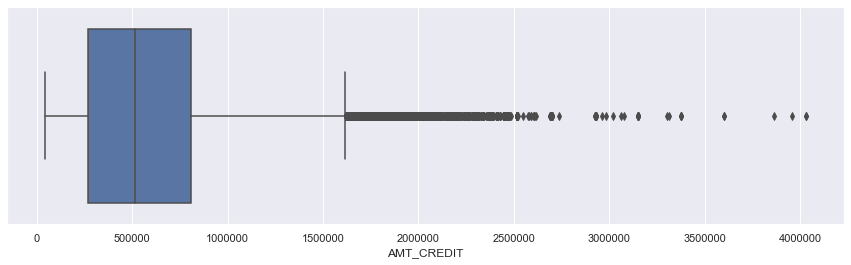

count    3.075110e+05
mean     5.989689e+05
std      4.021567e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.031032e+06
Name: AMT_CREDIT, dtype: float64

Additionally following analysis will show that though therse are outlisers still seen in box plot but they are in continuous range and dont need to be treated
         AMT_CREDIT    AMT_ANNUITY  MON_EMPLOYED
count  6.000000e+00       6.000000       6.00000
mean   3.845834e+06  114228.000000      45.45000
std    2.003164e+05   41107.760935      25.15494
min    3.600000e+06   91008.000000      10.00000
25%    3.665005e+06   92748.375000      35.17500
50%    3.908146e+06   99805.500000      45.10000
75%    4.009828e+06  105293.250000      52.02500
max    4.031032e+06  197230.500000      86.30000
        AMT_CREDIT  AMT_ANNUITY  MON_EMPLOYED
14643    3956274.0     197230.5          33.0
53936    3600000.0      91008.0          41.7
95571    4031032.5     102033.0          10.0
104577

In [234]:
plt.figure(figsize=(15,4))
sns.boxplot(app_data['AMT_CREDIT'])
plt.show()
print(app_data['AMT_CREDIT'].describe())

print("\nAdditionally following analysis will show that though therse are outlisers still seen in box plot but they are in continuous range and dont need to be treated")

print(app_data[app_data.AMT_CREDIT > 3500000][['AMT_CREDIT', 'AMT_ANNUITY','MON_EMPLOYED']].describe())
print(app_data[app_data.AMT_CREDIT > 3500000][['AMT_CREDIT', 'AMT_ANNUITY','MON_EMPLOYED']])

### It is visible for updated box plot that the cluster of extreme values in column AMT_CREDIT is not there anymore

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 3. AMT_ANNUITY
#### Outlier Value = 258025.500000
    Our analysis reveals that 
    3) Max value i.e 258025.500000 is more than 7 times larger than the 75th percentile
    4) This value is seen for only one record in entire data
    This concludes that the record is an outlier. 
    
#### Treatment Done:
    We will cap the outlier value of 258025.5 in AMT_ANNUITY by meadian value of AMT_ANNUITY for all records of same ORGANIZATION_TYPE which is Industry: type 4
    
    Details of steps followed for analysis and imputation are given in next set of cells

## STEP-1: Visual Analysis of Outlliers of AMT_ANNUITY

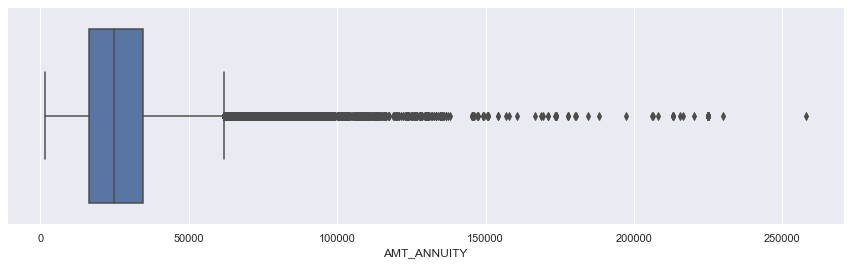

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


In [235]:
#analysis of AMT_ANNUITY
plt.figure(figsize=(15,4))
sns.boxplot(app_data['AMT_ANNUITY'])
plt.show()
print(app_data['AMT_ANNUITY'].describe())

## STEP-2: Quantile and Aggregate Statistics Based Analysis of Variable AMT_ANNUITY

In [236]:
print("Let us check the aggregate statistics of this column:")
print(app_data['AMT_ANNUITY'].describe())

print("\nSince there seems to be a continuous range of outliers, let us check the quantile statistics for closer view of outlier concentration")
print(app_data['AMT_ANNUITY'].quantile([.5,.7,.75,.90,.95,.99]))

print("\nIt is clear from quantile data that most of the data with acceptable value range is distributed within 99th percentile")
print("\nHowever, to find where does the outlier value exist, let us find all records with above 99th percentile value")
print("\nnumber of records above 99th percentile are: ", len(app_data[app_data['AMT_ANNUITY']>app_data['AMT_ANNUITY'].quantile(.99)][['AMT_CREDIT', 'AMT_ANNUITY','MON_EMPLOYED']]))
print("\nThe aggregate statistics of these records is: ")
print(app_data[app_data['AMT_ANNUITY']>app_data['AMT_ANNUITY'].quantile(.99)][['AMT_CREDIT', 'AMT_ANNUITY','MON_EMPLOYED']].describe())

print("\nIt is cear from above statistics that the outlier values are in percentile above 99")
print("\nLet us find the statistics related to data that have AMT_ANNUITY value =  258025.5")
print(app_data[app_data.AMT_ANNUITY == 258025.5][['AMT_CREDIT', 'AMT_ANNUITY','MON_EMPLOYED','AGE']].describe())
print("\nIt is clear from above statistics that there  is only one record of abnormal value 258025.500000")
print("Before we conclude that this is an outier impacting the mean value of data, let us do a quick check of rest of the columns associated with this record")
print("The MON_EPMOYED value of this record is 6.7 months which is extremely low compared to the median value i.e 79 months for data above 99th percentile")


Let us check the aggregate statistics of this column:
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

Since there seems to be a continuous range of outliers, let us check the quantile statistics for closer view of outlier concentration
0.50    24903.0
0.70    32004.0
0.75    34596.0
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

It is clear from quantile data that most of the data with acceptable value range is distributed within 99th percentile

However, to find where does the outlier value exist, let us find all records with above 99th percentile value

number of records above 99th percentile are:  3070

The aggregate statistics of these records is: 
         AMT_CREDIT    AMT_ANNUITY  MON_EMPLOYED
count  3.070000e+03    3070.000000   3070.000000
mean   1.406432e+06   87437.346743

### STEP-3: Conclusion or Outlier Analysis of Variable AMT_ANNUITY
#### 1) The aggrgate statistics above shows that the record that has 258025.500000 value has MON_EMPLOYED value of 6.7 months
#### 2) The possibility of a person who is employed for only 6.7 months, taking a huge loan of 4050000 with an Annuity amount of 258025 is almost 0. So this record is an outlier and needs to be capped 
#### 3) We will cap the outlier value of 258025.5 in AMT_ANNUITY by meadian value of AMT_ANNUITY for all records of same ORGANIZATION_TYPE which is Industry: type 4
#### Reason for  this approach is - we want to go for the trend seen for applicants of same industry 

In [237]:
print("Find the aggrgate statistics for  Industry: type 4")
print(app_data[app_data.ORGANIZATION_TYPE == 'Industry: type 4'][['AMT_CREDIT', 'AMT_ANNUITY','MON_EMPLOYED','AGE']].describe())

print("The median value for replacing the outlier is 26316.0")

Find the aggrgate statistics for  Industry: type 4
         AMT_CREDIT    AMT_ANNUITY  MON_EMPLOYED         AGE
count  8.770000e+02     877.000000    877.000000  877.000000
mean   5.858467e+05   28184.870011     56.602052   38.263854
std    3.932366e+05   16497.499676     57.728762    9.570165
min    5.473800e+04    3060.000000      2.500000   21.100000
25%    2.700000e+05   17127.000000     19.000000   30.500000
50%    5.002110e+05   26316.000000     38.600000   37.400000
75%    8.055360e+05   35523.000000     75.200000   44.900000
max    2.517300e+06  258025.500000    478.500000   66.300000
The median value for replacing the outlier is 26316.0


In [238]:
print("Replacing the outlier with median value of Industry: type 4")
app_data.loc[app_data.AMT_ANNUITY == 258025.500000, 'AMT_ANNUITY'] = 26316.000000

Replacing the outlier with median value of Industry: type 4


### STEP-4: Verification of Outlier Treatment

Let us see the updated box plot and aggregate statistics for AMT_ANNUITY


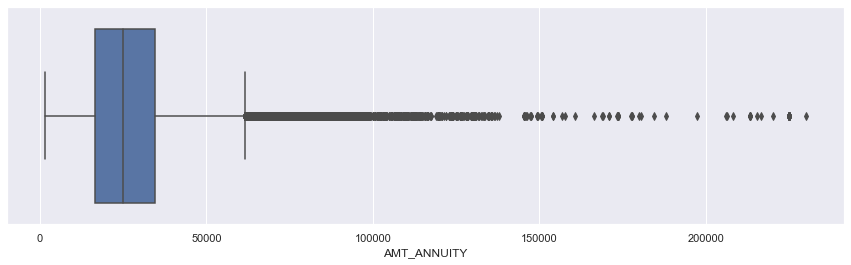

count    307499.000000
mean      27107.820380
std       14487.753959
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      230161.500000
Name: AMT_ANNUITY, dtype: float64


In [239]:
print("Let us see the updated box plot and aggregate statistics for AMT_ANNUITY")
#analysis of AMT_ANNUITY
plt.figure(figsize=(15,4))
sns.boxplot(app_data['AMT_ANNUITY'])
plt.show()
print(app_data['AMT_ANNUITY'].describe())

### Just to be double sure about the outlier data that is still seen in box plot. Let is check what those records are which have AMT_ANNUITY value above 200000

In [240]:
#Find out the index of row that has the identified outlier
print(app_data[app_data['AMT_ANNUITY'] == app_data['AMT_ANNUITY'].max()][['AMT_ANNUITY']])
# print(app_data[app_data['AMT_ANNUITY'] > 200000])[['AMT_CREDIT', 'AMT_ANNUITY','MON_EMPLOYED','AGE']].describe()
print(app_data[app_data['AMT_ANNUITY'] > 200000][['AMT_CREDIT', 'AMT_ANNUITY','MON_EMPLOYED','AGE']])
print(app_data[app_data['AMT_ANNUITY'] > 200000][['AMT_CREDIT', 'AMT_ANNUITY','MON_EMPLOYED','AGE']].describe())
print(len(app_data[app_data['AMT_ANNUITY'] > 200000][['AMT_CREDIT', 'AMT_ANNUITY','MON_EMPLOYED','AGE']]))

        AMT_ANNUITY
101508     230161.5
        AMT_CREDIT  AMT_ANNUITY  MON_EMPLOYED   AGE
12108    2250000.0     225000.0         209.4  42.0
15501    2250000.0     225000.0         420.5  53.9
20119    2250000.0     225000.0          26.5  43.8
20338    2303460.0     213291.0         177.0  37.8
23582    2250000.0     225000.0          74.3  57.6
32100    2250000.0     225000.0          83.6  30.9
66528    2250000.0     225000.0          57.6  33.7
89256    2205000.0     206167.5       12174.8  51.9
101007   2250000.0     225000.0         185.5  36.7
101508   2303460.0     230161.5          77.8  55.5
103006   2250000.0     225000.0          12.6  29.5
104938   2250000.0     225000.0          83.2  28.8
109209   2250000.0     225000.0         245.6  53.4
111186   2303460.0     213160.5         291.4  59.8
117546   2250000.0     208215.0         178.9  58.0
128189   2250000.0     225000.0         183.8  45.4
132913   2250000.0     225000.0          89.8  40.6
139784   2303460.0     2

#### Aggregate Statistics of 35 records of AMT_ANNUITY> 200000 above show that data is good and has completely relevant and sensible information in rest of the columns. 
#### Median values of other columns completely justify thsi data so we will retain it 

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 4. MON_EMPLOYED
### STEP-1,2: Visual, Quantile and Aggregate Statistics Based Analysis of Outliers of  MON_EMPLOYED: 
#### As per teh visual analysis there is a cluster of outliers in this variable and this cluster is extremely remote form 75th percentile value. From Aggregate statitics, it is clear that the outlier value is  12174.800000 months, which is an impossible value on human plane. 

### STEP-3: Treatement done:
#### Since value is quite large and number of records of such value is 550000+, we assumed that this value denotes the applicants that are employed for highest possible number of months. Considering this, we can cap these outliers with 500 months(Assuming a person works maximum for approximately 40 years before retirement)  

count    307511.000000
mean       2257.497432
std        4648.137856
min           0.000000
25%          31.100000
50%          74.000000
75%         190.200000
max       12174.800000
Name: MON_EMPLOYED, dtype: float64


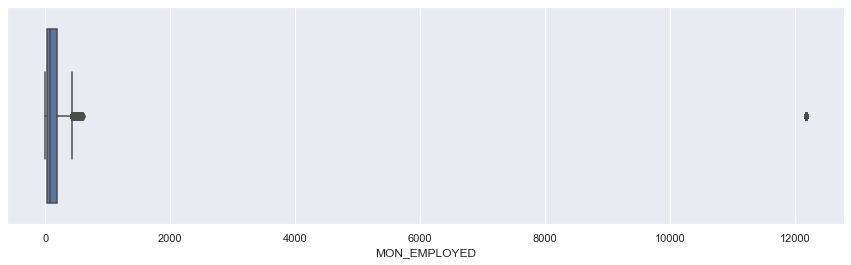

         AMT_CREDIT    AMT_ANNUITY   MON_EMPLOYED            AGE
count  2.519730e+05  251961.000000  251973.000000  251973.000000
mean   6.113384e+05   27811.013193      79.181837      40.448592
std    4.061125e+05   14639.301057      77.132399      10.020639
min    4.500000e+04    1980.000000       0.000000      20.500000
25%    2.779695e+05   17073.000000      25.600000      32.300000
50%    5.212800e+05   25834.500000      54.900000      39.900000
75%    8.295840e+05   35617.500000     105.700000      48.100000
max    4.031032e+06  230161.500000     499.700000      69.000000


In [241]:
# print("Let us check the aggregate statistics of this column:")
print(app_data['MON_EMPLOYED'].describe())
plt.figure(figsize=(15,4))
sns.boxplot(app_data['MON_EMPLOYED'])
plt.show()


# app_data[app_data['MON_EMPLOYED']>app_data['MON_EMPLOYED'].quantile(.75)][['AMT_CREDIT', 'AMT_ANNUITY','MON_EMPLOYED','AGE']].describe()

print(app_data[app_data.MON_EMPLOYED < 500][['AMT_CREDIT', 'AMT_ANNUITY','MON_EMPLOYED','AGE']].describe())
app_data.loc[app_data.MON_EMPLOYED > 500, 'MON_EMPLOYED'] = 500

## STEP-4: Verification of Outlier Treatment for variable MON_EMPLOYED

count    307511.000000
mean        155.183669
std         176.299941
min           0.000000
25%          31.100000
50%          74.000000
75%         190.200000
max         500.000000
Name: MON_EMPLOYED, dtype: float64


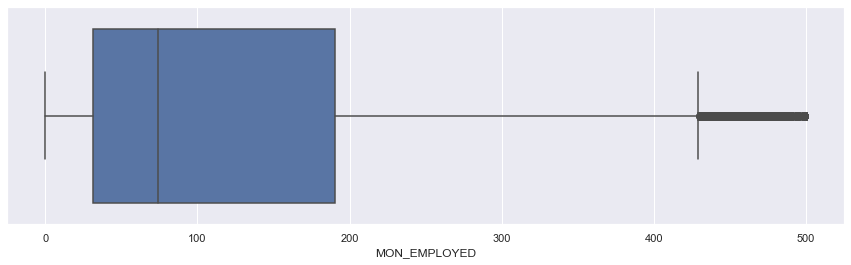

In [242]:
# print("Let us check the aggregate statistics of this column:")
print(app_data['MON_EMPLOYED'].describe())
plt.figure(figsize=(15,4))
sns.boxplot(app_data['MON_EMPLOYED'])
plt.show()

# print(app_data[app_data.MON_EMPLOYED < 500][['AMT_CREDIT', 'AMT_ANNUITY','MON_EMPLOYED','AGE']].describe())

## 4. OBS_30_CNT_SOCIAL_CIRCLE
#### Outlier Value = 348
    Our analysis reveals that 
    1) Max value i.e 348 is more than 174 times larger than the 75th percentile
    2) This value is seen for only one record in entire data
    This concludes that the record is an outlier. 
    
#### Treatment Done:
    We will impute this outlier value with median.
    
    Details of steps followed for analysis and imputation are given in next set of cells

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64 

Plot for OBS_30_CNT_SOCIAL_CIRCLE before imputation of outlier


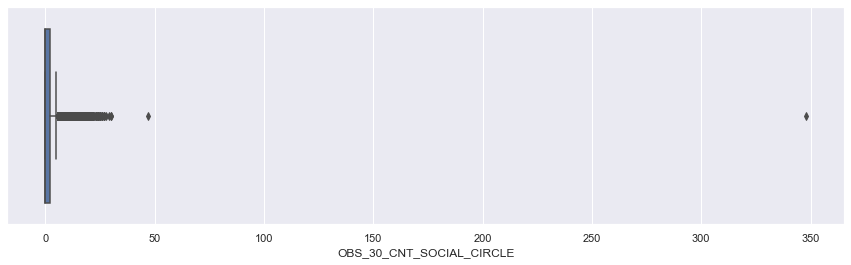

In [243]:
print(app_data['OBS_30_CNT_SOCIAL_CIRCLE'].describe(),"\n")

print("Plot for OBS_30_CNT_SOCIAL_CIRCLE before imputation of outlier")
plt.figure(figsize=(15,4))
sns.boxplot(app_data['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()


Plot for OBS_30_CNT_SOCIAL_CIRCLE after imputation of outlier


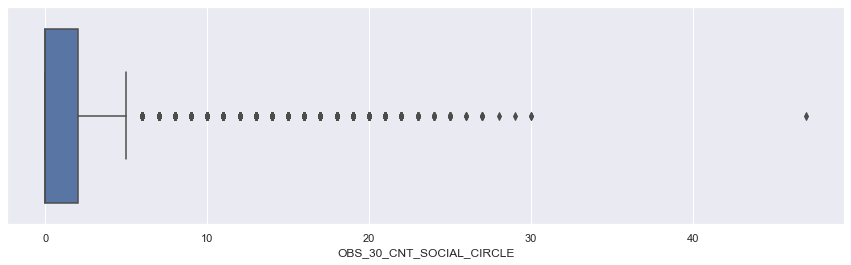

In [244]:
app_data.loc[app_data['OBS_30_CNT_SOCIAL_CIRCLE'] == 348, 'OBS_30_CNT_SOCIAL_CIRCLE'] = app_data['OBS_30_CNT_SOCIAL_CIRCLE'].median()
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

print("Plot for OBS_30_CNT_SOCIAL_CIRCLE after imputation of outlier")
plt.figure(figsize=(15,4))
sns.boxplot(app_data['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()


#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Binning of continuous variables

#### Binning of AGE variable in AGE_GROUP

In [245]:
app_data['AGE_GROUP'] = pd.cut(app_data['AGE'], [0,15,30,45,60,75,9999],labels = ["<15","15-30","30-45","45-60","60-75","75+"])

print(app_data['AGE_GROUP'].value_counts())

30-45    123543
45-60    103343
15-30     45389
60-75     35236
75+           0
<15           0
Name: AGE_GROUP, dtype: int64


#### Binning of AMT_INCOME_TOTAL variable in INCOME_GROUP

In [246]:
app_data['INCOME_GROUP'] = pd.cut(app_data['AMT_INCOME_TOTAL'], [0,100000,200000,300000,400000,500000],labels = ["Very Low","Low","Medium","High","Very High"])

print(app_data['INCOME_GROUP'].value_counts())

Low          155898
Medium        65176
Very Low      63698
High          14676
Very High      5361
Name: INCOME_GROUP, dtype: int64


# -------------------------------------------Analysis-------------------------------------------------------

## Finding Imbalance Percentage

#### Creating a list of columns with 2 to 3 categorical values for imbalancing percentage check

In [247]:
balancing_checklist = []
for item in app_data.columns:
    if len(app_data[item].unique())<4:
        balancing_checklist.append(item)
        
print(balancing_checklist)

['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_PHONE', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_WORK_CITY']


#### Finding imbalance percentage for columns in list balancing_checklist

In [248]:
for item in balancing_checklist:
    print(item)
    print(100*(app_data[item].value_counts(normalize = True)),"\n")

TARGET
0    91.927118
1     8.072882
Name: TARGET, dtype: float64 

NAME_CONTRACT_TYPE
Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64 

CODE_GENDER
F    65.835694
M    34.164306
Name: CODE_GENDER, dtype: float64 

FLAG_OWN_CAR
N    65.989184
Y    34.010816
Name: FLAG_OWN_CAR, dtype: float64 

FLAG_OWN_REALTY
Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64 

FLAG_PHONE
0    71.893363
1    28.106637
Name: FLAG_PHONE, dtype: float64 

REGION_RATING_CLIENT_W_CITY
2    74.626274
3    14.262904
1    11.110822
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64 

REG_CITY_NOT_WORK_CITY
0    76.954646
1    23.045354
Name: REG_CITY_NOT_WORK_CITY, dtype: float64 



###### From above data we can say that data in below column has high percentage of imbalancing where percentage of particular value is above 90%
###### TARGET
###### NAME_CONTRACT_TYPE

###### From above data we can say that data in below column has low percentage of imbalancing where percentage of particular value is above 60% but below 77%
###### CODE_GENDER
###### FLAG_OWN_CAR
###### FLAG_OWN_REALTY
###### FLAG_PHONE
###### REGION_RATING_CLIENT_W_CITY
###### REG_CITY_NOT_WORK_CITY

## Formation of 2 data subsets with Target Value as '0' and '1'

#### Creating dataframe 'TARGET_1' where Target variable value marked as 1

In [249]:
TARGET_1 = app_data.loc[app_data['TARGET'] == 1, :]
TARGET_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,ORG_TYPE,AGE,MON_EMPLOYED,MON_REGISTRATION,MON_ID_PUBLISH,MON_LAST_PHONE_CHANGE,AGE_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,0.018801,1,Laborers,1,2,10,0,Business Entity Type 3,0.262949,0.139376,2,2,0,0,1,Business Entity,25.9,21.2,121.6,70.7,37.8,15-30,Medium
26,100031,1,Cash loans,F,N,Y,112500.0,979992.0,27076.5,Working,Secondary / secondary special,Widow,0.018029,0,Cooking staff,1,2,9,0,Business Entity Type 3,0.548477,0.190706,10,1,0,2,2,Business Entity,51.3,87.6,219.1,60.9,5.4,45-60,Low
40,100047,1,Cash loans,M,N,Y,202500.0,1193580.0,35028.0,Commercial associate,Secondary / secondary special,Married,0.025164,0,Laborers,2,2,9,0,Business Entity Type 3,0.306841,0.320163,0,0,2,0,4,Business Entity,47.9,42.1,39.4,34.3,35.8,45-60,Medium
42,100049,1,Cash loans,F,N,N,135000.0,288873.0,16258.5,Working,Secondary / secondary special,Civil marriage,0.007305,1,Sales staff,2,3,11,0,Self-employed,0.674203,0.399676,1,0,0,0,2,Self-employed,36.7,119.9,1.5,147.0,49.3,30-45,Low
81,100096,1,Cash loans,F,N,Y,81000.0,252000.0,14593.5,Pensioner,Secondary / secondary special,Married,0.028663,0,NaN,2,2,10,0,NaN,0.023952,0.720944,1,1,0,0,0,nan,67.9,500.0,179.7,140.0,0.0,60-75,Very Low


#### Creating dataframe 'TARGET_0' where Target variable value marked as 0

In [250]:
TARGET_0 = app_data.loc[app_data['TARGET'] == 0, :]
TARGET_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,ORG_TYPE,AGE,MON_EMPLOYED,MON_REGISTRATION,MON_ID_PUBLISH,MON_LAST_PHONE_CHANGE,AGE_GROUP,INCOME_GROUP
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,State servant,Higher education,Married,0.003541,1,Core staff,2,1,11,0,School,0.622246,NaN,1,0,0,0,0,School,45.9,39.6,39.5,9.7,27.6,45-60,Medium
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,0.010032,1,Laborers,1,2,9,0,Government,0.555912,0.729567,0,0,0,0,0,Government,52.2,7.5,142.0,84.4,27.2,45-60,Very Low
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,0.008019,0,Laborers,2,2,17,0,Business Entity Type 3,0.650442,NaN,2,0,NaN,NaN,NaN,Business Entity,52.1,101.3,327.8,81.2,20.6,45-60,Low
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,0.028663,0,Core staff,1,2,11,1,Religion,0.322738,NaN,0,0,0,0,0,Religion,54.6,101.3,143.7,115.3,36.9,45-60,Low
5,100008,0,Cash loans,M,N,Y,99000.0,490495.5,27517.5,State servant,Secondary / secondary special,Married,0.035792,1,Laborers,2,2,16,0,Other,0.354225,0.621226,0,0,0,1,1,Other,46.4,52.9,165.7,15.9,84.5,45-60,Very Low


## --------------------------------------TARGET_1-ANALYSIS - START------------------------------------------------

## Univariate Analysis for dataframe - TARGET_1

####  Categorical unordered univariate analysis - TARGET_1

In [251]:
#NAME_CONTRACT_TYPE
#CODE_GENDER
#FLAG_OWN_CAR
#FLAG_OWN_REALTY
#NAME_INCOME_TYPE
#NAME_FAMILY_STATUS
#FLAG_PHONE
#OCCUPATION_TYPE
#REG_CITY_NOT_WORK_CITY
#ORG_TYPE

In [252]:
uni_cat_uno = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                'NAME_FAMILY_STATUS','FLAG_PHONE','OCCUPATION_TYPE','REG_CITY_NOT_WORK_CITY','ORG_TYPE']

<Figure size 432x288 with 0 Axes>

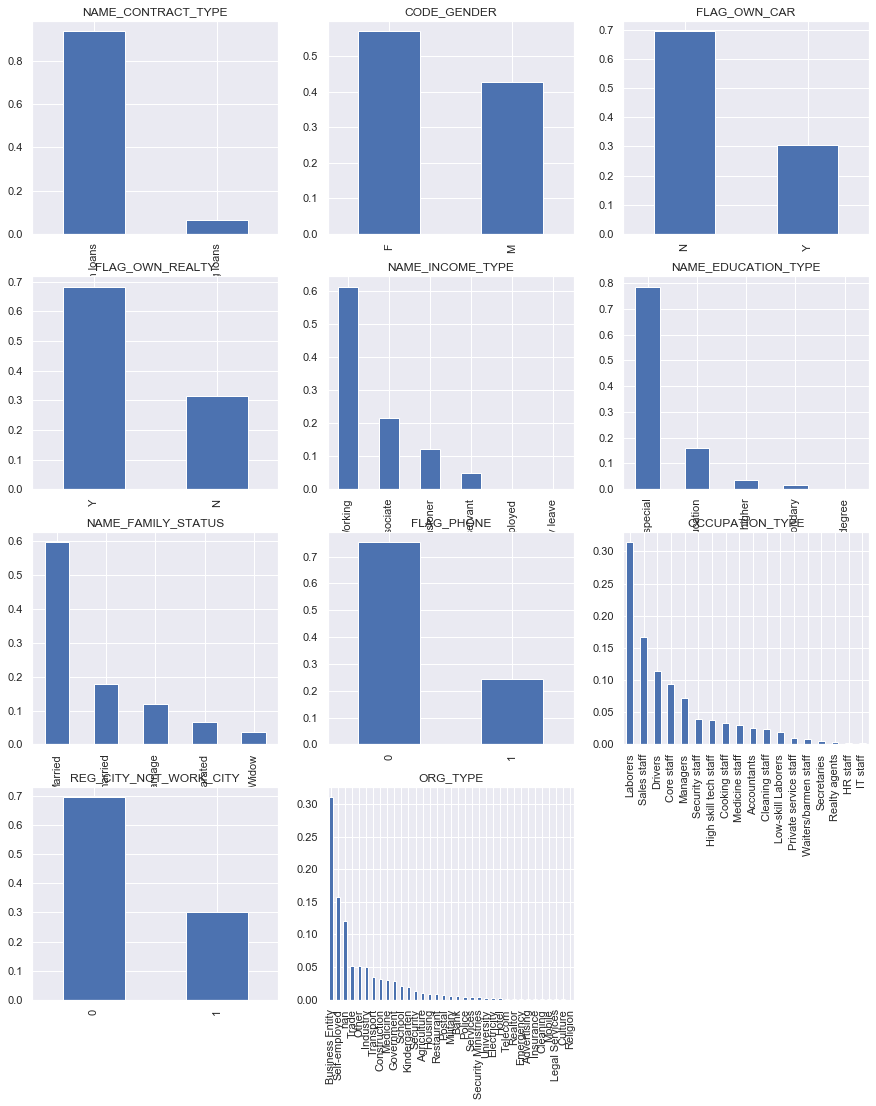

In [253]:
sns.set(style = "darkgrid")
plt.figure(1)
plt.figure(figsize=(15,18))

i = 1

for item in uni_cat_uno:
    plt.subplot(4, 3, i)
    plt.title(item)
    TARGET_1[item].value_counts(normalize = True).plot.bar()
    i = i+1

plt.show()


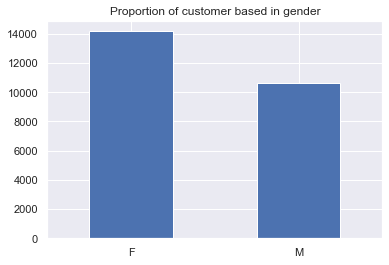

In [254]:
plt.figure(figsize=(6, 4))
plt.title("Proportion of customer based in gender")
Gender_Plot = TARGET_1['CODE_GENDER'].value_counts().plot.bar()
plt.xticks(rotation = 0)
plt.show()

### Inference
    Proportion of females is more than males in current application dataset with payment difficulty 

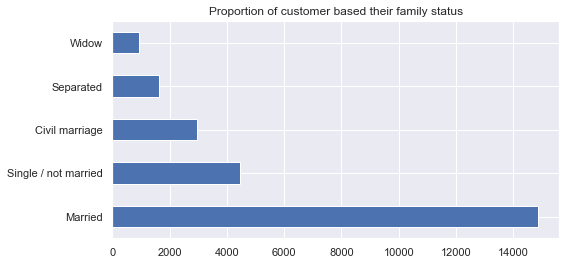

In [255]:
plt.figure(figsize=(8, 4))
plt.title("Proportion of customer based their family status")
Family_Plot = TARGET_1['NAME_FAMILY_STATUS'].value_counts().plot.barh()
plt.xticks(rotation = 0)
plt.show()

### Inference
    Proportion of married customers is most in the current application dataset with payment difficulty 

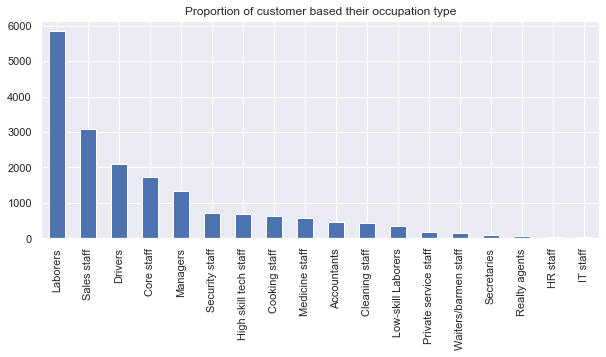

In [256]:
plt.figure(figsize=(10, 4))
plt.title("Proportion of customer based their occupation type")
occupation_Plot = TARGET_1['OCCUPATION_TYPE'].value_counts().plot.bar()
plt.xticks(rotation = 90)
plt.show()

### Inference
    Proportion of labourers is most in the current application dataset with payment difficulty 


####  Categorical ordered univariate analysis - TARGET_1

In [257]:
#REGION_RATING_CLIENT_W_CITY
#AGE_GROUP
#INCOME_GROUP
#NAME_EDUCATION_TYPE

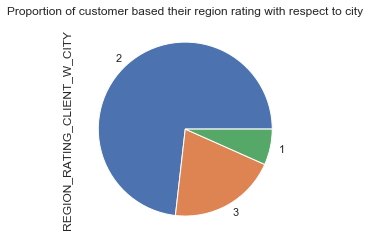

In [258]:
plt.figure(figsize=(10, 4))
plt.title("Proportion of customer based their region rating with respect to city")
occupation_Plot = TARGET_1['REGION_RATING_CLIENT_W_CITY'].value_counts().plot.pie()
plt.show()

### Inference
    Proportion of customers from cities with region rating 2 is most in current application dataset with payment difficulty 


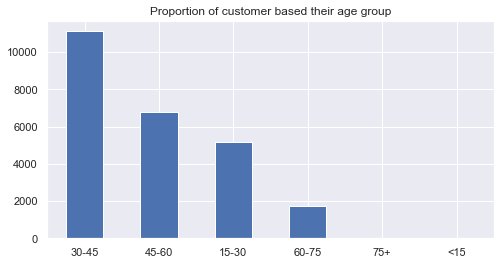

In [259]:
plt.figure(figsize=(8, 4))
plt.title("Proportion of customer based their age group")
AGE_Plot = TARGET_1['AGE_GROUP'].value_counts().plot.bar()
plt.xticks(rotation = 0)
plt.show()

### Inference
    Customers within age group 30-45 are most in the current application dataset with payment difficulty 


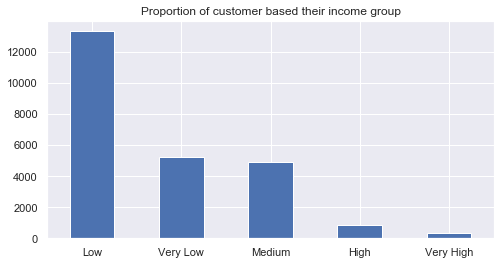

In [260]:
plt.figure(figsize=(8, 4))
plt.title("Proportion of customer based their income group")
Income_Plot = TARGET_1['INCOME_GROUP'].value_counts().plot.bar()
plt.xticks(rotation = 0)
plt.show()

### Inference
    Customers with low income group are the  most in the current application dataset with payment difficulty 


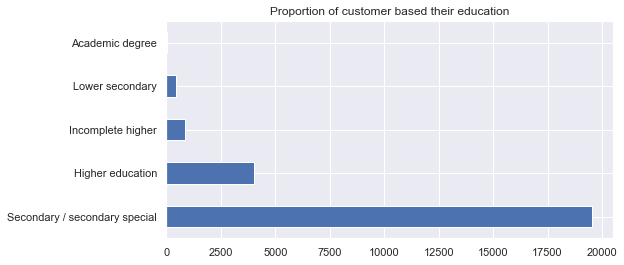

In [261]:
plt.figure(figsize=(8, 4))
plt.title("Proportion of customer based their education")
Education_Plot = TARGET_1['NAME_EDUCATION_TYPE'].value_counts().plot.barh()
plt.xticks(rotation = 0)
plt.show()

### Inference
    Proportion of customers with education as Secondary are the most in current application dataset with payment difficulty 


####  Numerical univariate analysis - TARGET_1

In [262]:
#AMT_INCOME_TOTAL
#AMT_CREDIT
#AMT_ANNUITY
#REGION_POPULATION_RELATIVE
#CNT_FAM_MEMBERS
#HOUR_APPR_PROCESS_START
#EXT_SOURCE_2
#EXT_SOURCE_3
#OBS_30_CNT_SOCIAL_CIRCLE
#DEF_30_CNT_SOCIAL_CIRCLE
#AMT_REQ_CREDIT_BUREAU_MON
#AMT_REQ_CREDIT_BUREAU_QRT
#AMT_REQ_CREDIT_BUREAU_YEAR
#AGE
#MON_EMPLOYED
#MON_REGISTRATION
#MON_ID_PUBLISH
#MON_LAST_PHONE_CHANGE

In [263]:
columns_numerical = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','CNT_FAM_MEMBERS',
                     'HOUR_APPR_PROCESS_START','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE',
                     'DEF_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
                     'AMT_REQ_CREDIT_BUREAU_YEAR','AGE','MON_EMPLOYED','MON_REGISTRATION','MON_ID_PUBLISH',
                     'MON_LAST_PHONE_CHANGE']

<Figure size 432x288 with 0 Axes>

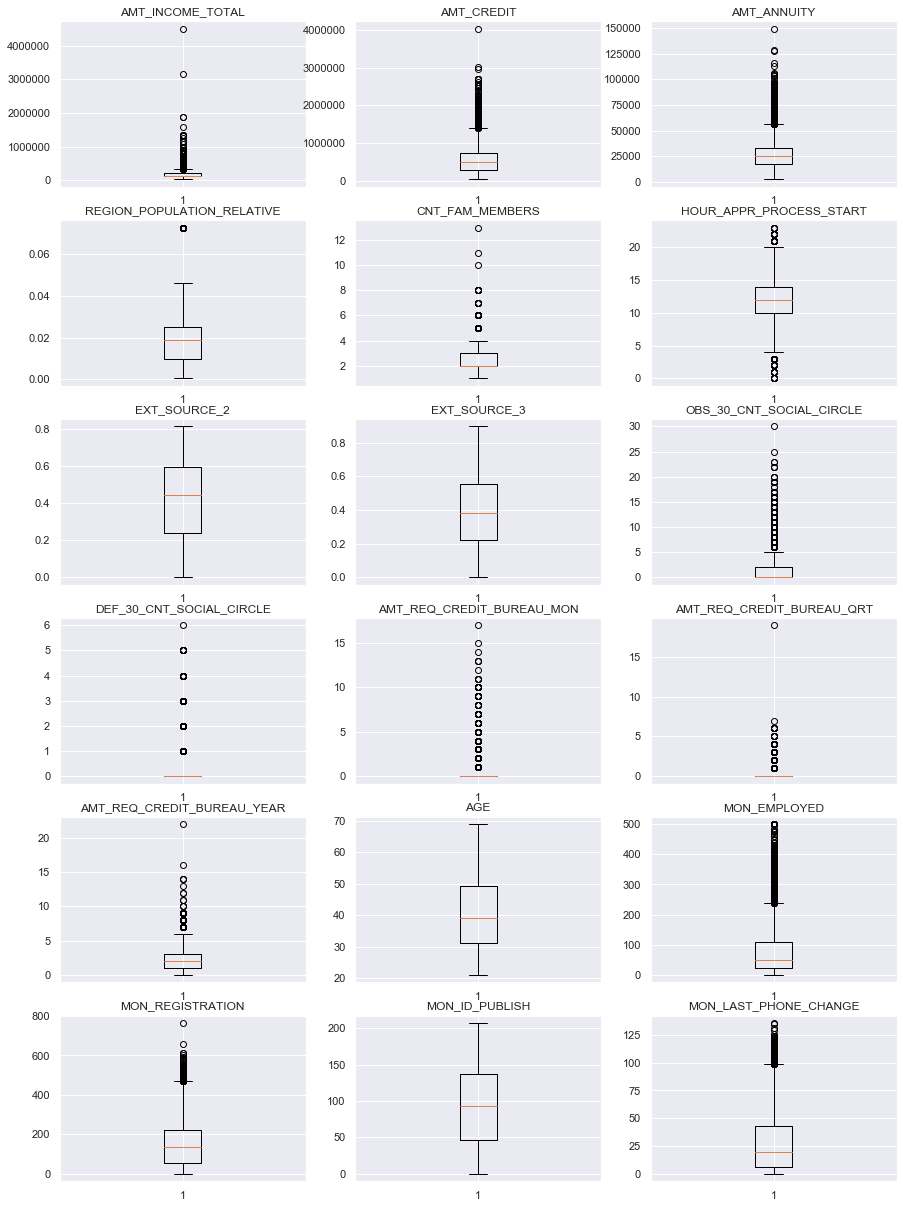

In [264]:

plt.figure(2)
plt.figure(figsize=(15,25))

i = 1

for item in columns_numerical:
    plt.subplot(7, 3, i)
    ax = plt.boxplot(TARGET_1[item].dropna())
    plt.title(item)
    i = i+1
    
plt.show()

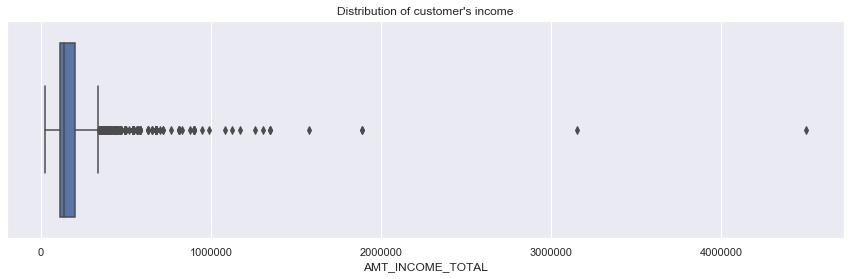

In [265]:
plt.figure(figsize=(15, 4))
sns.boxplot(TARGET_1['AMT_INCOME_TOTAL'])
plt.title("Distribution of customer's income")
plt.show()

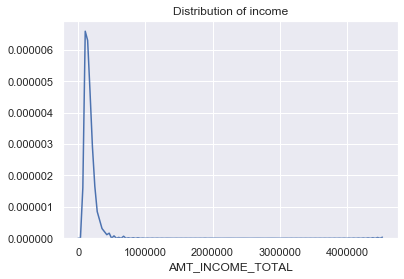

In [266]:
sns.set(style = "darkgrid")
sns.distplot(TARGET_1['AMT_INCOME_TOTAL'].dropna(), hist = False)
plt.title("Distribution of income")
plt.show()

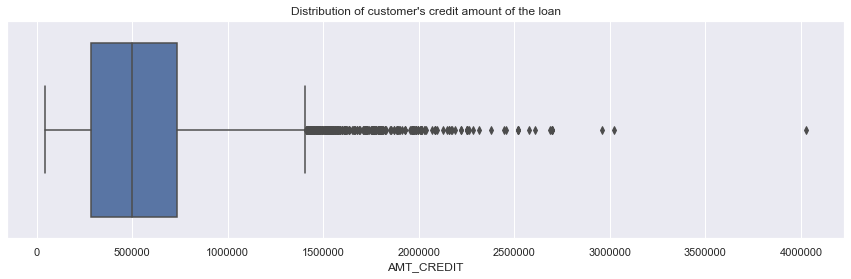

In [267]:
plt.figure(figsize=(15, 4))
sns.boxplot(TARGET_1['AMT_CREDIT'])
plt.title("Distribution of customer's credit amount of the loan")
plt.show()

### Inference
    Median value of credit value taken by customers is around 500000 and there is a cap with high continuous credit amount present in column


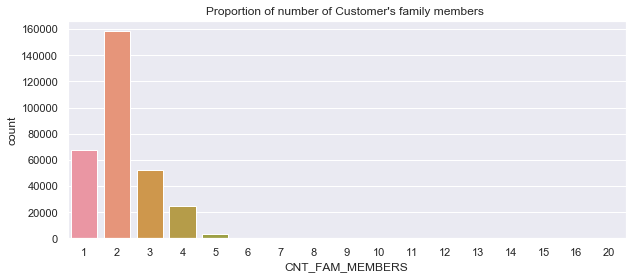

In [268]:
plt.figure(figsize=(10, 4))
sns.countplot(app_data['CNT_FAM_MEMBERS'])
plt.title("Proportion of number of Customer's family members ")
plt.show()

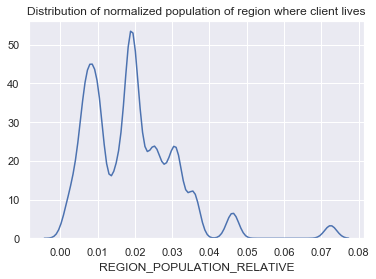

In [269]:
sns.set(style = "darkgrid")
sns.distplot(TARGET_1['REGION_POPULATION_RELATIVE'].dropna(), hist = False)
plt.title("Distribution of normalized population of region where client lives")
plt.show()

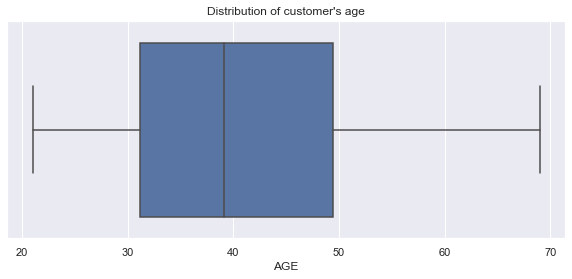

In [270]:
plt.figure(figsize=(10, 4))
sns.boxplot(TARGET_1['AGE'])
plt.title("Distribution of customer's age")
plt.show()

### Inference
    Minimum age for customer is just above 20 and maximum age is just below 70. Median age is around 38.
    No outliers present in this column.


## Correlation for numerical columns for dataframe - TARGET_1

In [271]:
TARGET_1_MODIFIED = TARGET_1.drop(['SK_ID_CURR','TARGET','FLAG_PHONE','REGION_RATING_CLIENT_W_CITY','REG_CITY_NOT_WORK_CITY'],axis = 1)
TARGET_1_cor_mat = TARGET_1_MODIFIED.corr()
TARGET_1_cor_mat

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,MON_EMPLOYED,MON_REGISTRATION,MON_ID_PUBLISH,MON_LAST_PHONE_CHANGE
AMT_INCOME_TOTAL,1.000000,0.310339,0.379768,0.109800,0.011665,0.079146,0.127646,-0.061746,-0.007251,-0.023893,0.053947,0.013705,0.046477,0.001549,-0.086632,-0.035417,0.004653,0.072625
AMT_CREDIT,0.310339,1.000000,0.752195,0.069161,0.051224,0.031782,0.120848,0.077698,0.019098,-0.025979,0.055038,-0.017467,-0.035719,0.135336,0.037636,0.025855,0.052327,0.110852
AMT_ANNUITY,0.379768,0.752195,1.000000,0.071690,0.075711,0.031236,0.116305,0.041415,0.004463,-0.022394,0.053413,-0.010205,-0.013841,0.014324,-0.058668,-0.034278,0.016768,0.079875
REGION_POPULATION_RELATIVE,0.109800,0.069161,0.071690,1.000000,-0.030163,0.142744,0.169751,-0.009810,0.006224,0.025865,0.071329,-0.007299,0.000602,0.048198,0.019704,0.056220,0.015543,0.055136
CNT_FAM_MEMBERS,0.011665,0.051224,0.075711,-0.030163,1.000000,-0.027526,0.001883,-0.019884,0.043983,0.007098,-0.009169,-0.012842,-0.012684,-0.203251,-0.172380,-0.145825,0.031787,0.013356
HOUR_APPR_PROCESS_START,0.079146,0.031782,0.031236,0.142744,-0.027526,1.000000,0.134698,-0.046450,-0.012776,0.002875,0.039514,-0.001544,-0.032692,-0.062175,-0.055668,0.032517,-0.021657,0.022817
EXT_SOURCE_2,0.127646,0.120848,0.116305,0.169751,0.001883,0.134698,1.000000,0.077760,0.017505,-0.010052,0.049686,-0.006601,0.000823,0.108652,0.032921,0.069996,0.059814,0.207908
EXT_SOURCE_3,-0.061746,0.077698,0.041415,-0.009810,-0.019884,-0.046450,0.077760,1.000000,-0.005614,-0.022253,-0.018931,-0.048683,-0.052539,0.171637,0.118383,0.086098,0.128264,0.065149
OBS_30_CNT_SOCIAL_CIRCLE,-0.007251,0.019098,0.004463,0.006224,0.043983,-0.012776,0.017505,-0.005614,1.000000,0.333825,0.003417,0.007185,0.038155,0.005140,0.003029,-0.014106,0.019965,0.028844
DEF_30_CNT_SOCIAL_CIRCLE,-0.023893,-0.025979,-0.022394,0.025865,0.007098,0.002875,-0.010052,-0.022253,0.333825,1.000000,-0.000700,-0.004944,0.012222,-0.004958,0.002792,-0.010300,-0.007608,-0.000228


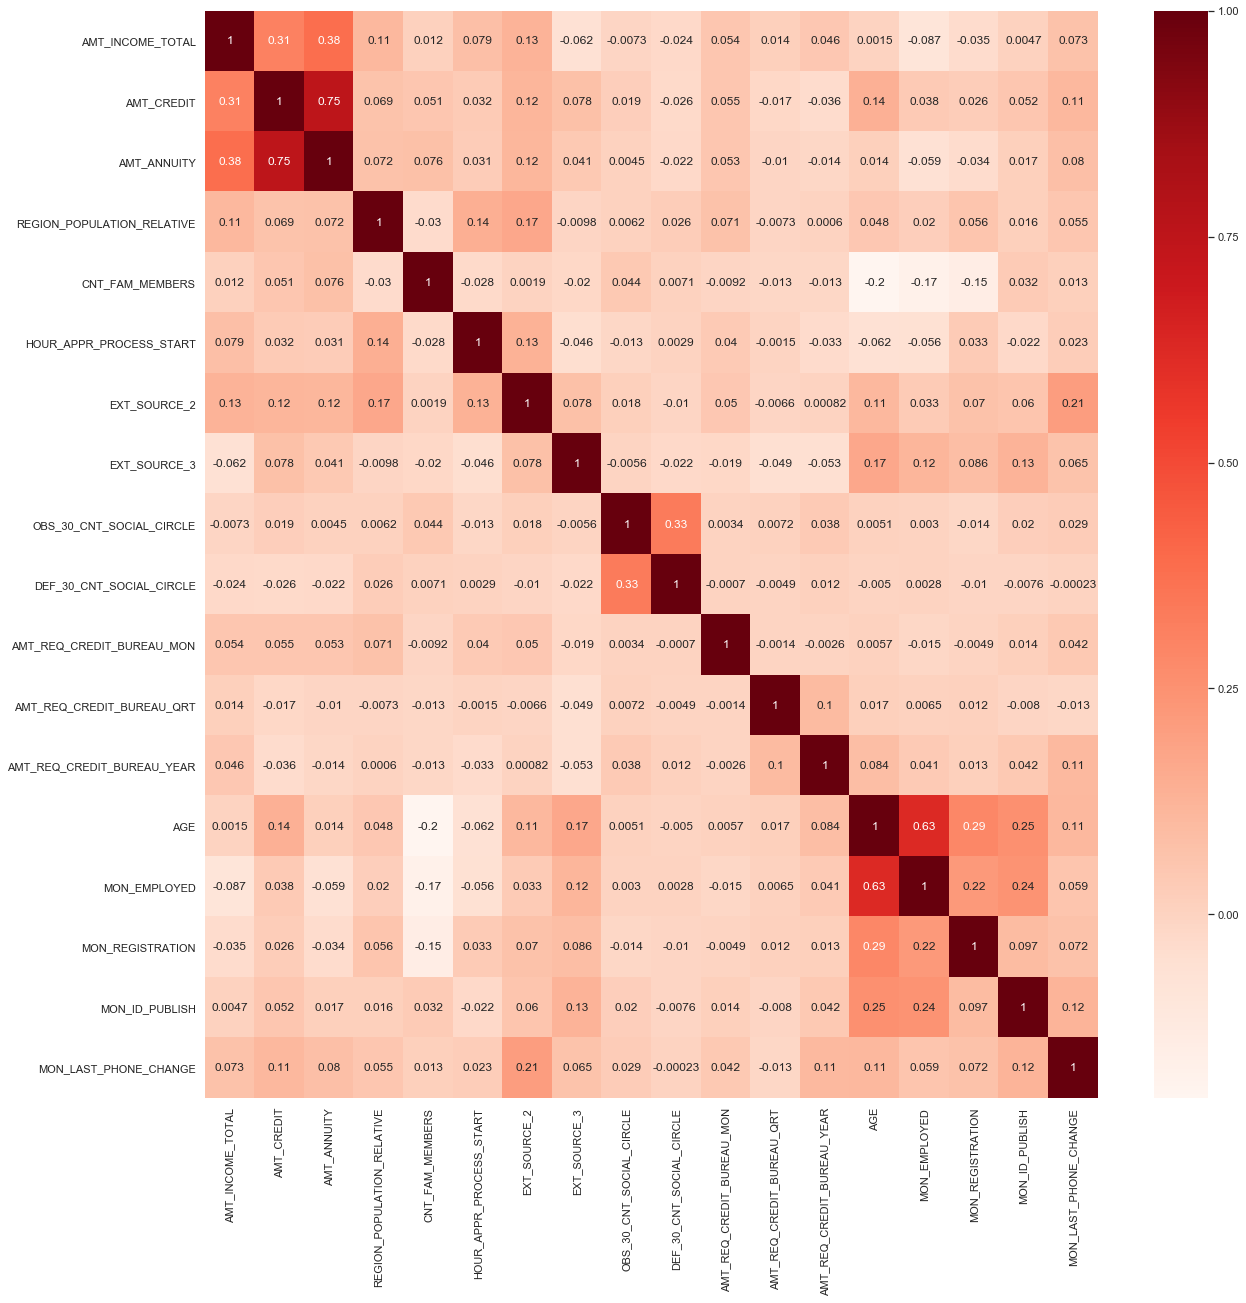

In [272]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(TARGET_1_cor_mat, annot = True, cmap = 'Reds')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

In [273]:
corr_1 = TARGET_1_cor_mat.where(np.triu(np.ones(TARGET_1_cor_mat.shape), k=1).astype(np.bool))
corr_TARGET_1 = corr_1.unstack().reset_index()
corr_TARGET_1.columns  = ['VAR1', 'VAR2', 'Correlation']
corr_TARGET_1 = corr_TARGET_1.dropna(subset = ['Correlation'])
corr_TARGET_1.Correlation = abs(corr_TARGET_1.Correlation)
corr_TARGET_1.sort_values("Correlation", ascending=False).head(10)

,VAR1,VAR2,Correlation
37,AMT_ANNUITY,AMT_CREDIT,0.752195
265,MON_EMPLOYED,AGE,0.627549
36,AMT_ANNUITY,AMT_INCOME_TOTAL,0.379768
170,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.333825
18,AMT_CREDIT,AMT_INCOME_TOTAL,0.310339
283,MON_REGISTRATION,AGE,0.289110
301,MON_ID_PUBLISH,AGE,0.252857
302,MON_ID_PUBLISH,MON_EMPLOYED,0.244836
284,MON_REGISTRATION,MON_EMPLOYED,0.222047
312,MON_LAST_PHONE_CHANGE,EXT_SOURCE_2,0.207908


### Above columns in each pair have strong relationship with each other

## Bivariate Analysis for dataframe - TARGET_1

#### Numerical - Numerical bivariate analysis

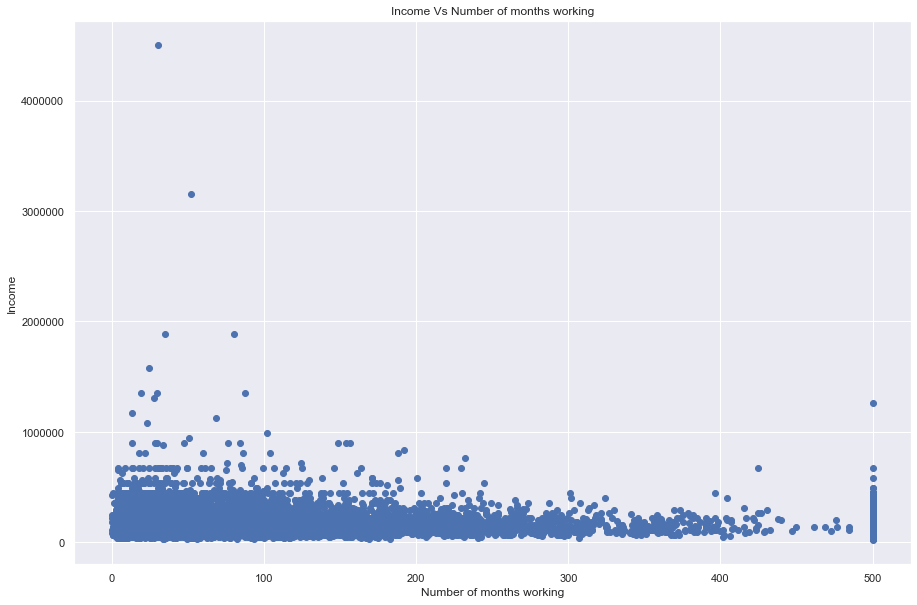

In [274]:
plt.figure(figsize=(15, 10))
plt.scatter(x = TARGET_1['MON_EMPLOYED'], y = TARGET_1['AMT_INCOME_TOTAL'])
plt.title("Income Vs Number of months working")
plt.xlabel("Number of months working")
plt.ylabel("Income")
plt.show()

### Inference
    As number of working months in increasing the income value for customer is decreasing


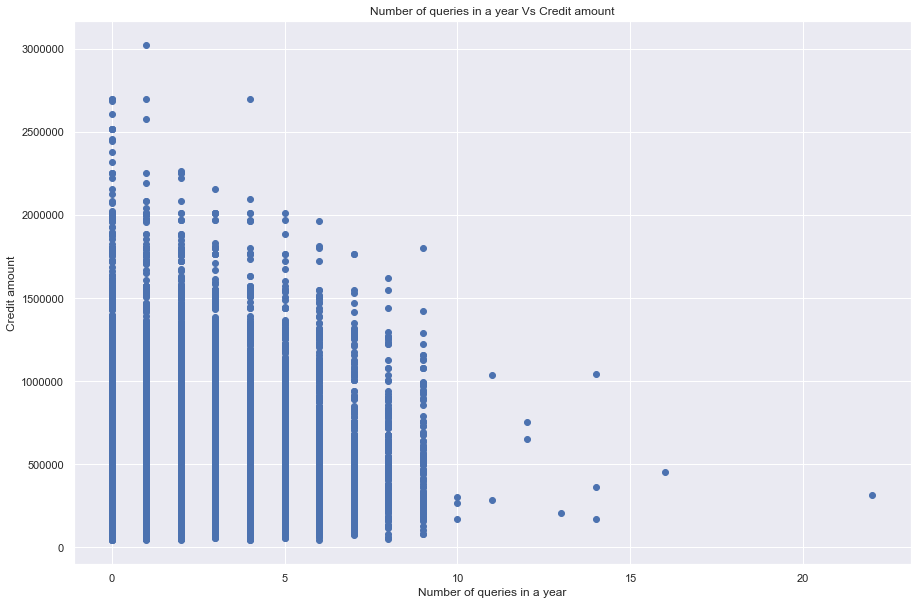

In [275]:
plt.figure(figsize=(15, 10))
plt.scatter(x = TARGET_1['AMT_REQ_CREDIT_BUREAU_YEAR'], y = TARGET_1['AMT_CREDIT'])
plt.title("Number of queries in a year Vs Credit amount")
plt.xlabel("Number of queries in a year")
plt.ylabel("Credit amount")
plt.show()

### Inference
    As credit amount is decreases number of queries are increasing showing customers with higher credit amount may have strict verification process as all verification is done in process.


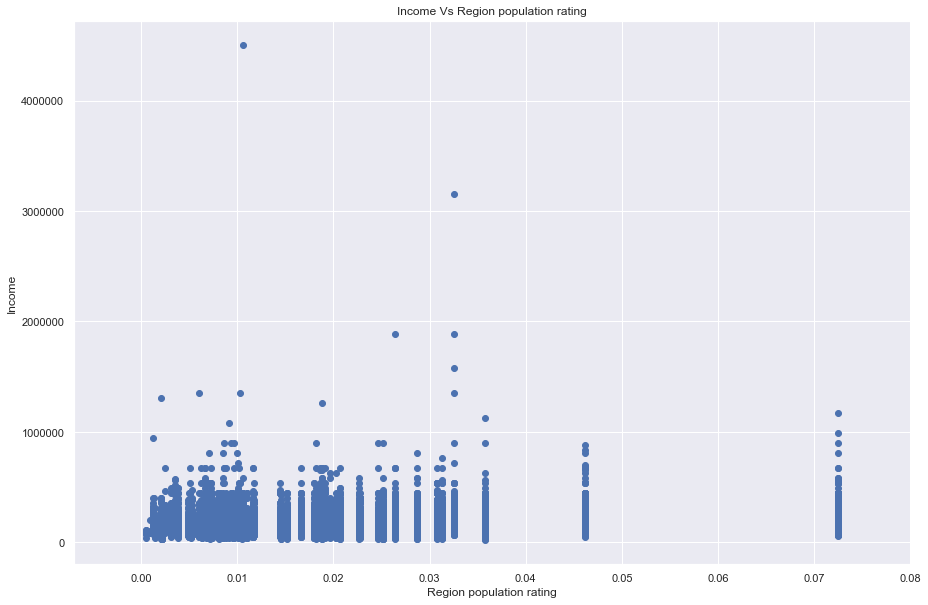

In [276]:
plt.figure(figsize=(15, 10))
plt.scatter(x = TARGET_1['REGION_POPULATION_RELATIVE'], y = TARGET_1['AMT_INCOME_TOTAL'])
plt.title("Income Vs Region population rating")
plt.xlabel("Region population rating")
plt.ylabel("Income")
plt.show()

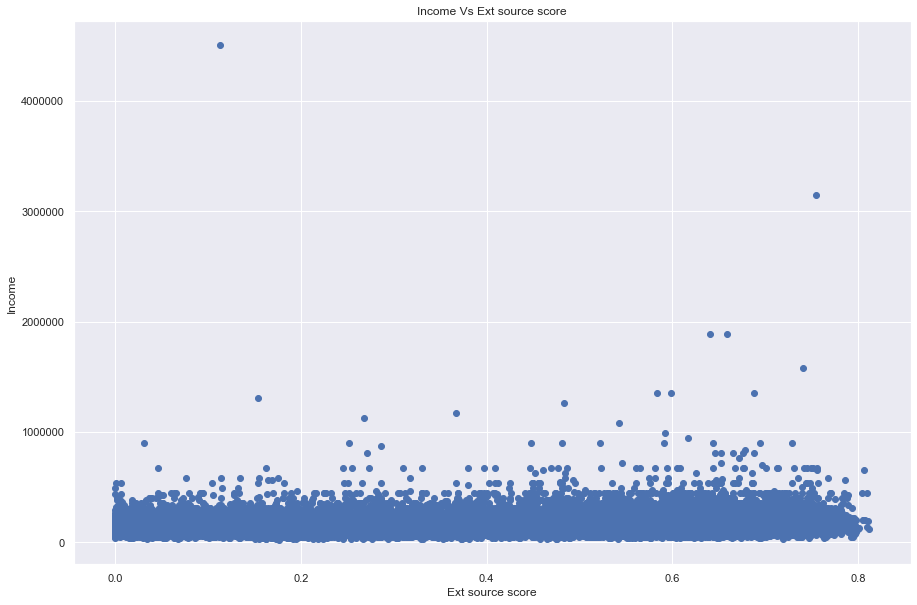

In [277]:
plt.figure(figsize=(15, 10))
plt.scatter(x = TARGET_1['EXT_SOURCE_2'], y = TARGET_1['AMT_INCOME_TOTAL'])
plt.title("Income Vs Ext source score")
plt.xlabel("Ext source score")
plt.ylabel("Income")
plt.show()

### Inference
    After certain income level external source rating is increasing as income is increasing


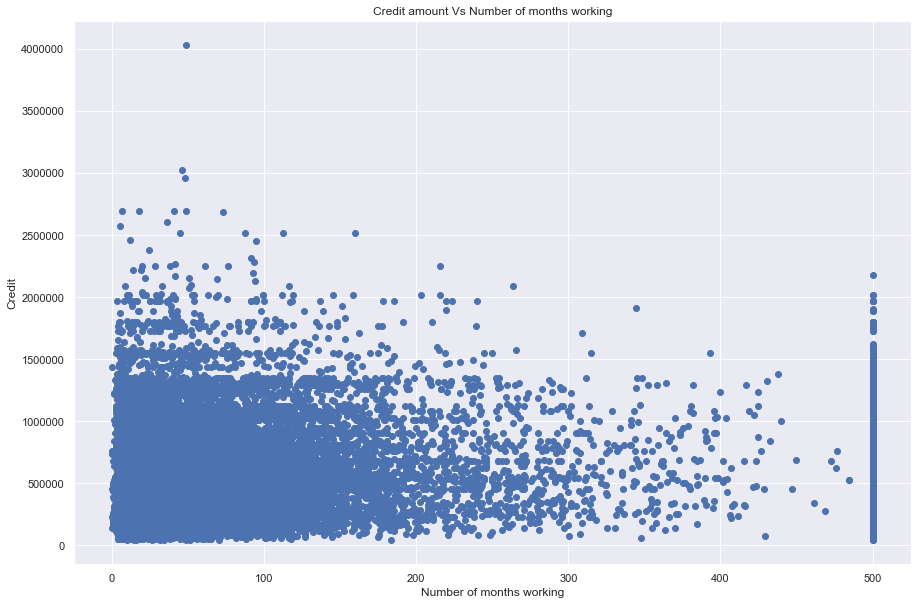

In [278]:
plt.figure(figsize=(15, 10))
plt.scatter(x = TARGET_1['MON_EMPLOYED'], y = TARGET_1['AMT_CREDIT'])
plt.title("Credit amount Vs Number of months working")
plt.xlabel("Number of months working")
plt.ylabel("Credit")
plt.show()

### Inference
    Credit amount by less experienced people is maximum and as experience increases credit amount reducing. Also experienced people are not availing much credit amount.


#### Numerical - Categorical bivariate analysis

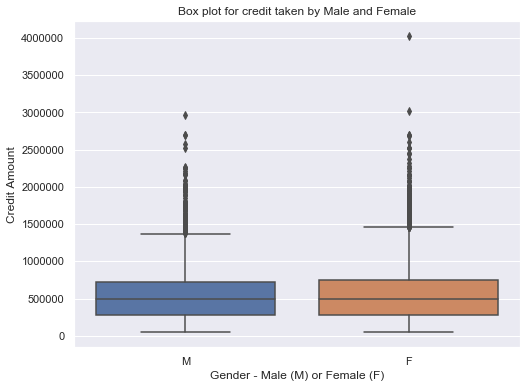

In [279]:
plt.figure(figsize=(8, 6))
sns.boxplot(x = TARGET_1['CODE_GENDER'], y = TARGET_1['AMT_CREDIT'])
plt.title("Box plot for credit taken by Male and Female")
plt.xlabel("Gender - Male (M) or Female (F)")
plt.ylabel("Credit Amount")
plt.show()

### Inference
    Median of credit amount taken by male and female customers is around same. Some female customers have availed very high amount of credit.


<Figure size 576x432 with 0 Axes>

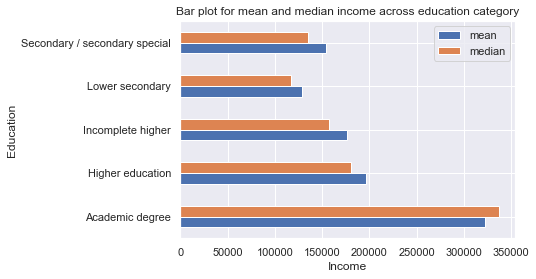

In [280]:
plt.figure(figsize=(8, 6))
TARGET_1.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].aggregate(['mean', 'median']).plot.barh()
plt.title("Bar plot for mean and median income across education category")
plt.ylabel("Education")
plt.xlabel("Income")
plt.show()

### Inference
    Customers with higher education has high level of income. There is a small difference in median and mean for each category showing data is relevant.


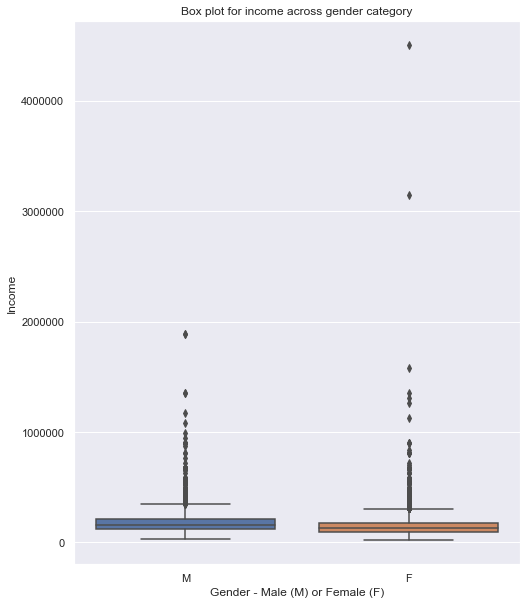

In [281]:
plt.figure(figsize=(8, 10))
sns.boxplot(x = TARGET_1['CODE_GENDER'], y = TARGET_1['AMT_INCOME_TOTAL'])
plt.title("Box plot for income across gender category")
plt.ylabel("Income")
plt.xlabel("Gender - Male (M) or Female (F)")
plt.show()

### Inference
    Median of income for male is slightly more than median income for female. Some female customers have highest range of income.


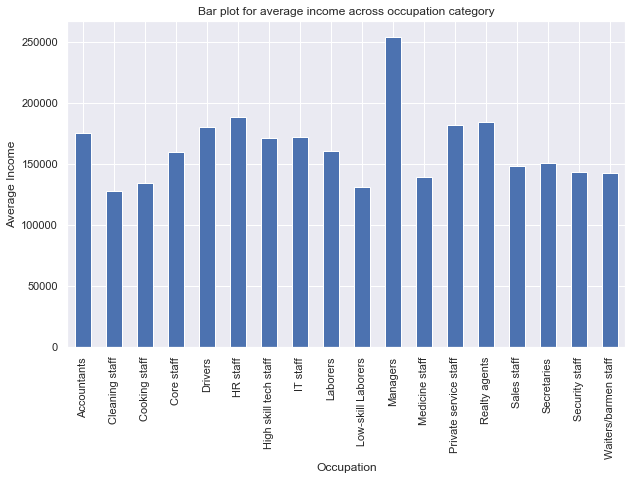

In [282]:
plt.figure(figsize=(10, 6))
TARGET_1.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].mean().plot.bar()
plt.title("Bar plot for average income across occupation category")
plt.ylabel("Average Income")
plt.xlabel("Occupation")
plt.show()

### Inference
    Managers are earning more average income in occupation category where lowest average income is for cleaning staff.


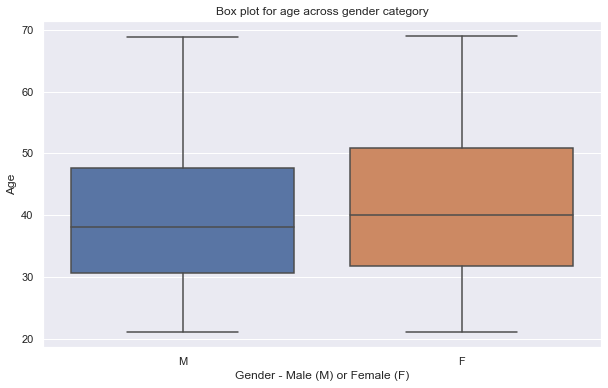

In [283]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = TARGET_1['CODE_GENDER'], y = TARGET_1['AGE'])
plt.title("Box plot for age across gender category")
plt.ylabel("Age")
plt.xlabel("Gender - Male (M) or Female (F)")
plt.show()

### Inference
    Median age for female customer is slightly higher than median of male customers. Age range is almost same for both male and female


#### Categorical - Categorical bivariate analysis

In [284]:
#create CAR_FLAG of numerical data type where flag "Y"= 1, "N"= 0

TARGET_1['CAR_FLAG'] = np.where(TARGET_1['FLAG_OWN_CAR'] == "Y",1,0)

TARGET_1['CAR_FLAG'].value_counts()


0    17249
1     7576
Name: CAR_FLAG, dtype: int64

In [285]:
#create REALTY_FLAG of numerical data type where flag "Y"= 1, "N"= 0

TARGET_1['REALTY_FLAG'] = np.where(TARGET_1['FLAG_OWN_REALTY'] == "Y",1,0)

TARGET_1['REALTY_FLAG'].value_counts()

1    16983
0     7842
Name: REALTY_FLAG, dtype: int64

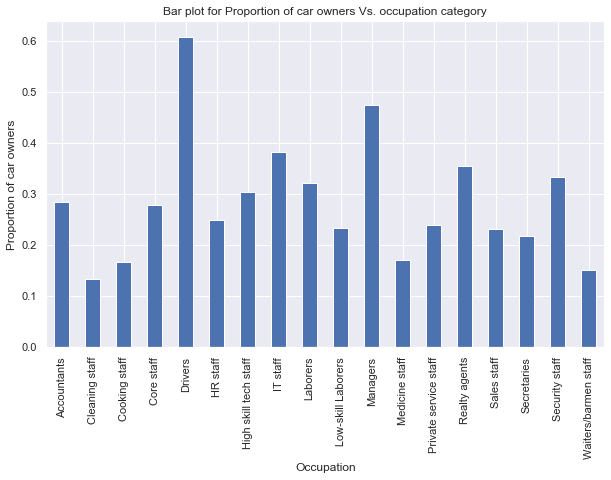

In [286]:
plt.figure(figsize=(10, 6))
TARGET_1.groupby('OCCUPATION_TYPE')['CAR_FLAG'].mean().plot.bar()
plt.title("Bar plot for Proportion of car owners Vs. occupation category")
plt.ylabel("Proportion of car owners")
plt.xlabel("Occupation")
plt.show()

### Inference
    Proportion of average number of drivers (by profession) owning a car is maximum where as cleaning staff has low proportion of owning a car.


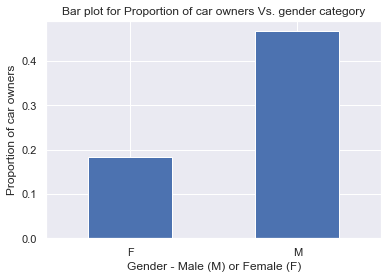

In [287]:
plt.figure(figsize=(6, 4))
TARGET_1.groupby('CODE_GENDER')['CAR_FLAG'].mean().plot.bar()
plt.title("Bar plot for Proportion of car owners Vs. gender category")
plt.ylabel("Proportion of car owners")
plt.xlabel("Gender - Male (M) or Female (F)")
plt.xticks(rotation = 0)
plt.show()

### Inference
    Average number of male customers owns more cars than that of female customers.


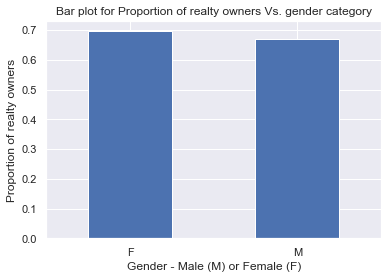

In [288]:
plt.figure(figsize=(6, 4))
TARGET_1.groupby('CODE_GENDER')['REALTY_FLAG'].mean().plot.bar()
plt.title("Bar plot for Proportion of realty owners Vs. gender category")
plt.ylabel("Proportion of realty owners")
plt.xlabel("Gender - Male (M) or Female (F)")
plt.xticks(rotation = 0)
plt.show()

### Inference
    Proportion of female customers who owns own realty is more than that of male customers


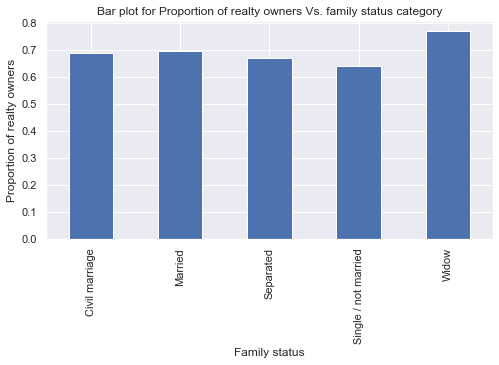

In [289]:
plt.figure(figsize=(8, 4))
TARGET_1.groupby('NAME_FAMILY_STATUS')['REALTY_FLAG'].mean().plot.bar()
plt.title("Bar plot for Proportion of realty owners Vs. family status category")
plt.ylabel("Proportion of realty owners")
plt.xlabel("Family status")
plt.show()

### Inference
    Widow customers owns are more who owns realty.


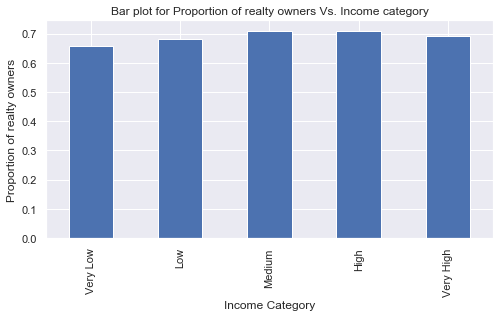

In [290]:
plt.figure(figsize=(8, 4))
TARGET_1.groupby('INCOME_GROUP')['REALTY_FLAG'].mean().plot.bar()
plt.title("Bar plot for Proportion of realty owners Vs. Income category")
plt.ylabel("Proportion of realty owners")
plt.xlabel("Income Category")
plt.show()

## ----------------------------------------TARGET_1-ANALYSIS - END--------------------------------------------------

## --------------------------------------TARGET_0-ANALYSIS - START-------------------------------------------------

## Univariate Analysis for dataframe - TARGET_0

####  Categorical unordered univariate analysis - TARGET_0

In [291]:
#NAME_CONTRACT_TYPE
#CODE_GENDER
#FLAG_OWN_CAR
#FLAG_OWN_REALTY
#NAME_INCOME_TYPE
#NAME_EDUCATION_TYPE
#NAME_FAMILY_STATUS
#FLAG_PHONE
#OCCUPATION_TYPE
#REG_CITY_NOT_WORK_CITY
#ORG_TYPE

In [292]:
uni_cat_uno = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                'NAME_FAMILY_STATUS','FLAG_PHONE','OCCUPATION_TYPE','REG_CITY_NOT_WORK_CITY','ORG_TYPE']

<Figure size 432x288 with 0 Axes>

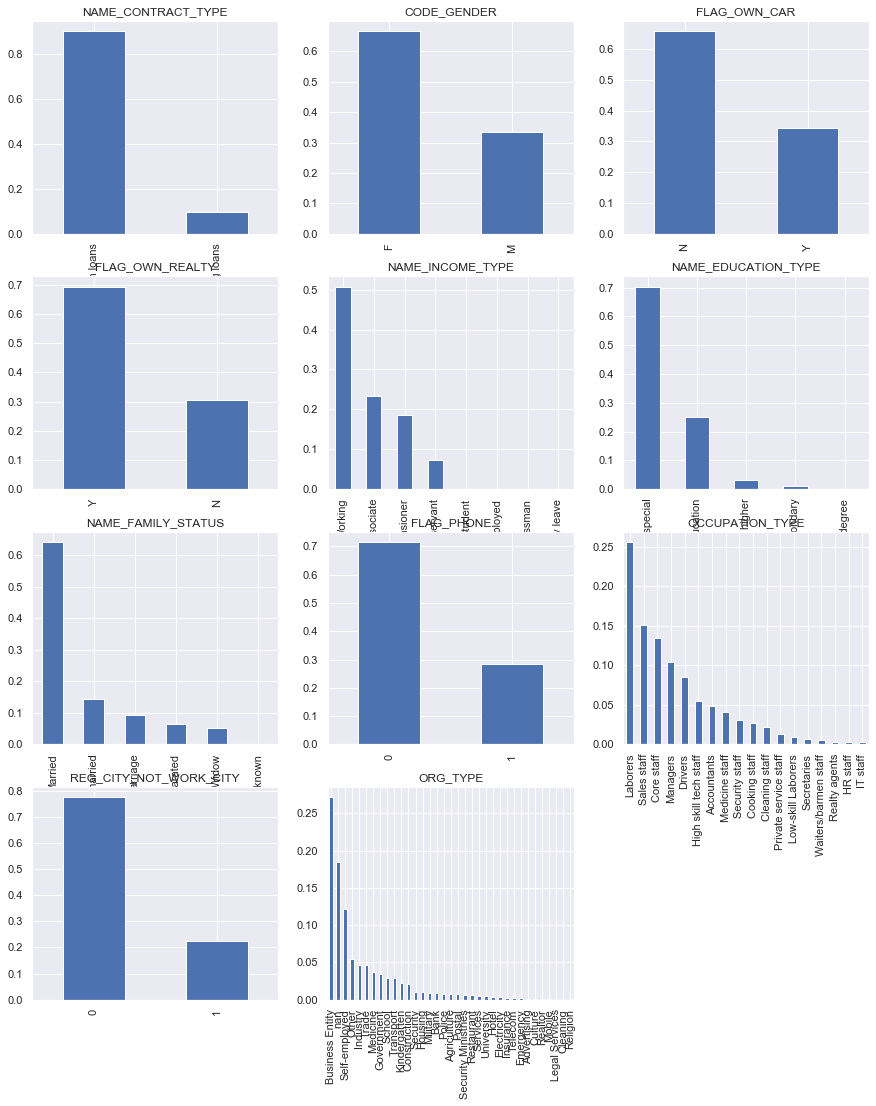

In [293]:
plt.figure(1)
plt.figure(figsize=(15,18))

i = 1

for item in uni_cat_uno:
    plt.subplot(4, 3, i)
    plt.title(item)
    TARGET_0[item].value_counts(normalize = True).plot.bar()
    i = i+1

plt.show()

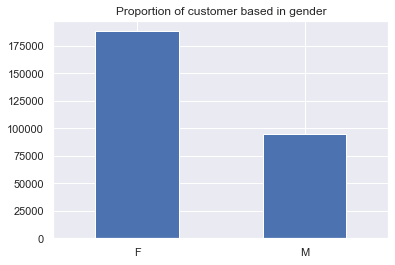

In [294]:
plt.figure(figsize=(6, 4))
plt.title("Proportion of customer based in gender")
Gender_Plot = TARGET_0['CODE_GENDER'].value_counts().plot.bar()
plt.xticks(rotation = 0)
plt.show()

### Inference
    Proportion of females is more than males in current application dataset with no payment difficulty 


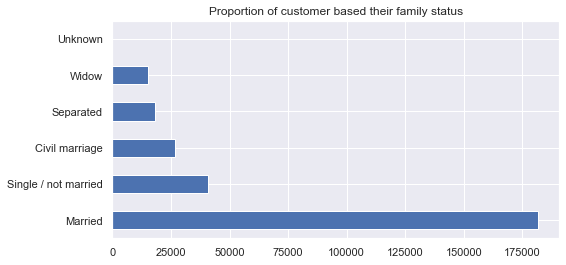

In [295]:
plt.figure(figsize=(8, 4))
plt.title("Proportion of customer based their family status")
Family_Plot = TARGET_0['NAME_FAMILY_STATUS'].value_counts().plot.barh()
plt.xticks(rotation = 0)
plt.show()

### Inference
    Proportion of married customers is most in the current application dataset with no payment difficulty 


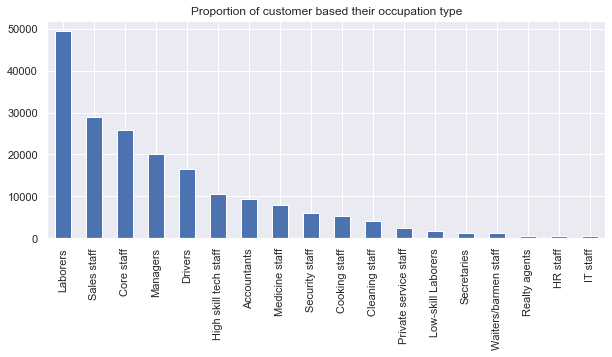

In [296]:
plt.figure(figsize=(10, 4))
plt.title("Proportion of customer based their occupation type")
occupation_Plot = TARGET_0['OCCUPATION_TYPE'].value_counts().plot.bar()
plt.xticks(rotation = 90)
plt.show()

### Inference
    Proportion of labourers is most in the current application dataset with no payment difficulty 


####  Categorical ordered univariate analysis - TARGET_0

In [297]:
#REGION_RATING_CLIENT_W_CITY
#AGE_GROUP
#INCOME_GROUP

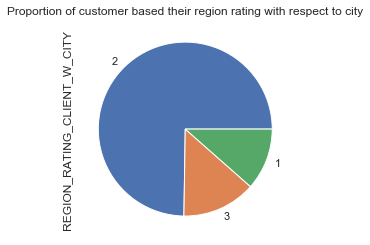

In [298]:
plt.figure(figsize=(10, 4))
plt.title("Proportion of customer based their region rating with respect to city")
occupation_Plot = TARGET_0['REGION_RATING_CLIENT_W_CITY'].value_counts().plot.pie()
plt.show()

### Inference
    Proportion of customers from cities with region rating 2 is most in current application dataset with no payment difficulty 


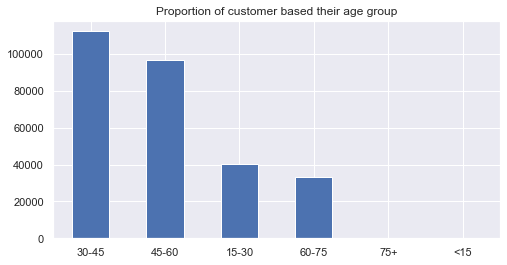

In [299]:
plt.figure(figsize=(8, 4))
plt.title("Proportion of customer based their age group")
AGE_Plot = TARGET_0['AGE_GROUP'].value_counts().plot.bar()
plt.xticks(rotation = 0)
plt.show()

### Inference
    Customers within age group 30-45 are most in the current application dataset with no payment difficulty 


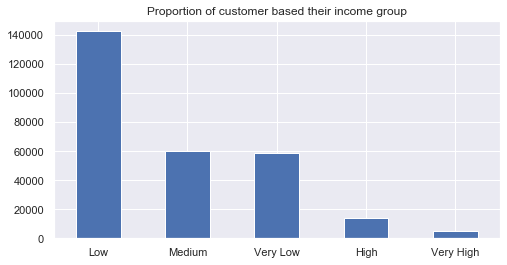

In [300]:
plt.figure(figsize=(8, 4))
plt.title("Proportion of customer based their income group")
Income_Plot = TARGET_0['INCOME_GROUP'].value_counts().plot.bar()
plt.xticks(rotation = 0)
plt.show()

### Inference
    Customers with low income group are the  most in the current application dataset with no payment difficulty 


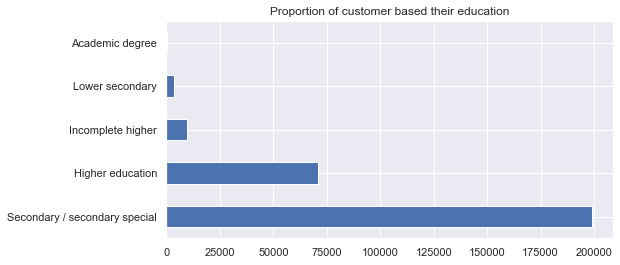

In [301]:
plt.figure(figsize=(8, 4))
plt.title("Proportion of customer based their education")
Education_Plot = TARGET_0['NAME_EDUCATION_TYPE'].value_counts().plot.barh()
plt.xticks(rotation = 0)
plt.show()

### Inference
    Proportion of customers with education as Secondary are the most in current application dataset with no payment difficulty 


####  Numerical univariate analysis - TARGET_0

In [302]:
#AMT_INCOME_TOTAL
#AMT_CREDIT
#AMT_ANNUITY
#REGION_POPULATION_RELATIVE
#CNT_FAM_MEMBERS
#HOUR_APPR_PROCESS_START
#EXT_SOURCE_2
#EXT_SOURCE_3
#OBS_30_CNT_SOCIAL_CIRCLE
#DEF_30_CNT_SOCIAL_CIRCLE
#AMT_REQ_CREDIT_BUREAU_MON
#AMT_REQ_CREDIT_BUREAU_QRT
#AMT_REQ_CREDIT_BUREAU_YEAR
#AGE
#MON_EMPLOYED
#MON_REGISTRATION
#MON_ID_PUBLISH
#MON_LAST_PHONE_CHANGE

In [303]:
columns_numerical = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','CNT_FAM_MEMBERS',
                     'HOUR_APPR_PROCESS_START','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE',
                     'DEF_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
                     'AMT_REQ_CREDIT_BUREAU_YEAR','AGE','MON_EMPLOYED','MON_REGISTRATION','MON_ID_PUBLISH',
                     'MON_LAST_PHONE_CHANGE']

<Figure size 432x288 with 0 Axes>

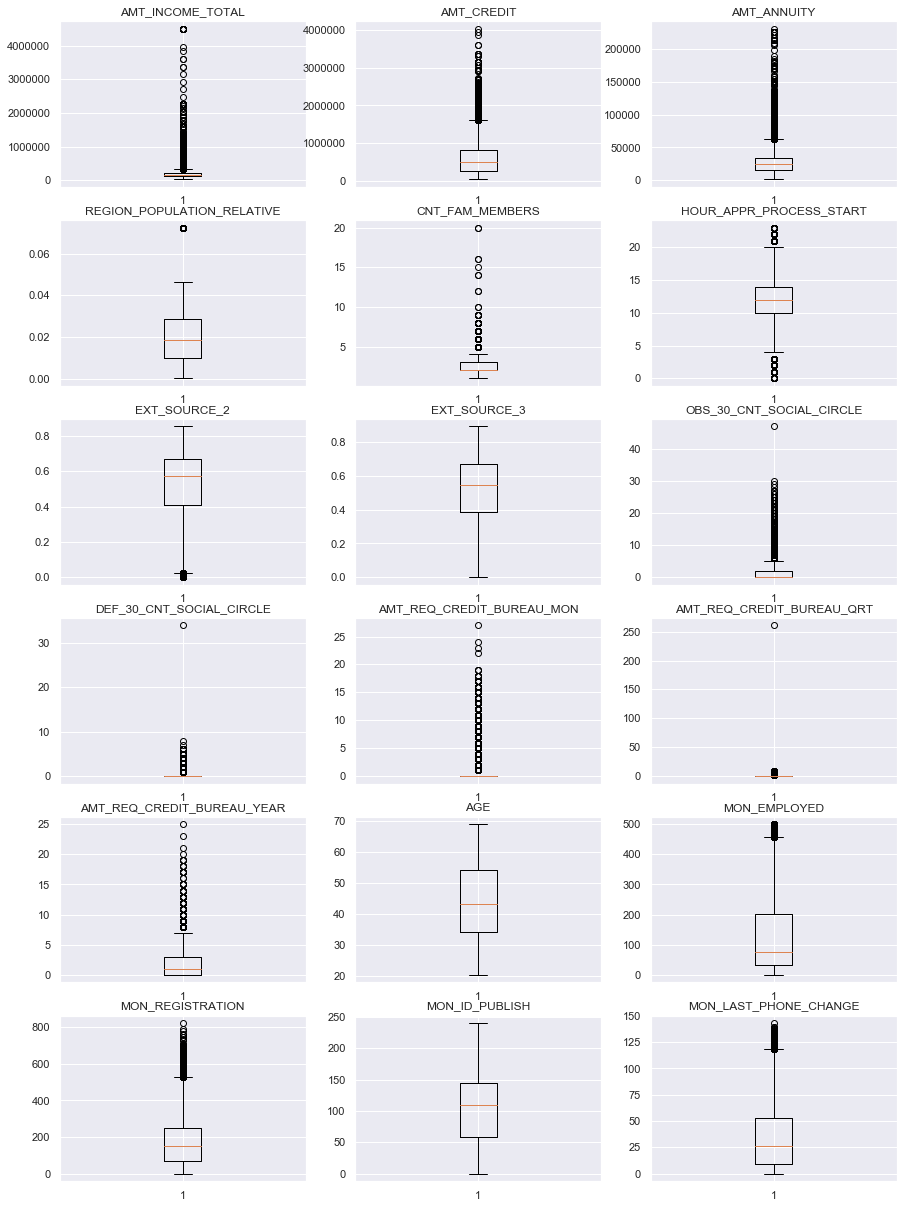

In [304]:
plt.figure(2)
plt.figure(figsize=(15,25))

i = 1

for item in columns_numerical:
    plt.subplot(7, 3, i)
    ax = plt.boxplot(TARGET_0[item].dropna())
    plt.title(item)
    i = i+1
    
plt.show()

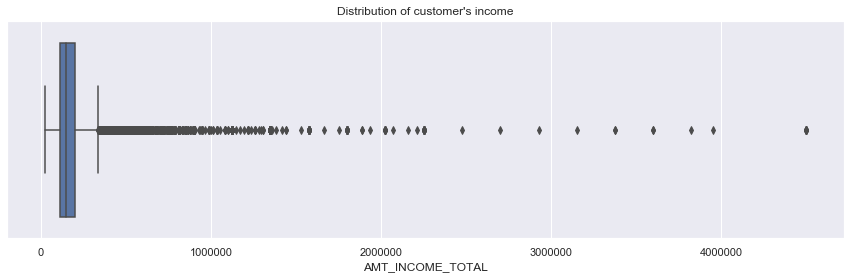

In [305]:
plt.figure(figsize=(15, 4))
sns.boxplot(TARGET_0['AMT_INCOME_TOTAL'])
plt.title("Distribution of customer's income")
plt.show()

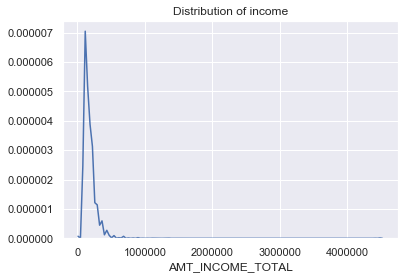

In [306]:
sns.set(style = "darkgrid")
sns.distplot(TARGET_0['AMT_INCOME_TOTAL'].dropna(), hist = False)
plt.title("Distribution of income")
plt.show()

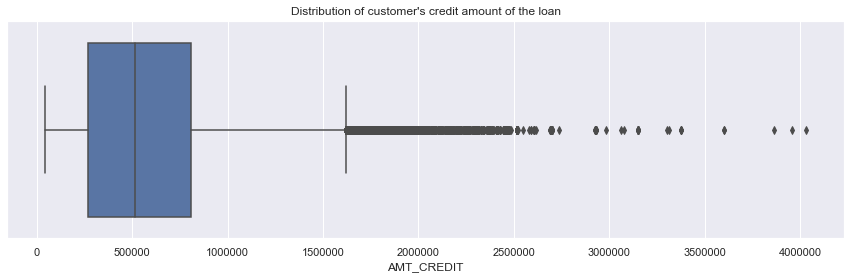

In [307]:
plt.figure(figsize=(15, 4))
sns.boxplot(TARGET_0['AMT_CREDIT'])
plt.title("Distribution of customer's credit amount of the loan")
plt.show()

### Inference
    Median value of credit value taken by customers is slightly above 500000 and there is a cap with high continuous credit amount present in column


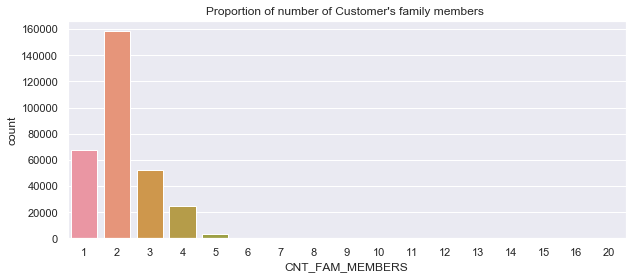

In [308]:
plt.figure(figsize=(10, 4))
sns.countplot(app_data['CNT_FAM_MEMBERS'])
plt.title("Proportion of number of Customer's family members ")
plt.show()

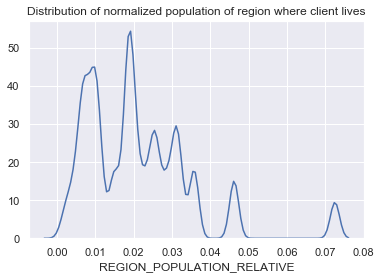

In [309]:
sns.set(style = "darkgrid")
sns.distplot(TARGET_0['REGION_POPULATION_RELATIVE'].dropna(), hist = False)
plt.title("Distribution of normalized population of region where client lives")
plt.show()

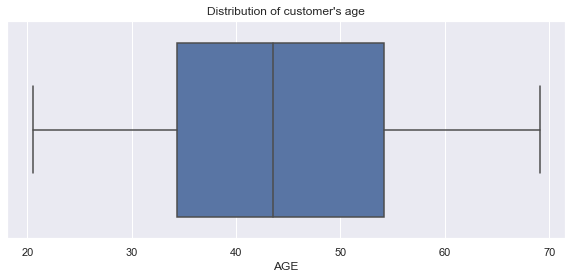

In [310]:
plt.figure(figsize=(10, 4))
sns.boxplot(TARGET_0['AGE'])
plt.title("Distribution of customer's age")
plt.show()

### Inference
    Minimum age for customer is just above 20 and maximum age is just below 70. Median age is around 44.
    No outliers present in this column.


## Correlation for numerical columns for dataframe - TARGET_0

In [311]:
TARGET_0_MODIFIED = TARGET_0.drop(['SK_ID_CURR','TARGET','FLAG_PHONE','REGION_RATING_CLIENT_W_CITY','REG_CITY_NOT_WORK_CITY'],axis = 1)
TARGET_0_cor_mat = TARGET_0_MODIFIED.corr()
TARGET_0_cor_mat

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,MON_EMPLOYED,MON_REGISTRATION,MON_ID_PUBLISH,MON_LAST_PHONE_CHANGE
AMT_INCOME_TOTAL,1.000000,0.371756,0.451338,0.182462,0.036440,0.082076,0.151078,-0.073580,-0.031350,-0.029790,0.062564,0.013435,0.030105,-0.068022,-0.127869,-0.070562,-0.025732,0.045509
AMT_CREDIT,0.371756,1.000000,0.771103,0.100474,0.064429,0.053565,0.129194,0.035995,-0.000367,-0.019863,0.054068,0.017833,-0.048777,0.047466,-0.033142,-0.013387,0.001505,0.069756
AMT_ANNUITY,0.451338,0.771103,1.000000,0.121088,0.075706,0.053580,0.126616,0.028055,-0.012911,-0.022527,0.038219,0.011275,-0.010822,-0.012256,-0.077557,-0.039398,-0.014182,0.062104
REGION_POPULATION_RELATIVE,0.182462,0.100474,0.121088,1.000000,-0.023425,0.172814,0.198493,-0.012486,-0.012551,0.005941,0.078629,-0.001013,0.001775,0.025243,-0.009650,0.052082,0.001072,0.041164
CNT_FAM_MEMBERS,0.036440,0.064429,0.075706,-0.023425,1.000000,-0.010568,-0.000579,-0.026822,0.025124,-0.004046,-0.007809,-0.004158,-0.030271,-0.285826,-0.229665,-0.175629,0.020460,0.028887
HOUR_APPR_PROCESS_START,0.082076,0.053565,0.053580,0.172814,-0.010568,1.000000,0.157221,-0.044648,-0.007822,-0.005718,0.037332,-0.000671,-0.030330,-0.095907,-0.095308,0.008044,-0.033979,0.012853
EXT_SOURCE_2,0.151078,0.129194,0.126616,0.198493,-0.000579,0.157221,1.000000,0.084597,-0.021785,-0.027427,0.050993,-0.002961,-0.021168,0.078162,0.002144,0.052503,0.041703,0.188399
EXT_SOURCE_3,-0.073580,0.035995,0.028055,-0.012486,-0.026822,-0.044648,0.084597,1.000000,0.002762,-0.032510,-0.009748,-0.023860,-0.070355,0.197275,0.145978,0.103477,0.124716,0.067501
OBS_30_CNT_SOCIAL_CIRCLE,-0.031350,-0.000367,-0.012911,-0.012551,0.025124,-0.007822,-0.021785,0.002762,1.000000,0.300947,0.001163,0.004346,0.032944,-0.007287,0.007487,-0.008229,0.013061,0.015002
DEF_30_CNT_SOCIAL_CIRCLE,-0.029790,-0.019863,-0.022527,0.005941,-0.004046,-0.005718,-0.027427,-0.032510,0.300947,1.000000,0.000817,-0.000960,0.018606,0.003059,0.015188,-0.001213,-0.000401,0.001526


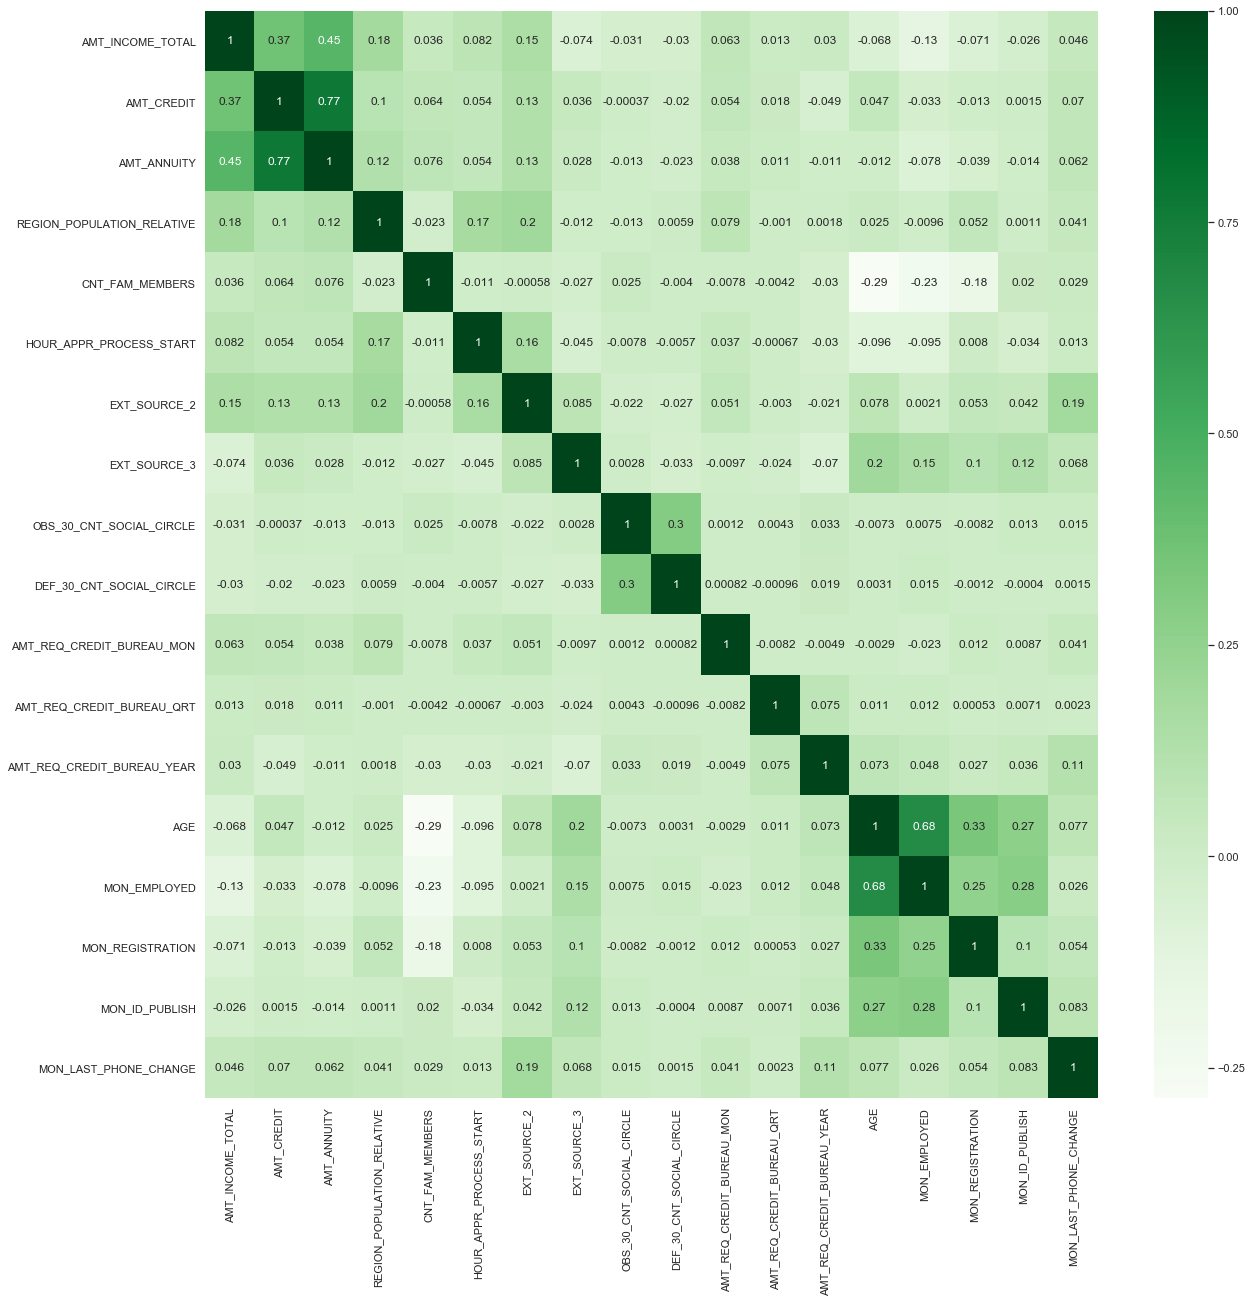

In [312]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(TARGET_0_cor_mat, annot = True, cmap = 'Greens')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

In [313]:
corr_0 = TARGET_0_cor_mat.where(np.triu(np.ones(TARGET_0_cor_mat.shape), k=1).astype(np.bool))
corr_TARGET_0 = corr_0.unstack().reset_index()
corr_TARGET_0.columns  = ['VAR1', 'VAR2', 'Correlation']
corr_TARGET_0 = corr_TARGET_0.dropna(subset = ['Correlation'])
corr_TARGET_0.Correlation = abs(corr_TARGET_0.Correlation)
corr_TARGET_0.sort_values("Correlation", ascending=False).head(10)

,VAR1,VAR2,Correlation
37,AMT_ANNUITY,AMT_CREDIT,0.771103
265,MON_EMPLOYED,AGE,0.677092
36,AMT_ANNUITY,AMT_INCOME_TOTAL,0.451338
18,AMT_CREDIT,AMT_INCOME_TOTAL,0.371756
283,MON_REGISTRATION,AGE,0.333155
170,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.300947
238,AGE,CNT_FAM_MEMBERS,0.285826
302,MON_ID_PUBLISH,MON_EMPLOYED,0.283877
301,MON_ID_PUBLISH,AGE,0.271316
284,MON_REGISTRATION,MON_EMPLOYED,0.252017


#### Above columns in each pair have strong relationship with each other


## Bivariate Analysis for dataframe - TARGET_0

#### Numerical - Numerical bivariate analysis

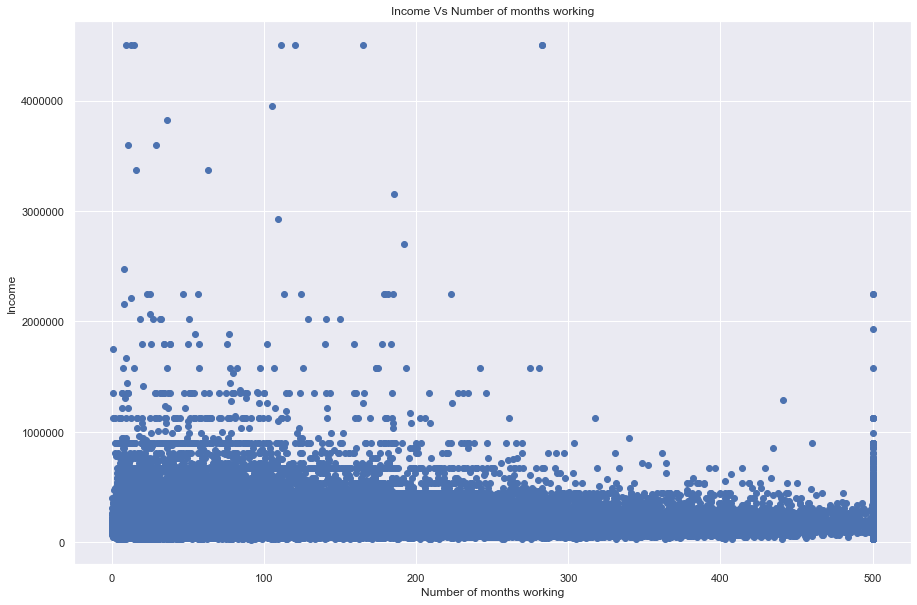

In [314]:
plt.figure(figsize=(15, 10))
plt.scatter(x = TARGET_0['MON_EMPLOYED'], y = TARGET_0['AMT_INCOME_TOTAL'])
plt.title("Income Vs Number of months working")
plt.xlabel("Number of months working")
plt.ylabel("Income")
plt.show()

### Inference
    As number of working months in increasing the income value for customer is decreasing


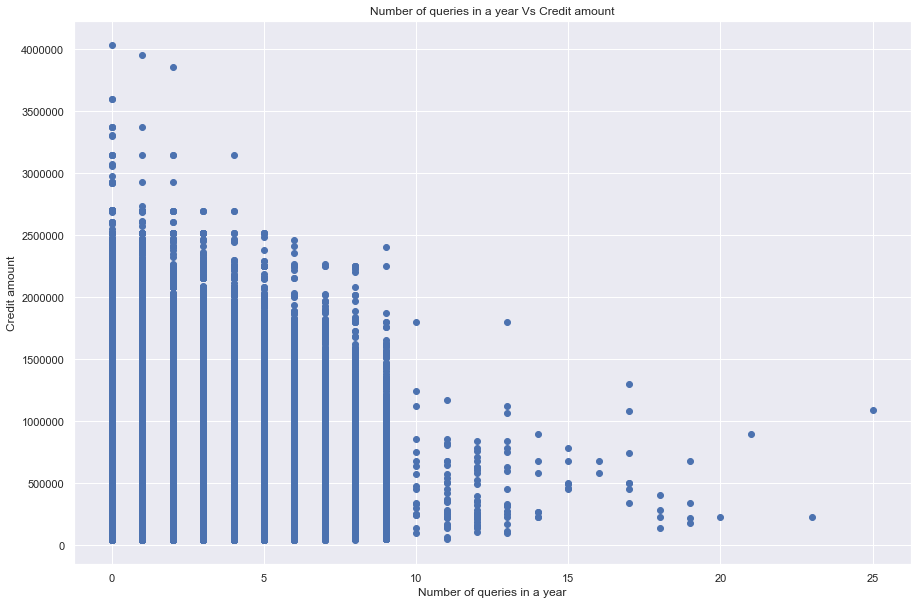

In [315]:
plt.figure(figsize=(15, 10))
plt.scatter(x = TARGET_0['AMT_REQ_CREDIT_BUREAU_YEAR'], y = TARGET_0['AMT_CREDIT'])
plt.title("Number of queries in a year Vs Credit amount")
plt.xlabel("Number of queries in a year")
plt.ylabel("Credit amount")
plt.show()

### Inference
    As credit amount is decreases number of queries are increasing showing customers with higher credit amount may have strict verification process as all verification is done in process.


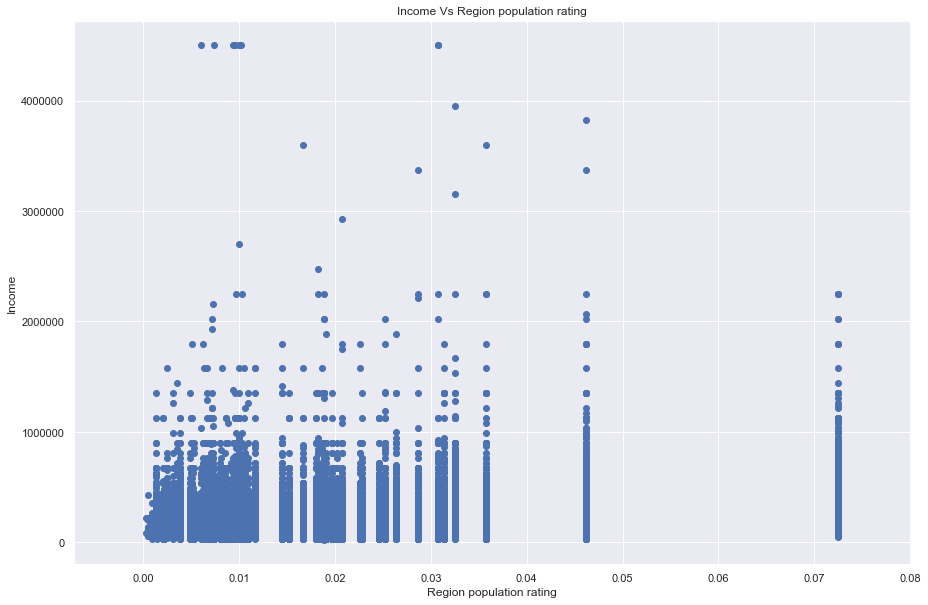

In [316]:
plt.figure(figsize=(15, 10))
plt.scatter(x = TARGET_0['REGION_POPULATION_RELATIVE'], y = TARGET_0['AMT_INCOME_TOTAL'])
plt.title("Income Vs Region population rating")
plt.xlabel("Region population rating")
plt.ylabel("Income")
plt.show()

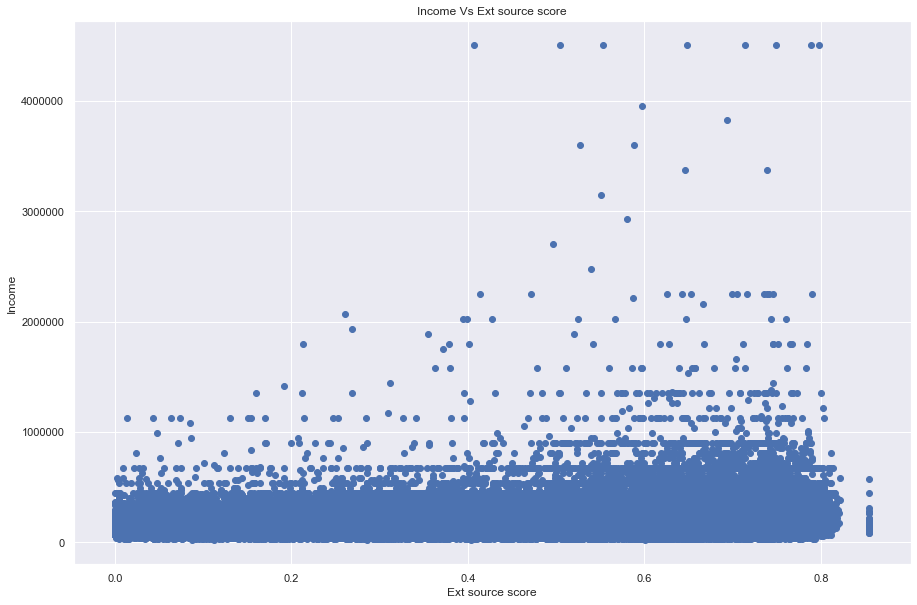

In [317]:
plt.figure(figsize=(15, 10))
plt.scatter(x = TARGET_0['EXT_SOURCE_2'], y = TARGET_0['AMT_INCOME_TOTAL'])
plt.title("Income Vs Ext source score")
plt.xlabel("Ext source score")
plt.ylabel("Income")
plt.show()

### Inference
    After certain income level external source rating is increasing as income is increasing


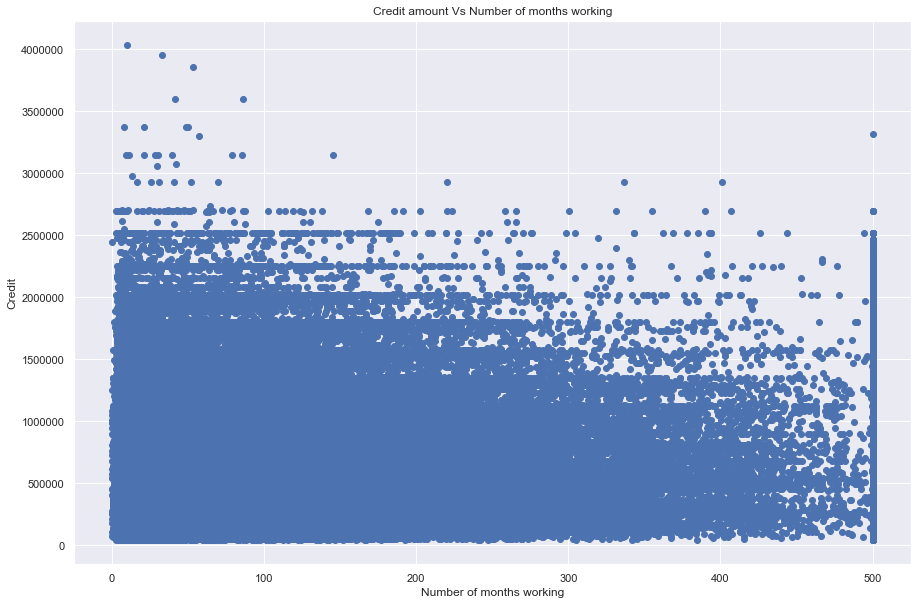

In [318]:
plt.figure(figsize=(15, 10))
plt.scatter(x = TARGET_0['MON_EMPLOYED'], y = TARGET_0['AMT_CREDIT'])
plt.title("Credit amount Vs Number of months working")
plt.xlabel("Number of months working")
plt.ylabel("Credit")
plt.show()

### Inference
    Credit amount by less experienced people is maximum and as experience increases credit amount reducing. 


#### Numerical - Categorical bivariate analysis

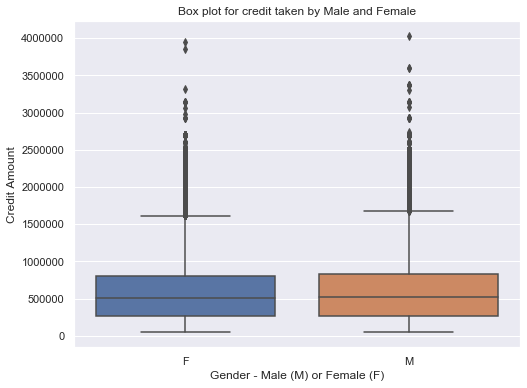

In [319]:
plt.figure(figsize=(8, 6))
sns.boxplot(x = TARGET_0['CODE_GENDER'], y = TARGET_0['AMT_CREDIT'])
plt.title("Box plot for credit taken by Male and Female")
plt.xlabel("Gender - Male (M) or Female (F)")
plt.ylabel("Credit Amount")
plt.show()

### Inference
    Median of credit amount taken by male and female customers is around same. Distribution of males and females is also around same as per credit amount


<Figure size 576x432 with 0 Axes>

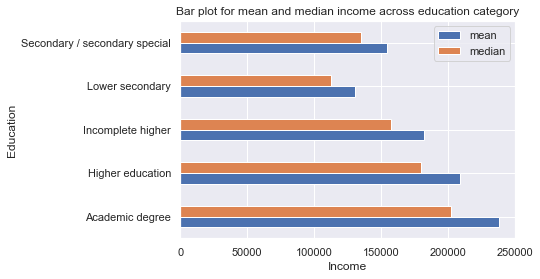

In [320]:
plt.figure(figsize=(8, 6))
TARGET_0.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].aggregate(['mean', 'median']).plot.barh()
plt.title("Bar plot for mean and median income across education category")
plt.ylabel("Education")
plt.xlabel("Income")
plt.show()

### Inference
    Customers with higher education has high level of income. There is a small difference in median and mean for each category showing data is relevant.


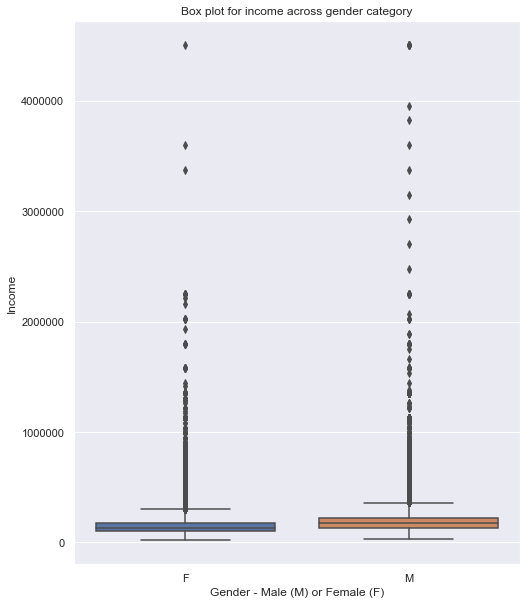

In [321]:
plt.figure(figsize=(8, 10))
sns.boxplot(x = TARGET_0['CODE_GENDER'], y = TARGET_0['AMT_INCOME_TOTAL'])
plt.title("Box plot for income across gender category")
plt.ylabel("Income")
plt.xlabel("Gender - Male (M) or Female (F)")
plt.show()

### Inference
    Median of income for male is slightly less than median income for female. More female customers have highest range of income.


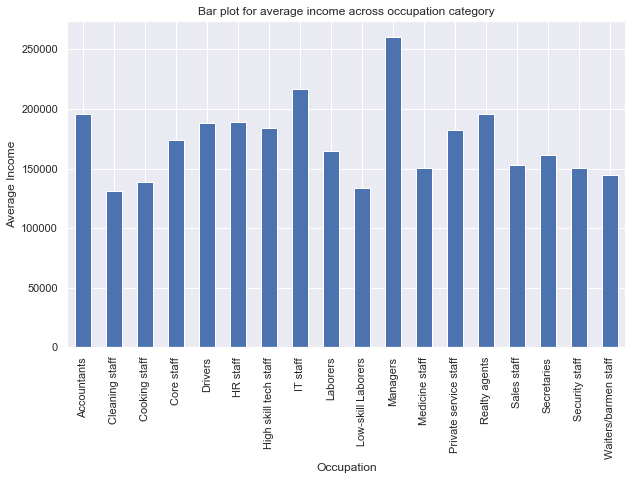

In [322]:
plt.figure(figsize=(10, 6))
TARGET_0.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].mean().plot.bar()
plt.title("Bar plot for average income across occupation category")
plt.ylabel("Average Income")
plt.xlabel("Occupation")
plt.show()

### Inference
    Managers are earning more average income in occupation category where lowest average income is for cleaning staff.


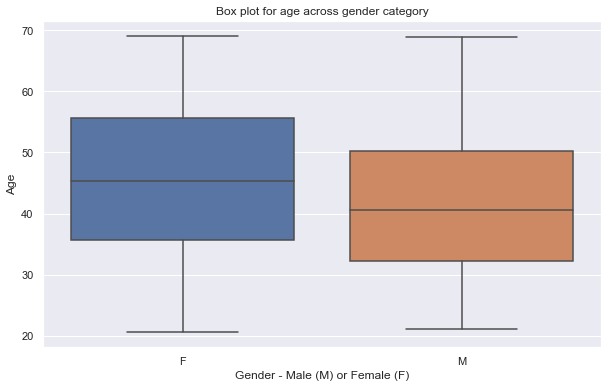

In [323]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = TARGET_0['CODE_GENDER'], y = TARGET_0['AGE'])
plt.title("Box plot for age across gender category")
plt.ylabel("Age")
plt.xlabel("Gender - Male (M) or Female (F)")
plt.show()

### Inference
    Median age for male customer is higher than median of female customers. Age range is almost same for both male and female.

#### Categorical - Categorical bivariate analysis

In [324]:
#create CAR_FLAG of numerical data type where flag "Y"= 1, "N"= 0

TARGET_0['CAR_FLAG'] = np.where(TARGET_0['FLAG_OWN_CAR'] == "Y",1,0)

TARGET_0['CAR_FLAG'].value_counts()

0    185675
1     97011
Name: CAR_FLAG, dtype: int64

In [325]:
#create REALTY_FLAG of numerical data type where flag "Y"= 1, "N"= 0

TARGET_0['REALTY_FLAG'] = np.where(TARGET_0['FLAG_OWN_REALTY'] == "Y",1,0)

TARGET_0['REALTY_FLAG'].value_counts()

1    196329
0     86357
Name: REALTY_FLAG, dtype: int64

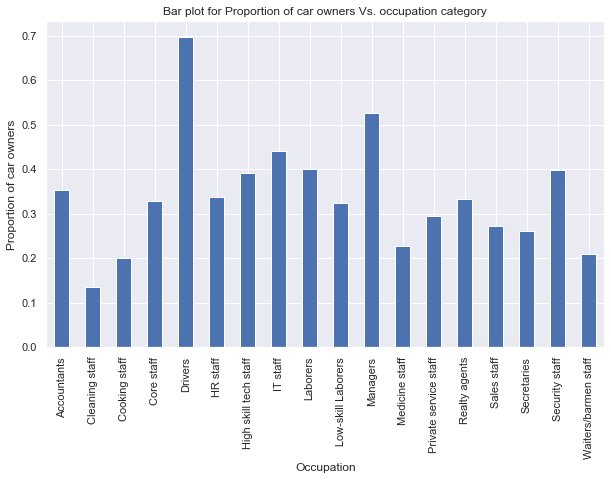

In [326]:
plt.figure(figsize=(10, 6))
TARGET_0.groupby('OCCUPATION_TYPE')['CAR_FLAG'].mean().plot.bar()
plt.title("Bar plot for Proportion of car owners Vs. occupation category")
plt.ylabel("Proportion of car owners")
plt.xlabel("Occupation")
plt.show()

### Inference
    Proportion of average number of drivers (by profession) owning a car is maximum where as cleaning staff has low proportion of owning a car.


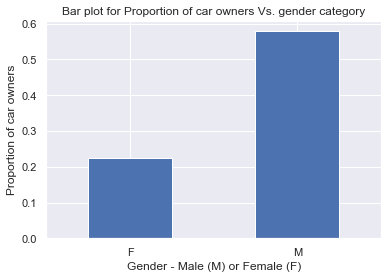

In [327]:
plt.figure(figsize=(6, 4))
TARGET_0.groupby('CODE_GENDER')['CAR_FLAG'].mean().plot.bar()
plt.title("Bar plot for Proportion of car owners Vs. gender category")
plt.ylabel("Proportion of car owners")
plt.xlabel("Gender - Male (M) or Female (F)")
plt.xticks(rotation = 0)
plt.show()

### Inference
    Average number of male customers owns more cars than that of female customers.


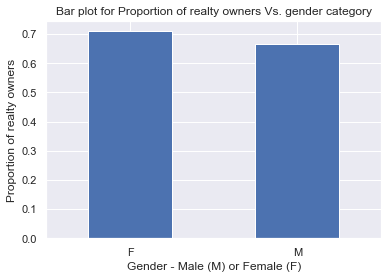

In [328]:
plt.figure(figsize=(6, 4))
TARGET_0.groupby('CODE_GENDER')['REALTY_FLAG'].mean().plot.bar()
plt.title("Bar plot for Proportion of realty owners Vs. gender category")
plt.ylabel("Proportion of realty owners")
plt.xlabel("Gender - Male (M) or Female (F)")
plt.xticks(rotation = 0)
plt.show()

### Inference
    Proportion of female customers who owns own realty is more than that of male customers


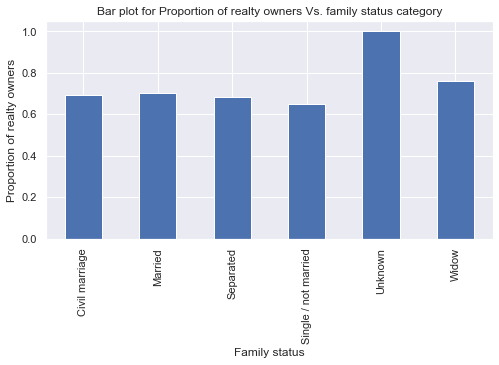

In [329]:
plt.figure(figsize=(8, 4))
TARGET_0.groupby('NAME_FAMILY_STATUS')['REALTY_FLAG'].mean().plot.bar()
plt.title("Bar plot for Proportion of realty owners Vs. family status category")
plt.ylabel("Proportion of realty owners")
plt.xlabel("Family status")
plt.show()

### Inference
    Customers who does not have provided family status information are more who owns realty.


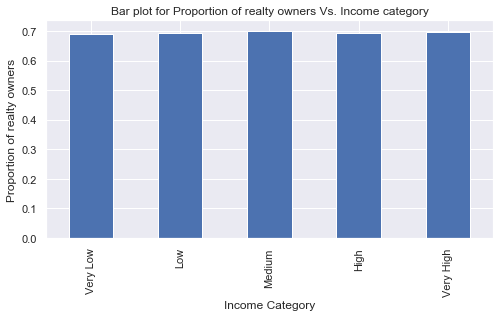

In [330]:
plt.figure(figsize=(8, 4))
TARGET_0.groupby('INCOME_GROUP')['REALTY_FLAG'].mean().plot.bar()
plt.title("Bar plot for Proportion of realty owners Vs. Income category")
plt.ylabel("Proportion of realty owners")
plt.xlabel("Income Category")
plt.show()

## ----------------------------------------TARGET_0-ANALYSIS - END--------------------------------------------------

## ---------------------------------------------------MERGING DATA--------------------------------------------------------

## previous_application.csv

## Data Import and Checking shape

In [331]:
pre_app = pd.read_csv("previous_application.csv")

In [332]:
app_data.shape

(307511, 35)

## Merge data with current application data and creating new dataframe 'final_data'

In [333]:
final_data = pd.merge(app_data, pre_app, on='SK_ID_CURR', how='inner', suffixes=('_current', '_previous'))

In [334]:
final_data.shape

(1413701, 71)

## Finding Null Value Percentage in final data

In [335]:
(final_data.isnull().sum()/len(final_data.index))*100

SK_ID_CURR                           0.000000
TARGET                               0.000000
NAME_CONTRACT_TYPE_current           0.000000
CODE_GENDER                          0.000000
FLAG_OWN_CAR                         0.000000
FLAG_OWN_REALTY                      0.000000
AMT_INCOME_TOTAL                     0.000000
AMT_CREDIT_current                   0.000000
AMT_ANNUITY_current                  0.006578
NAME_INCOME_TYPE                     0.000000
NAME_EDUCATION_TYPE                  0.000000
NAME_FAMILY_STATUS                   0.000000
REGION_POPULATION_RELATIVE           0.000000
FLAG_PHONE                           0.000000
OCCUPATION_TYPE                     32.367523
CNT_FAM_MEMBERS                      0.000000
REGION_RATING_CLIENT_W_CITY          0.000000
HOUR_APPR_PROCESS_START_current      0.000000
REG_CITY_NOT_WORK_CITY               0.000000
ORGANIZATION_TYPE                   19.352253
EXT_SOURCE_2                         0.128811
EXT_SOURCE_3                      

## Removing columns with null values greater than 39%

In [336]:
final_data_column_list_1 = list(final_data.columns.where((final_data.isnull().sum()/len(final_data.index)>0.39)).dropna())
print("Columns with more than 39% Null values : ",final_data_column_list_1)
print("-----------------------------------------------------------------------------------------------------------------------")
print("No. of Columns with more than 39% Null values : ",len(final_data_column_list_1))

Columns with more than 39% Null values :  ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']
-----------------------------------------------------------------------------------------------------------------------
No. of Columns with more than 39% Null values :  11


In [337]:
for i in final_data_column_list_1:
    final_data = final_data.drop(i, axis = 1)

## Cleaning data and standardizing values

In [338]:
final_data.loc[final_data['NAME_CONTRACT_TYPE_previous']=="XNA",'NAME_CONTRACT_TYPE_previous'] = np.NaN

In [339]:
final_data.loc[final_data['NAME_SELLER_INDUSTRY']=="XNA",'NAME_SELLER_INDUSTRY'] = np.NaN

In [340]:
final_data.loc[final_data['NAME_PAYMENT_TYPE']=="XNA",'NAME_PAYMENT_TYPE'] = np.NaN

In [341]:
final_data.loc[final_data['NAME_CLIENT_TYPE']=="XNA",'NAME_CLIENT_TYPE'] = np.NaN

In [342]:
final_data.loc[final_data['CODE_REJECT_REASON']=="XNA",'CODE_REJECT_REASON'] = np.NaN

In [343]:
final_data.loc[final_data['CODE_REJECT_REASON']=="XAP",'CODE_REJECT_REASON'] = np.NaN

In [344]:
final_data.loc[final_data['NAME_YIELD_GROUP']=="XNA",'NAME_YIELD_GROUP'] = np.NaN

## Binning of CNT_PAYMENT column to create LOAN_TERM column

In [345]:
final_data['LOAN_TERM'] = pd.cut(final_data['CNT_PAYMENT'], [0,10,20,30,40,50,60,70,80,90,1000],labels = ["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90+"])

## ------------------------------------------Analysis for final_data-------------------------------------------------------

# Variable 1 -  INCOME GROUP

<Figure size 432x288 with 0 Axes>

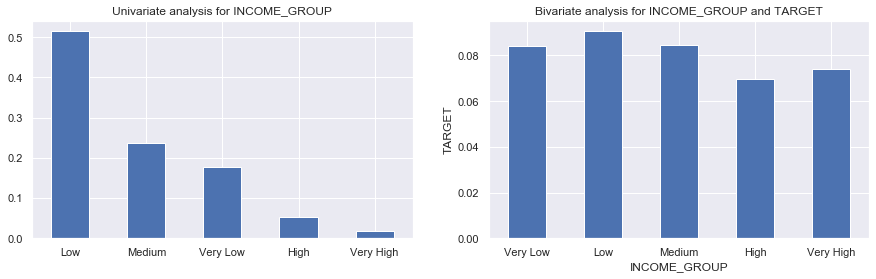

In [346]:
plt.figure(1)
plt.figure(figsize=(15, 4))

# subplot 1
plt.subplot(1, 2, 1)
plt.title("Univariate analysis for INCOME_GROUP")
final_data['INCOME_GROUP'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

plt.subplot(1, 2, 2)
final_data.groupby('INCOME_GROUP')['TARGET'].mean().plot.bar()
plt.title("Bivariate analysis for INCOME_GROUP and TARGET")
plt.ylabel("TARGET")
plt.xlabel("INCOME_GROUP")
plt.xticks(rotation = 0)

plt.show()

## Pattern analysis for INCOME GROUP
#### 1. Univariate analysis - 
    Maximum number of application are coming from low income group i.e. 100000 to 200000 which seems to be major customer group for the bank.

#### 2. Bivariate analysis for INCOME GROUP Vs TARGET VARIABLE-
    Highest number of customers with payment dofficulties are from low income group.

### Having above 2 observations combined it looks like bank is mostly dealing with low income group customers even though they have highest difficulties in payment.

# Variable 2 -  AGE GROUP

<Figure size 432x288 with 0 Axes>

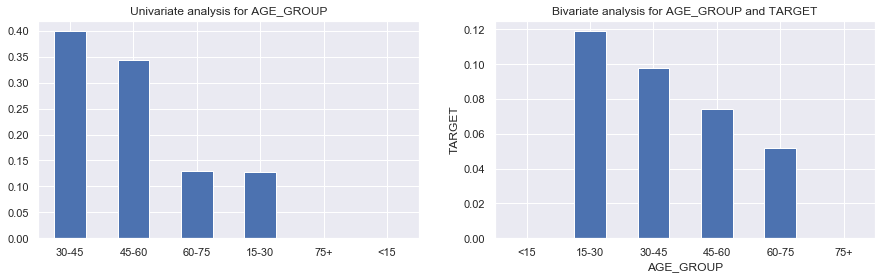

In [347]:
plt.figure(1)
plt.figure(figsize=(15, 4))

# subplot 1
plt.subplot(1, 2, 1)
plt.title("Univariate analysis for AGE_GROUP")
final_data['AGE_GROUP'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

plt.subplot(1, 2, 2)
final_data.groupby('AGE_GROUP')['TARGET'].mean().plot.bar()
plt.title("Bivariate analysis for AGE_GROUP and TARGET")
plt.ylabel("TARGET")
plt.xlabel("AGE_GROUP")
plt.xticks(rotation = 0)

plt.show()

## Pattern analysis for AGE_GROUP
#### 1. Univariate analysis - 
    Highest number of applications for loan are coming from people who are middle aged and second highest number of applications are coming from people who are little above middle age and are nearing retirement. 
    The number of aplicants from younger and senior citizen age group i.e. below 30 and above 65 respectively are relatively less. This makes a perfect sense as people of this age group are either not earning so well or they are retired/pensioners   

#### 2. Bivariate analysis for AGE_GROUP Vs TARGET VARIABLE
    Highest number of customers with payment dofficulties are from young age group i.e 15-30 years. May be because these people are not fully stabilized in their career or work they are doing. 
    Similar but of lower degree trend is observed for applicants who are of middle age group i.e 30-45 and this could be because of the fact that this group is the one which has highest number of liabilities considering the family and aspirations etc.
    
#### Overall we would like to recommend that bank should focus more of customer age group of 30 to 60 as this group has larger volume of applications which will drive majority of business and at the same time there will be lower risk of payment defaults.  

# Variable 3 -  LOAN TERM

<Figure size 432x288 with 0 Axes>

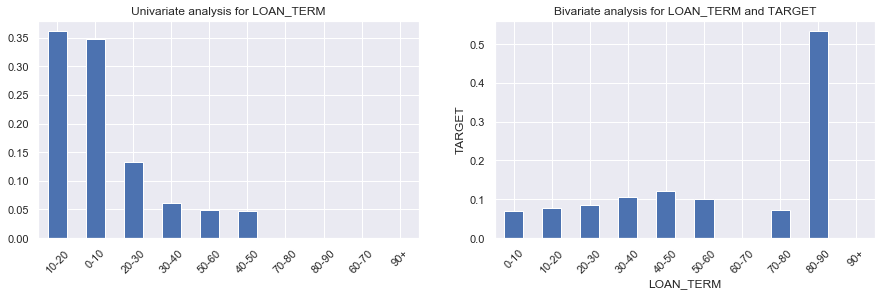

In [348]:
plt.figure(1)
plt.figure(figsize=(15, 4))

# subplot 1
plt.subplot(1, 2, 1)
plt.title("Univariate analysis for LOAN_TERM")
final_data['LOAN_TERM'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
final_data.groupby('LOAN_TERM')['TARGET'].mean().plot.bar()
plt.title("Bivariate analysis for LOAN_TERM and TARGET")
plt.ylabel("TARGET")
plt.xlabel("LOAN_TERM")
plt.xticks(rotation = 45)

plt.show()

## Pattern analysis for LOAN_TERM
#### 1. Univariate analysis
    Looks like majority of customers are taking loan for term not more than 30 years and which seems fine at least considering that banks focuses on  middle age group which will be able to pay-off the complete loan within their retirement. However, there are less number of customers who have taken loan for more than 30 years and up to 50 years.   
    

#### 2. Bivariate analysis for LOAN_TERM Vs TARGET VARIABLE
    Loan term does not seem to be any factor as far as defaults/difficulty in paying the Annuity. There is a cluster that shows that the those who have taken loan for term 80-90 years have very serious difficulties in paying the Annuity but this clearly is an outlier as no bank gives loan for such a long term.  
    
    
#### Overall - Loan term does not seem to be impacting the target variable i.e. difficulty in paying the loan Annuity 

# Variable 4 -  LOAN CONTRACT TYPE

<Figure size 432x288 with 0 Axes>

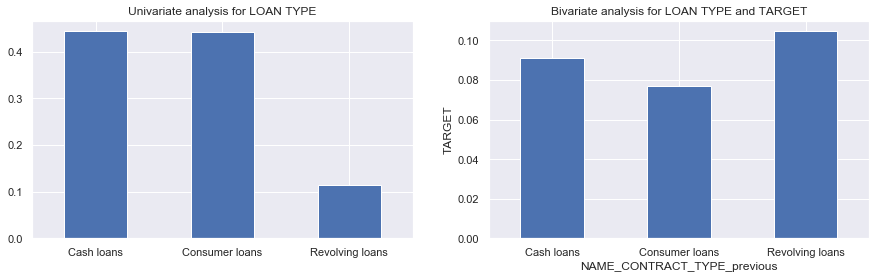

In [349]:
plt.figure(1)
plt.figure(figsize=(15, 4))

# subplot 1
plt.subplot(1, 2, 1)
plt.title("Univariate analysis for LOAN TYPE")
final_data['NAME_CONTRACT_TYPE_previous'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

plt.subplot(1, 2, 2)
final_data.groupby('NAME_CONTRACT_TYPE_previous')['TARGET'].mean().plot.bar()
plt.title("Bivariate analysis for LOAN TYPE and TARGET")
plt.ylabel("TARGET")
plt.xlabel("NAME_CONTRACT_TYPE_previous")
plt.xticks(rotation = 0)

plt.show()

## Pattern analysis for LOAN CONTRACT TYPE
#### 1. Univariate analysis
    There seems to be almost equal number of applications for Cash loans and consumer loans. In contrast to this, the number of applications for revolving loans are singificantly less as commpared to the other categories of loans. 

#### 2. Bivariate analysis for LOAN CONTRACT TYPE Vs TARGET VARIABLE
    While there is a clear trend of all loan type aplicants having difficulties in paying off the Annuity, The bivariate data of Revolving loans is quite interesting here. Compared to the volume of applicants in in revolving category, the difficulty in paying it is very large. This could be becuase it is an evergreen loan and customers have a free hand to withdraw, repay and redraw as frequently as they want and this might get them into serious debts.  
    
    
#### Overall - Consumer and Cash loan seem to be equally risky and impacting the target in same manner. However, revolving loans seems to be quite risky and at the same time less profit making because of low volume/demand 

# Variable 5 -  CLIENT TYPE

<Figure size 432x288 with 0 Axes>

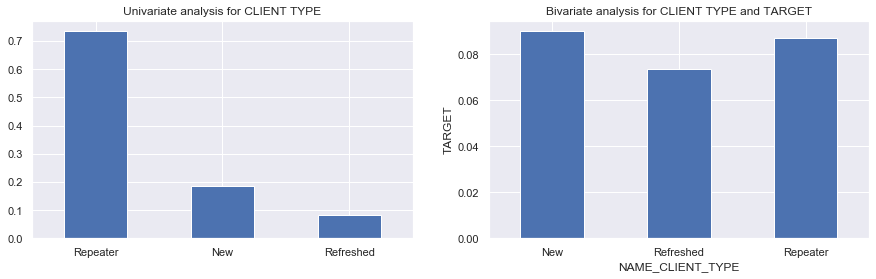

In [350]:
plt.figure(1)
plt.figure(figsize=(15, 4))

# subplot 1
plt.subplot(1, 2, 1)
plt.title("Univariate analysis for CLIENT TYPE")
final_data['NAME_CLIENT_TYPE'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

plt.subplot(1, 2, 2)
final_data.groupby('NAME_CLIENT_TYPE')['TARGET'].mean().plot.bar()
plt.title("Bivariate analysis for CLIENT TYPE and TARGET")
plt.ylabel("TARGET")
plt.xlabel("NAME_CLIENT_TYPE")
plt.xticks(rotation = 0)

plt.show()

## Pattern analysis for LOAN  CLIENT TYPE
#### 1. Univariate analysis
    Highest numbers of applications are of type Repeater. (Assuming this category is for clients who apply after last application rejection/cancellation/refusal etc.) 
    There are very less number of new clients applying 
    Number of new clients that have renewed their contract for loan are even very low.   

#### 2. Bivariate analysis for LOAN  CLIENT TYPE Vs TARGET VARIABLE
    All types of clients have almost similar level of difficulty in paying the Annuity. Except that those who Refreshed their contract. The trend for Refreshed cases here is logical also because if they have been able to pay off the earlier loan successfully, this shows that they do not have as much difficulty in paying Annuity for current loan as well.
    
    
#### Overall - Relatively the refreshed cases are of lowest risk so bank should see how it can retain its existing clients for bying the credit products again and again. Also the number New clients are very less and bank should further analyse the data to find why new clients are not applying for loans. Bank might want to enhance and strengthen their marketing campaigns and make a better strategy to engage with  new clients. 

# Variable 6 -  CHANNEL TYPE

<Figure size 432x288 with 0 Axes>

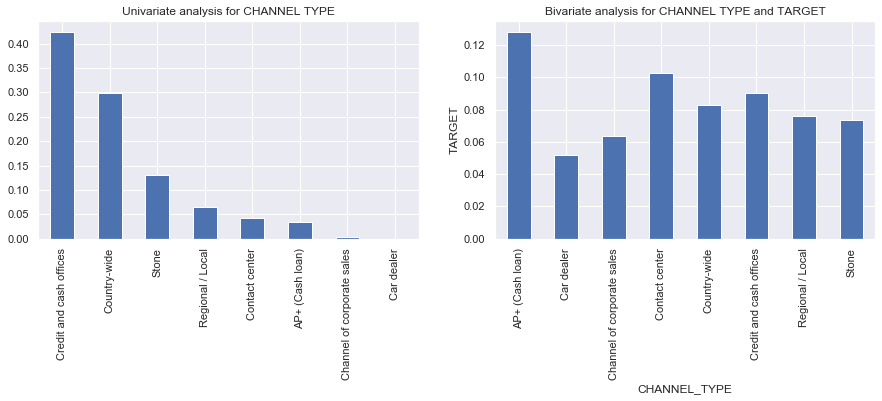

In [351]:
plt.figure(1)
plt.figure(figsize=(15, 4))

# subplot 1
plt.subplot(1, 2, 1)
plt.title("Univariate analysis for CHANNEL TYPE")
final_data['CHANNEL_TYPE'].value_counts(normalize = True).plot.bar()

plt.subplot(1, 2, 2)
final_data.groupby('CHANNEL_TYPE')['TARGET'].mean().plot.bar()
plt.title("Bivariate analysis for CHANNEL TYPE and TARGET")
plt.ylabel("TARGET")
plt.xlabel("CHANNEL_TYPE")
plt.xticks(rotation = 90)

plt.show()

## Pattern analysis for CHANNEL_TYPE
#### 1. Univariate analysis
    Analysis of Channel Type varibale here and the Loan Type variables earlier are clearly pointing that Cash loan is the most baught product of bank and this is sold from Credit and Cash offices of the bank (I assume it is the branch). Country-Wide is the second largest channel for loan sales. Other channels are there but the number of applications from those channels are quite less. Number of Loans sold from car dealers is very low.     

#### 2. Bivariate analysis for LOAN  CLIENT TYPE Vs TARGET VARIABLE
    while as usually the cash loans seem to be riskiest again in this pattern as well, loans sold from most of the other channels except Car Dealers and Corporate sales are moderately risky. 
    for Car Dealers and Corporate sales, the volumes of sales is very low but they are comparatively less risky. This could be because
    1) Card Dealers - People who are buying a car, generally doing well financially and they are facing less difficuty in paying the Annuity 
    2) Coprorate Sales - These loans are given to corporates and defaults could impact their credit score for futire loans. So they try to pay it off relatively better.
    
#### Overall - Banks should also see why the sales of loan products is very low from Car Dealers and Corporate Sales channel. They should enhance their marketing campaigns to increase saes from these channels. 

# Variable 7 -  INTEREST GROUP

<Figure size 432x288 with 0 Axes>

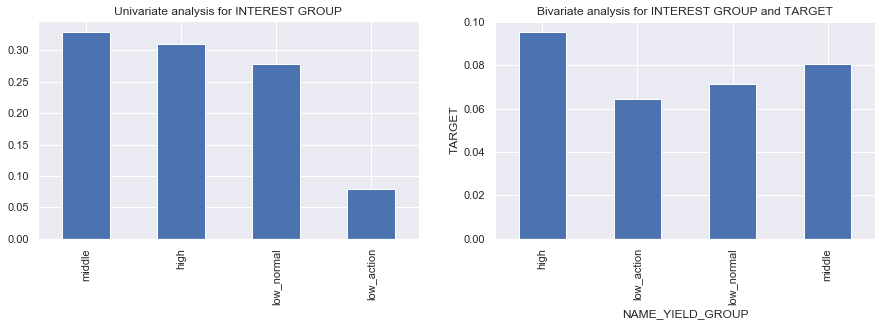

In [352]:
plt.figure(1)
plt.figure(figsize=(15, 4))

# subplot 1
plt.subplot(1, 2, 1)
plt.title("Univariate analysis for INTEREST GROUP")
final_data['NAME_YIELD_GROUP'].value_counts(normalize = True).plot.bar()

plt.subplot(1, 2, 2)
final_data.groupby('NAME_YIELD_GROUP')['TARGET'].mean().plot.bar()
plt.title("Bivariate analysis for INTEREST GROUP and TARGET")
plt.ylabel("TARGET")
plt.xlabel("NAME_YIELD_GROUP")
plt.xticks(rotation = 90)

plt.show()

## Pattern analysis for INTEREST GROUP
### 1) Univariate Analysis:

    Looks like there were approximately 20% Cases in previous application data which were Refused. There is equal % of customers who cancelled their application during the process

 

### 2) Bivariate Analysis:

    1) There are client whose application were approved earlier as well as this time, but these clients are facing difficulty in payment of Annuity.

    2) The cases who were rejected earlier, are approved in current applications and now these clients are facing difficulty in payments. It would be interesting to find as what is the reason bank approved these previously rejected cases in current application.

    3)  Regarding cases where customer had cancelled the previous application and are now approved in current application. Bank should do a further detailed analysis to find what is the reason these clients had cancelled the application earlier. It could be because of complexity of application process, documentation requirements, interest rates, lack of flexibility from bank side etc. Additionally this analysis will give insights to avoid multiple applications from same client which will in-turn save the operational cost for bank

# Variable 8 - NAME_CONTRACT_STATUS - LOAN STATUS

<Figure size 432x288 with 0 Axes>

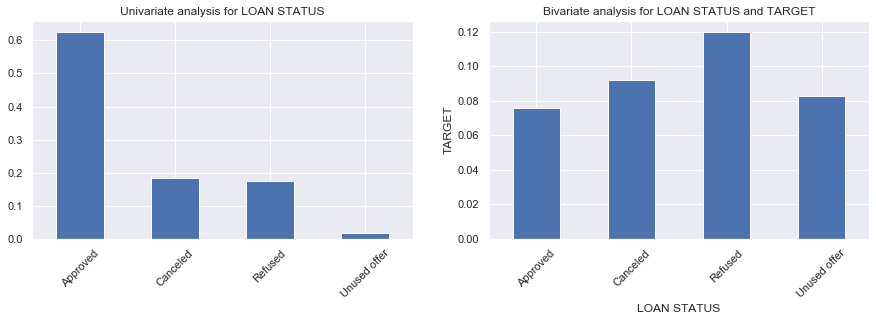

In [353]:
plt.figure(1)
plt.figure(figsize=(15, 4))

# subplot 1
plt.subplot(1, 2, 1)
plt.title("Univariate analysis for LOAN STATUS")
final_data['NAME_CONTRACT_STATUS'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
final_data.groupby('NAME_CONTRACT_STATUS')['TARGET'].mean().plot.bar()
plt.title("Bivariate analysis for LOAN STATUS and TARGET")
plt.ylabel("TARGET")
plt.xlabel("LOAN STATUS")
plt.xticks(rotation = 45)

plt.show()

## Pattern analysis for LOAN STATUS   
#### 1. Univariate analysis
    Bank has approved most number of applications. It has similar anoumt of applications as cancelled by customer or rejected by bank. There is small proportion of unused offers. 

#### 2. Bivariate analysis for INTEREST GROUP Vs TARGET VARIABLE
    Bank has refused most number of loan applications saying customer has payment difficulties.
    Second most applications are cancelled by customers thinking about payment diccifculties.
    Approved applications has lowest average tendancy for payment difficulty so bank is taking low risk while approving applications

## Mutivariate analysis - case 1 - Education type, Income group and target variable

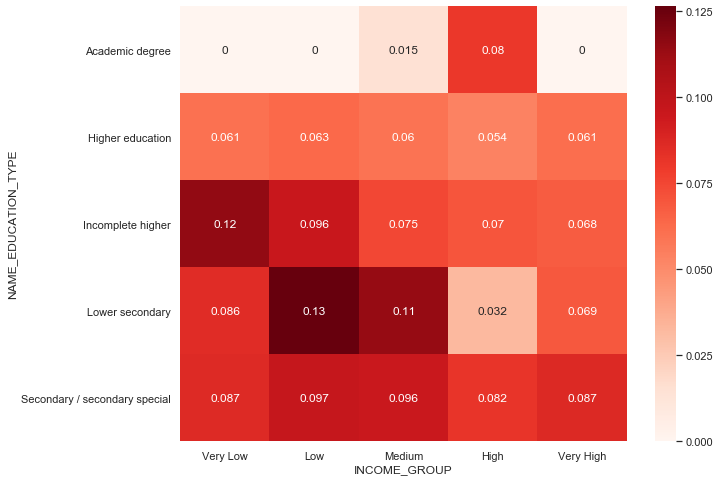

In [354]:
inp1 = pd.pivot_table(data = final_data, index = 'NAME_EDUCATION_TYPE', columns = 'INCOME_GROUP', values = 'TARGET')
plt.figure(figsize=(10, 8))
az=sns.heatmap(inp1, annot = True, cmap = 'Reds')
bottom, top = az.get_ylim()
az.set_ylim(bottom+0.5, top-0.5)
plt.yticks(rotation = 0)
plt.show()

## Pattern analysis for Education type, Income group and target variables in heatmap   

#### Multivariate analysis 
    Highest level of difficulty in payment is faced by clients that have lower secondary education and belong to lower income group. This is logical as the people who have not educated so welll and are from low income group, may not be doing financially so well and will definitely face difficulty in paying off the loans. 
    
    On the other hand, we can clearly see that - if the education level is very good, mostly there is no difficulty in paying off the loans.
    
    There are 2 combinations that have exceptional patterns
    1) High Income and Lower Secindary education - this group has almost no problem in paying off the loan. Though the education level is not at all good. This is an interesting segement is a candidate for further analysis to get actionable insights 
    2) Hign Income and Very high Education - This goes against the expectations of most of the heatmap insights seen here. Needs more analysis for further actionable insights 

## Mutivariate analysis - case 2 - Income group, Age group and target variable

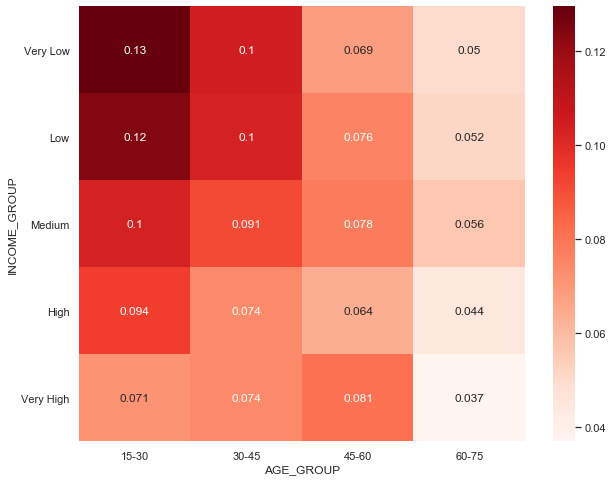

In [355]:
inp2 = pd.pivot_table(data = final_data, index = 'INCOME_GROUP', columns = 'AGE_GROUP', values = 'TARGET')
plt.figure(figsize=(10, 8))
ay=sns.heatmap(inp2, annot = True, cmap = 'Reds')
bottom, top = ay.get_ylim()
ay.set_ylim(bottom+0.5, top-0.5)
plt.yticks(rotation = 0)
plt.show()

## Pattern analysis for Income group, Age group and target variable in heatmap   

#### Multivariate analysis 
    The map is giving quite intuitive insights. Both income levels and age are increasing, ability to pay-off the loan is getting better as better. Specially Senior citizens who have very high income, have no issues faced in paying off the loan. On the other hand, the young people who have low income seem to be facing huge difficulties in paying-off the loan.
    
    
    As seen in previous age group bivariate analysis, here also it is evident that people of higher-middle age/nearing retirement seem to be facing difficulties in paying-off their loans and this could be because of increased liabilities by this age also issues related to carrier growth as well. This is a candidate for further analysis to get actionable insights because this is the group that is also the segment of age group that is second highest in number of applicants.
    
#### We recommend bank to collect detailed data about the 30-60 age group clients and perform detailed EDA to get actionable insights. This groups can bring huge difference to revenue, sales volume and profits.

## Creating correlation matrix for required columns in final_data dataframe

In [356]:
final_1_MODIFIED = final_data.drop(['SK_ID_CURR','TARGET','AMT_CREDIT_current','AMT_ANNUITY_current','FLAG_PHONE',
                                  'HOUR_APPR_PROCESS_START_current','SK_ID_PREV','AMT_ANNUITY_previous','AMT_CREDIT_previous',
                                  'HOUR_APPR_PROCESS_START_previous','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION'],axis = 1)

final_1_cor_mat = final_1_MODIFIED.corr()
final_1_cor_mat

,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,MON_EMPLOYED,MON_REGISTRATION,MON_ID_PUBLISH,MON_LAST_PHONE_CHANGE,AMT_APPLICATION,AMT_GOODS_PRICE,SELLERPLACE_AREA,CNT_PAYMENT
AMT_INCOME_TOTAL,1.000000,0.161991,0.026652,-0.207585,0.019423,0.139991,-0.080714,-0.018739,-0.025071,0.061844,0.012685,0.041140,-0.051391,-0.115145,-0.059184,-0.030850,0.058239,0.150280,0.190731,0.003532,0.042930
REGION_POPULATION_RELATIVE,0.161991,1.000000,-0.021034,-0.515879,-0.038945,0.188474,-0.007802,-0.005535,0.007323,0.080631,0.001627,0.009449,0.040122,0.002986,0.053927,0.006511,0.050625,0.044807,0.055356,0.001100,0.000438
CNT_FAM_MEMBERS,0.026652,-0.021034,1.000000,0.030865,0.083845,-0.009943,-0.038185,0.030663,-0.000586,-0.011198,-0.013073,-0.062309,-0.326244,-0.246968,-0.181620,-0.002449,0.011027,-0.005809,-0.014899,0.000597,-0.034089
REGION_RATING_CLIENT_W_CITY,-0.207585,-0.515879,0.030865,1.000000,0.023126,-0.276957,-0.009056,0.023445,0.012398,-0.069073,0.005101,-0.000936,-0.019692,0.027199,-0.075296,0.004483,-0.031120,-0.043079,-0.053049,-0.000623,0.010455
REG_CITY_NOT_WORK_CITY,0.019423,-0.038945,0.083845,0.023126,1.000000,-0.074469,-0.077945,-0.003798,-0.000720,-0.009901,-0.008615,-0.028178,-0.248830,-0.288057,-0.102460,-0.100243,-0.054258,-0.019629,-0.027905,0.000574,-0.028486
EXT_SOURCE_2,0.139991,0.188474,-0.009943,-0.276957,-0.074469,1.000000,0.107662,-0.018841,-0.025892,0.055713,-0.003677,-0.020302,0.089961,0.016669,0.062918,0.042985,0.225505,0.048539,0.058570,0.002637,0.002101
EXT_SOURCE_3,-0.080714,-0.007802,-0.038185,-0.009056,-0.077945,0.107662,1.000000,-0.008751,-0.035879,-0.014677,-0.035919,-0.086288,0.189079,0.152655,0.107626,0.123317,0.071652,-0.009053,-0.028953,0.002437,-0.054131
OBS_30_CNT_SOCIAL_CIRCLE,-0.018739,-0.005535,0.030663,0.023445,-0.003798,-0.018841,-0.008751,1.000000,0.299410,0.000318,0.004656,0.033391,-0.015292,0.003302,-0.013819,0.012052,0.017104,0.007813,0.008793,-0.001291,0.022868
DEF_30_CNT_SOCIAL_CIRCLE,-0.025071,0.007323,-0.000586,0.012398,-0.000720,-0.025892,-0.035879,0.299410,1.000000,-0.001637,-0.002082,0.013910,-0.001229,0.011671,-0.007064,-0.001274,-0.000195,-0.001571,-0.002561,-0.001761,0.010496
AMT_REQ_CREDIT_BUREAU_MON,0.061844,0.080631,-0.011198,-0.069073,-0.009901,0.055713,-0.014677,0.000318,-0.001637,1.000000,-0.006775,-0.024129,-0.005992,-0.024563,0.008613,0.008725,0.032122,0.024533,0.027194,0.001054,0.015840


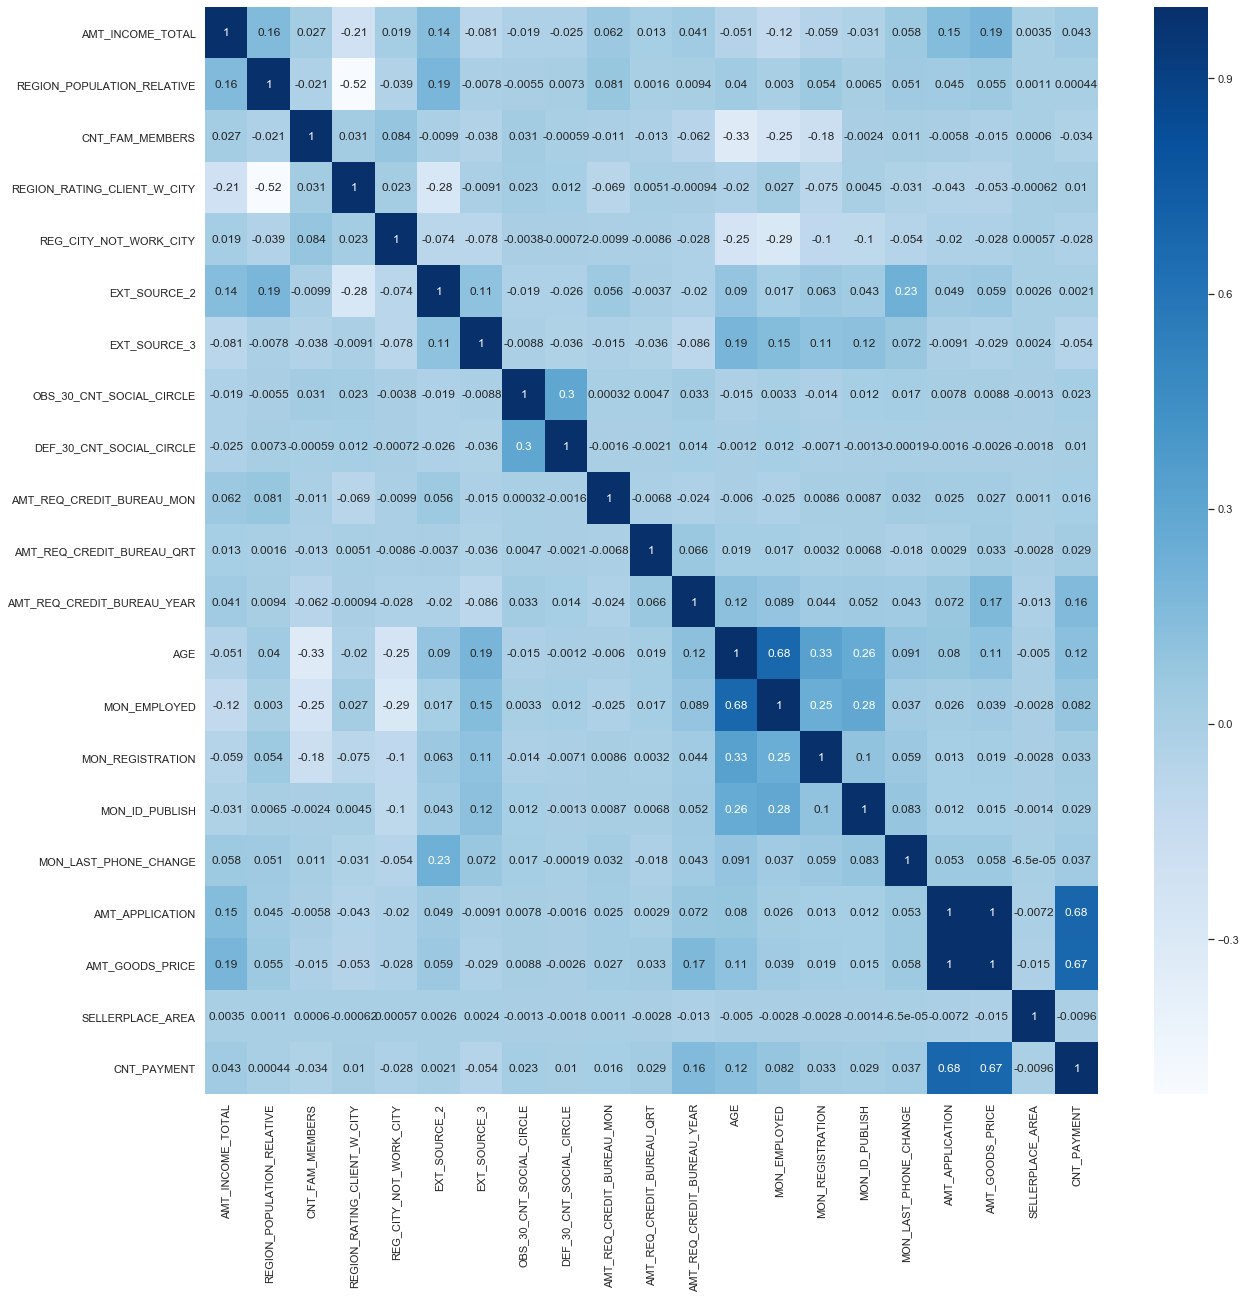

In [357]:
plt.figure(figsize=(20, 20))
ab = sns.heatmap(final_1_cor_mat, annot = True, cmap = 'Blues')
bottom, top = ab.get_ylim()
ab.set_ylim(bottom+0.5, top-0.5)
plt.show()

## Top 10 correlations in final_data dataframe

In [358]:
corr_3 = final_1_cor_mat.where(np.triu(np.ones(final_1_cor_mat.shape), k=1).astype(np.bool))
corr_final_data = corr_3.unstack().reset_index()
corr_final_data.columns  = ['VAR1', 'VAR2', 'Correlation']
corr_final_data = corr_final_data.dropna(subset = ['Correlation'])
corr_final_data.Correlation = abs(corr_final_data.Correlation)
corr_final_data.sort_values("Correlation", ascending=False).head(10)

,VAR1,VAR2,Correlation
395,AMT_GOODS_PRICE,AMT_APPLICATION,0.999871
437,CNT_PAYMENT,AMT_APPLICATION,0.683056
285,MON_EMPLOYED,AGE,0.676774
438,CNT_PAYMENT,AMT_GOODS_PRICE,0.674547
64,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.515879
306,MON_REGISTRATION,AGE,0.326536
254,AGE,CNT_FAM_MEMBERS,0.326244
175,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.299410
277,MON_EMPLOYED,REG_CITY_NOT_WORK_CITY,0.288057
328,MON_ID_PUBLISH,MON_EMPLOYED,0.284192


# Conclusion---------------------------------------------------------------------------------------------

## 5 Strong variables in deciding payment difficulty for customer are as below
### Age
    Customers with lower age group have payment difficulties due to various reasons like low pay category, low savings, etc.
### Number of months working
    Customers with higher experience has high salary so there is low possibility of loan application from him and also he will have no payment difficulties
### Income group
    Customers with lower income group tends to have higher possibility of payment difficulties.
### Education type
    Customers with lower education level tends to have higher possibility of payment difficulties.
### Interest group
    Customers whose loan has high interest tends to have higher possibility of payment difficulties


## Recommendations---------------------------------------------------------------------------------------------------------

### Bank can focus on getting long term employed and high income category customers who do not have payment difficulties.
### Banks should also see why the sales of loan products is very low from Car Dealers and Corporate Sales channel. They should enhance their marketing campaigns to increase sales from these channels.
### Bank has maximum customer database from low income group and low education group. These customers has higher tendency for payment difficulties due to which bank may have financial loss. For this category of customer bank approval process should be more stringent.
### Bank should to collect detailed data about the 30-60 age group clients and perform detailed EDA to get actionable insights. This groups can bring huge difference to revenue, sales volume and profits.
### Relatively the refreshed cases are of lowest risk so bank should see how it can retain its existing clients for buying the credit products again and again. 
### The number of New clients are very less and bank should further analyze the data to find why new clients are not applying for loans. Bank might want to enhance and strengthen their marketing campaigns and make a better strategy to engage with new clients.
### Consumer and Cash loan seem to be equally risky and impacting the target in same manner. However, revolving loans seems to be riskiest and at the same time they are less profit making because of low volume/demand. So bank can relook into the revolving loan clauses to make them less flexible.
### Bank should focus more on customer age group of 30 to 60 as this group has larger volume of applications which will drive majority of business and at the same time there will be lower risk of payment defaults.
### There seem to be some gap in bank’s approval and refusal process. Because of these gaps, Bank is heavily approving the earlier rejected cases in current applications and ending up into risky loans. Banks needs to make their approval and rejection process more stringent and data oriented.



## -----------------------------------------------END OF CASE STUDY-----------------------------------------------------